In [16]:
import json
import requests
import pandas as pd

In [17]:
myobj = {
    "base64_string":"/9j/4AAQSkZJRgABAQAAAQABAAD/4gHYSUNDX1BST0ZJTEUAAQEAAAHIbGNtcwIQAABtbnRyUkdCIFhZWiAH4gADABQACQAOAB1hY3NwTVNGVAAAAABzYXdzY3RybAAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLWhhbmS0qt0fE8gDPPVRFEUoepjiAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAlkZXNjAAAA8AAAAF5jcHJ0AAABDAAAAAx3dHB0AAABGAAAABRyWFlaAAABLAAAABRnWFlaAAABQAAAABRiWFlaAAABVAAAABRyVFJDAAABaAAAAGBnVFJDAAABaAAAAGBiVFJDAAABaAAAAGBkZXNjAAAAAAAAAAR1UDMAAAAAAAAAAAAAAAAAdGV4dAAAAABDQzAAWFlaIAAAAAAAAPNRAAEAAAABFsxYWVogAAAAAAAAg98AAD2/////u1hZWiAAAAAAAABKvwAAsTcAAAq5WFlaIAAAAAAAACg4AAARCgAAyLljdXJ2AAAAAAAAACoAAAB8APgBnAJ1A4MEyQZOCBIKGAxiDvQRzxT2GGocLiBDJKwpai5+M+s5sz/WRldNNlR2XBdkHWyGdVZ+jYgskjacq6eMstu+mcrH12Xkd/H5////7QCEUGhvdG9zaG9wIDMuMAA4QklNBAQAAAAAAGgcAigAYkZCTUQwYTAwMGE0YTAzMDAwMGM5MmMwMDAwZDk2MjAwMDA1Njc4MDAwMDIyOGIwMDAwMGViYTAwMDA1MzE5MDEwMDdlMjEwMTAwMDczNDAxMDA5MDQ2MDEwMDU4ZDIwMTAwAP/bAEMACQkJCQoJCgwMCg8QDhAPFRQSEhQVIBcZFxkXIDEfJB8fJB8xLDUrKCs1LE49Nzc9TlpMSExabmJiboqDirS08v/bAEMBCQkJCQoJCgwMCg8QDhAPFRQSEhQVIBcZFxkXIDEfJB8fJB8xLDUrKCs1LE49Nzc9TlpMSExabmJiboqDirS08v/CABEIAtADwAMBIgACEQEDEQH/xAAbAAACAwEBAQAAAAAAAAAAAAACAwEEBQAGB//EABoBAAMBAQEBAAAAAAAAAAAAAAABAgMEBQb/2gAMAwEAAhADEAAAAaU9GOk9BCjugCkZDu6ALogJjpCejh93cBREh09wFESEFHAURIQUiE9EhEEApfWshHdISazGYkKIGYa6Y4JjuCJ7gnhkI6eHqtU1Ed3B3dwT3cHUb2eE9EgCmKYXCQdPcHcPAXdIRHcBdBI6JgOkZAo7giO4CkeAhmAkhkJWcAU8IFEEHZmpliqPVYaJksTGSkBkpAJPgCGQC+LgHigJniDLkZZPdwT0SHRPBPRwR08E8Mh0xwFAkPpjgKBIJnoCZAw6egJ6JCOkQ6O4UPS8CiODjBg2KatAzHNSM8AlHAQ9wCccBRHBrMWxPu7g7u4OmODs+/RDujgFTFs6egJkCCe7g7o4JmJDuiEFISBR0B0jwH0cExHBJBwH0SHRIgzoII6YDs3RzxC5TxG0SHMxId08EQUAIyIdPSERPBMlIZEdzOMeCYmQ6R4O6eDujg6e4OkeCe7gnhIfT0AXRIdPcE9Eh3SIdMSHCQiixWsM6e5EmsxnEiiBmGumOCY7gie4OiJDu7g12LYn3dwd3cHd3BFG9RCOmAWpqGHwEIu6B9ISBdEhIxwFISgoiAmQIC4eDuiAZISEjwA81MCQmAOYgC4CDs/RzRc5TROMTHM9Id08HQQgElwDBwAFMhx8YefKOZMQQdMQBdBBEjwT3cHRHBPTwdwyBd3D6YkC4a4rJZ6mavZdgLZLNORKBR3QEPr2Qno4OMTGxTAQM9DUjPBE9AEMcEd0h3FAa7FsT7u4O7uDu7gGldoh3dAVCsw0iXSCZdwky3k1SzgXJcAzPB3dwTI8BcHAUhwN5UA1USCmJePu4QOOIBLoCc6/niJyLAnEJjmYkJmJDgNYdPcHcXAAnwMmWI85wlR0xAFHSHd0AXRIdEcE93B3RIT3cHTHAVQMOhgdbpVI1CmsidKRVNClUa9WePrSyCYCLNawjunhyamAwTWiImGo6YDo7gjiEB4RRwiMnpWLZT6O4O7uDu7gGlcpB0dwCBQKOKGRPSA8yAHu4O6eDp6URBQOJ7gKOgO7uCSiQiCWJb0NHIzAH0QBcMh1K9SFL1WgImSC5OQHmQAA1YR3cE9MB3QQNJZo813RRMiQd0cEzHB0Twd3cyJiQno5ET3AVO3gNIONWnZsizn6Oh3KlDaAK1W6uo83uBj7Yeo7ukixWsh0jw5MTBgFCF8QNTESEcQhwzALW5MgAYZv1JROp3dwu7uDu7gClcph0TwwHRtSsTtuUYpbTqPPR6UWec70RQebj050eWn1PZnly9TIeWj1MB5gvSk15ufRQjz57/I89R9N5m2BofZ3Rwy6CCJ7g6jbpCbczbIaBVeCzNEWaPZpBfCkCL8Z4Bq9jEGqWNUD0jfOOBHRLJjpZ0xwd3cE9HB3dwTw8E93BPRwT5/0GE0WrS0I1dZrvz1ac206w2eTz6urmtVcfYz9cdCzQv1mNiu9Ez3D4gkLAmpEcMtdBCHdEhEEACpioAieh+p7o1U9HB0xwT3QC6lqqEd3Bs36F7kUjPKetVrPURXNcAujmoh1WW/onnopjtThYLBkWVJKZGoER3GI816Tzm9KaatnI8LbJTCH9W4HZdxDVN1hoKO20KXX4CmVqUVetiFcrJBR6ykFZzdpmKW1IeejuDiGWdE8HSPBPRwFwQBcPAfL4DlfA7L2JV41ivaHbuL1ZnP41DtDlLK0EbWSpz03KtHaNVFRffj1mvQ95yA9KXl2B6kMAUb/AHn4Z6HvOwHou86IejHzkB6JeVfzZRkVg93l+X7Ve3t/PWI+iH470ku7EwhVW1VCO7h7dqra5YIwsbICJNnQ2ULZPbJQQzkfR3clnHT0KRLrBLj0UKZ1pYzHGVfL+o8lvWSrMjpWjXqmwO6Wu7pA9HP0Je4y32dJbBAQzLBKeDoPkQUSCsi49hHJJgcQj5/yp3zKB4CiOCejg7u4O7uCYmA7u4O7uDe2PIepw6c95dLZvZzxtqSoddessCmheFSqXBEvyXq/L65MRas6ZZnafJ5k6rAxo1Fsz+0JDO7RkM3tPgzO05SqxCx8cb81kx6To08sHqkB5ybdTTP2+h8491k7NUjw0TzYRsXPOszn0TPLv6Z3l4Q4Vv2PNHa9F2AOq1i8/wBw36LvPdL9EfmS1PRR53rXpD8bc0XpV+d5G8nGHnrRwL3KvM96brPOF6TmebP0HQ8Fm3IYGhN5hktkEwXULJTIZSPMmO4Oh5srda4KvWasvH1cnes8KVjvT5EdqLl55XhCp1wGV+tsTodfEKkPgSC0TTzO0uDN0FPKpMuVo0vWq0zZjWNhiYMXezpRdpvqiqkQaYhYQ6oKe5E8Mg4SEY9BgPEIujpCAZTZgqibnR9Nk7WPQyTmNEqtLDI837DyeuKPS+beR7mfI6PBvu90c9yQyyg3Pt7K7HRgy7lgzvNUurP2MeOlr2ReK9NnV7ljz07k9Sr38y5Y2a0wrCQzrV9eBX6c/Vl5S8jYt+T2JetNDue9CK/TS7+Vc0VkqRSr3VFWq1NFfqzsWqgUtPIuLHubGJewu32MBO9UoHLoej8xe0nI6C7J9HuecXlXrR87yPR+Umgj0+h4u1nXpy8gN3u41Ve2XuJ8i7K/VR5iakW0e1j0/krtArWOjZw6Cr2JBsrGjMtEKDqNqkL4h2wF9ayE9HIIhkG9HDDpEC4SDu6Bdm6FNnnXq16NG1K8d7tqpZml0rtYEYHp8qo8/Dp2xVvbBcerujuPYuGEZFylc3i5HdhZAfNeIP1p9+Pkc/38CytF05VmW6ljbkJV9E9CQe0fVL+TpjYqXWxFqpZdj0prWDTeqRT88tod3l61vO0M+6qToy3U4XJu83tY2/Ft5OqzG7dFb892U+cFpdRiMitcp9nnM9N5rbW1isxeHd57ujrw9Juec7K/Wq8/GS9F5+vT1PVn5J9XsdgdHRezYTfP6vQ8ZYT9gPklrLXb5oaPd+GdmWrrkll0WLGa9PQCvwTQfWc8PdpjMdzkHKaMu7g7uELESCYyMgXRwTwkKQIQxN+rpxvC9DldWDJCqOm1rLZo1EeXDUXrlWG5S6BgxdC/fzNHzNMm5QuSnY2v5fqz0TyI6stvsGGvRM8vdTRGzTp3NjL1eTnthIcnqMEYKtYG/m7cCW55Xz6/Am5svxmM59OMwBINc9LRzLnP22RrTj3PPOusLC9X53o85y6Vky3kV1aq6/zLZTrdA4Ves+vY70mBuZdDQKvzej5qfP8Aelx/R9/5y/OvoifDqzPeeWzKweo0fCsvX2Nz58SfrsLHXvz/AErvnRcuv0Fnz5afohVr75O8V7rHvPLfjbGHRC7hLXPDWQGZE5l56JeajXD00ea4PRH50Q9F3nOZ6LvOsD0necUj0vea4PSl5jg9P3mOD00ea4PT6ODt5dGg1BRpWauBnbqvF1Z1YMynrYemehYSUWYcCo9PPuYxk3c++Szy3qPO9OabE2OjOrzSTUp3M1iSfF1su07V+VoVrrF6Ge+LbKmdpZM8nFqntGc+1WOyzFWELm2Z5eLW0c5mtoZurh3UmXKJ2xaaKnPoXEaeWovR1bvOs2qK67q6xCHrcnmYtDWyG9DVzNLPa3VvG+/5pYz56MTqt1Qxe3ORh9ucGH25wYfbkBidukzAd67WDzu1bkZEogsEtrXkc33HiIy3CxdfDvaiUKkYW5h64MpafacmX2+T1wO27Q/Lz6RoeWZ6haPPI9XIeT71Ih5jvTSHmO9RAeY708hjejrKzveAX59Ga69DrL0phKKzcCopJqT3clk6m4yicV9Y3aRo4tYsZrC9DIO1U5/XIqacd1qb9LWitAZfybrv5z55NK355uu2v2evbPRzUzydVyzlRpptF5yU93MSo8vVblE8JqEItPSpRj6mu3Hd3YXK1VmOyqx08N/TZjczWd7vNSq3cpCzytxmVBkVKCbvaeYOXbt2vPl0V4k6x2p0s+/LbIlJMiwYd3Cnu32Utp7GJl0sRLRBJCwJsVXiPz3oKznx9rcz4tImjLpUmzouPNTq5+vCF6/aWvls2QqnOS9Gm5Ep2Qr0+vLU7Ji52OxuRtTilNegmbXF0Ip7HnZd29VGddPqMqriKwi6jesXngV/cTrj843kZnZlqVlOuFX6HrufXzRbb+bo8va3Ccee70Ji8u/0LYeFV9XCvzWvbsFY1ysw47KHrx7BhsodmaOLrz6OboviLVQ249XVGtFYrECrDrvV3eVo26ejHXmWLiM9li+yE4mziaYamVrhkr1O0eXStbeVLt1bKMWjfpdnmu2sDefRnldRl0eICO64Tp0XyW9PDar9IrAFXq1lehebrotuCOCCDEROCZBCrlUIfXaOK9kWjQbmfPrOnh55ae/g+mnrnOsjriJSxPG8l9AxQw12pRt5LnS6dPQz/U5ujt61jO273Lrg6tuOTXpCzldbE9MlPNek5thiRQgagRqBaebFSlynB3qdnkmeixOzFn0Hw/s8x3IDF2+SYHmIy8+7104O1fOyeXWRjXcjBcoc8L/KXyejZ6kb00MDbr68FKVBfPthT6y27z7BWDpFCUtytc7W7lXOfuZKhx739WuB2Bv4XR5txmbYWV58UdFa6lAHaoKlGgwvKfRYunj2tFfYd/z6X93YplxJ1utJYMlKdn2+DvXjz1WKienhxBcC2rlookQr8UJmtqQZHEB+Q9Ysjy/pMXXQs5l2xTIA6ryBJgXJ0MIJRj+Y9vR9HmxfRc/OhM+wsYKU1QZBKSIDSyQzTsAri0Rk9MIaOuuAGwZBXCzzVHVqFcXjQ5oyEgp4fo2R05uoh95SJc81GQiwCgMuTQTcdl6ma6bdFChp408czpv2jObYQuu3FSELKyx+Vj1NGizT0M3Xw9DNdoZ99S7VtEKjRtK18pRehqVrn2LNFdV9Nc0lRf5+Zk1dGkx2xj6+XV1fVQd/zrmlTCWJA1DzHDNtP09me35isIssmJ4B7pYIHAiCUhJEAyVYQiDEg6CULF2MjaaVzkquglgxoixQOXy68RcnXS09JeDkptExBcxIQQyHLY0EN6Q4ChFYLZjQtwshsSIRMAPuYCAaDS7eYdxsU2tapldrBJg0J7kBYBwBg28uzljo2vNlW/oRyq2me3jr7m7L1rGVdehjzcD9FmV1Hl7TsYnznX4Gte5QHH1t9WNodvNZr1Ox3Ki+jjv6XOLO1W8Pnemt3Nrg/I2TyTMjqwTVnVrhj6Gkyg7srwsiXJ0khqWlcudZs7WD6GDekC3wsOE246CAYkQlL0CCBexqLFdD61iuM4MUEh6AoaaLzmt0NKri+uiW13MUIzzavEgTU9bqXBxgYlALggCSAw7pAGBJoGGcEAamAUEBCQBIdwM6JCIIBBlbfm3nqWaxLFsgChlyo9uKTEItOSTMrRzrtO2hg83ojxwFjM0MTbl0s67YjO7TF2PUymTgtVeBPGU0O/yda1QuY+hXMxjSGDYZOFq5OvHs0NSMNpBkZ7lSui09LAmsHA38Hv8AM3NfI3Z1y074Z7+HISOjkOS1X7u1l+7h2Ir28Srbn0prMaMo4fLcscqYsSLFayxkcQKU9CbRLg6tbqA99Wm5ukSkyo3FBUcPCGYnn3cpq0EaWMh0MF3V1J2yyWNXwS4CGOAmAYyHhABgxEAiD+BAW1184Nrs7VBY80fZernNHZxLE6aiqFattqxn1VOunHWaeiipby58HUyLenDowC+b0HzVI1t42urXgoElenJvrz36Fl2AQOmr0IQYOmelcoX+X0uJMZ9rDr2SU5Gxj9Xl6as+2p0xRXssPzWiGzn9mRg7uBvG3t4u/ltwPXy+l4YgnoiVMBqvEjrNjWyd2H6CGv25+G11Kq4gVNU0ABbaw+dEtGQGEV7CEHMMCKtuoFhqnUlIesFrNUOVkDazS7n1aueBTIgKrX5wrQySK9sL7Kh2FoGD4Ec9AWK8rYfOkKxnwRXtPDHzvV5wDaF4xOCAa9gQ81cUWHarnofcdubS58nXzoqNKsqXhUtoKvH1uc2fRoNa3QoV9PBz5edZv6zntA31uZVrJm2WHj5Ve/Ra0NHL2uf0s12jQvqVYt14VKhbr6+SEbqavNdpUTqMBJFaL/PzcvznpvPXp6G/n6mVlU1F4+j8+Jc7tgSAKAo0mx6LznqpNty7G2JwXNADARJKaOul9cb5MWoYlwciwlHNW1g1LdNFhyG0hEwCpEdFCPQyrZpXMdG9xIjiSmMOyWt9aWohgkwYMU+KOCRNQTMQJs9wwiRDiAwKraSAPp3AZEiETBBi8WRG2pYzlrXSt47kMt5rJennAq5PQy7j8y7awq+mnpZwFbY7+aqebsfp+eS62GZAq9iiCK83UtY0PlbXivRu3MMcfT9Yrzlrry2q2b2WrK8VMd/T5tjN0NXsXlptZaax5W3NVywR5nXzNHvaNHQy2svqP6Or5oUTnqwJhChKLT/WeS3Zn0/eNm8PeO8KwPaR5rTtaAzxSKrllXRZ1JDUsBiXKRLQMAp3KYPcrJa1xKRZ8ciL7sCGXdbC086vGh0VKXAnXT1JreLC2AcQkE9Mphx8A8UBImIRxQAwfAElAQsxYh9Syh4TwdBVwR5X1+MY49jZSc9FuprD8j21BORo6mcGZpZuizQXyuf2G8AIdWvYu3Jdpvtzz36SrGXUypFkLVURTxoku7ydG3Qt5ejW5wxstnPF2DtY+nHq5+vGNrwtvLj1dKiVhclns6zXfTzrtbfwb1/M260zC1gV+D6YroMCBADMXL7NVsOzp4u4iyYsjVNXQhxmX5rXhqW83U2VhlW1SRxLZYWwEHMSwKlqsix0hS4ltCl5/wBN4rO+BvZaaTsDYqb9rL6HpjiWB3su751rdvJ0Qjp5EkJJ9E8ArYAH0cB9Eh3SAdESHJYAVrVC8DOXACwCBdW95p5+j7zCTD02x4BzPaUMavM+roYTmp08vTUWhWPL7Dpq8a26V1O3n021Cvh2IoM0d5uCYOmtGaWJL1z1bNK5zek0Ery7nlSsUpxfR+f6PL0VUbMqxAqy6ta5nJ5tL9K/ntqnO0dCpp4HotYkSjPp8N0T2YSJCJcENDmodFFtYurD0TUxUXCQQt3BWsCulf0/N3NsdquatcrcCYdPSC0OgOWSmpfXNDfE+38xNZb0aGG0VfT9JhWdUQzXXJTz8P0uHa27WXfJsSJAJhKckMhIlAdMwHdABwKYDYhQEFcwoXrBsS4lIGWgHZOvmVNay+3pll1LQZddZNo43PobMVLaXX5OqSrR6GfZsr0mrR0sjLnlx6WhSNbTpeNeuk0yavJxq17Po2GZ+xj2ijUsvswLOtjIo0CRp57o2Roodp4eHdrWsu7z7KzdKozP9Z5nfvn83qZWtacqzWW3lI4emZ6JEETFBPrtlt0c65nWs5JqmLMQllUwsDxghdoGJt1QuNu75nZ2xvwM3C+6AiGV3MDTsJ3cfUqJ+Q1cXcw32V8rLR5Ur10MkTmth6mah+94319TJvqxcjDy1iK6wsckFNrsdYbdR5ApgcC3mATMwBRMgBBwB0gzszQVc1865V22O3WuR019Groc1ZDBCNyvAjTw3PChT3lZS9ufVqIbz9jtDzjGXzoxOl6m2s+DQfjw+eQVbeuhrZdpd2meO+lp000E7vjPcfOivWISRR5GjZ58gtRe15M+LqctawIzI6l6+JqdGWo2ld2PDd0LQ+6UL6YZJiSbbVS1nT9HL2CY7apaqiBrz0NleUXJqsG0JMK42oAdLLC894sG1tlrVRjTNi+BMxpsl4url62dtFkYxapr682yPSUJestO3hbddN2pC50bYoytOpMGsoNLRFDARNzMtOLKWrJt1rNMHMgQIeBkgPC6OWFYDoT1FBPjv4q2g8Vjb03l5+z6CdMcbP1sd+VpC0eX16r2BNsqvq7clW1S1zieqvby6ipTKpsV5HjcVbs871mx5X1i6cPkP5+7aVzdubO8HuYV46w2Txq1r448+/oFJfGRYr7c643mb1TslV7P9HthlN11B5WO6uhk8Mse7mEQGmy1Wfm27OJvNbfSfVzjT0pT83W9SEX5mN+tN5R3EzQtQCdvqJzVsAMBU6BDPEAQSgh1J7WkiharmtItDfOgnTG9HN28ipvE2ouh7q4TrfSOcPRrzaZQjTkQLbRkr6tO5WbLNe6kFU4Y8ZgQBwMKPN+iZHVFwQq3Yz7MyLl4eRv0JeOyrOjTn2G4x0NyrtJcdrjnk9RPSlb20EW/FmaEHrkqzwDQUqmar4jLTLVqJ0xH0+Ry6fTt8oa39KOAKjMx7qdee7NduebvQ5mjz9FTXztuVnoGMtPIKfV9HnHcyrtZ6YUrmXX5jp7eSiYQMxzCKCTY9FjN3t9L98bViuekWoKGStq0NgTYEzwALeCpT1QHgVvRzFeR709KLyTQGemiWdbmqydUWkumuy2nGz+jCNLMX18/swpbHn9CUlEapv0kFMai2SDX2CM2Ncx4LNmR0R0OJrrtrCq+SYsGrAQPJ0jrtDQnTKmy7LuqWH7zmmdzunzaI6CQXnRQx7u7Tr8/TFWB18XeHKW3NaRUy9Gg1mkt4rE2KC0sSXRtHAydEjYWWknLtnTfyypFf4xpy6TnU+8k6kKssnozGaTJMjtIUvNs2F65Z10naZY06qhed4Tvee6ERBQwzjpbLNW1D9Hf8vsbZaksLXOx0c0QlwJZADdyza6C4FwfAHFARBc15Hz30fycJJXKmW7KUUNBtQh7Ofu6dYuUr9GHY9Rj7XFs1NpmGuY3T5Oq10oOVyDJRwN6uYN4YCVHwLB0MXxJErxXrvLd+HsdHI0uXQLfntZPQo6eRtF1+bjt6mYEc3pLIjy2udmPhVLETv4e/Qs2p1xJ1glYx7jHObl+iwbysU93IzRr9DTz2zU+kdG3kS19Ko81HoMTTKncp3teZwXtCenAnQ4WaGooKRakRtnsqaqyp9WvzVLm23dIHpuK7nS68OxY67O7ilx08M4kpfWUPltYtzgb+ajq5913n5Rv9hmHq9P5+xnuwxbrLsyTQzMD7ogJXC2d53XyJNYcvofHSQzVin1FirpSlk3qmmznvVxbNIz0EmcDAoFDgWYCcsBJdATEcHRAgQCDOPph1PJew8R2Yeh9J4T3KdwadflW1Rzre+lHMtVl6BGZo67WXi6rIrLZrrtHf5zYfzeP0K/M7PdLThyrG3sLs8rXbSPm1ttoXtHPU2zRNpLkvYepma8+fo5ujvz6DJPm9QRtrx6q5thMBZW6OWhtY2hXBn76K2HS6xVLPWxTaxsX17E38xS5Ppy1qXS47olsJRplZq2ZbdDN0qz0qzC7+KorU4eKGvMmK64maRXtV5pPqPNb1Kje82qa9tX8nyPR0sSmzSmo7O7jUalxzXmqhgNRCmgGdpLeiyE95PSbAz9p1p8juehjoiM823QU0gZJNIhosUJRLCSHN9B+Ya9KWRr4UPnPQ53fh5j3HhPo+7SnSrYPPz9DLw9GegV1AyNl8+Hpa1quejZPujjxqluvPBatIs8nUnI21T3ZV11wFZ+tkb+dWi12nJZbSt3S2KrJ3UsSpbSsQlkaWbptXrC7PJ6KoBcddhuZbqrCH175cvQyk7efuMwNN1qBVq6Ozax7YqmhSZzvxCXBv6HPr2UREjNGSzGbkOht2sPc1xtMr2+3jPqGmC+ZwLXZWFapp0Gktr1pqvLparV9EE/NzvRF0GX5pJlsiyXXhnULGFPTl6RmS3m0PV8nqtepLp+d7iy9TqPKembl9uWsupb4dxHLqdOes8uw0o2pdSB2XQ2z3W1rPHtHnvRBtGDv9DEZ+lm9Gfmfeea2+3NUUWYakdZi3Vaa6sczQBbm9VOrWehcwVLbQSDn5jNihZx6befos7RBcnK15GjTw5TsFpba5tnOuHUNrPhb3Kc2V5CKunXfN5vUzdJGhdz7mXozW0Km+oWLAy85d/G5+UOfu9PL5tuoZ0Z/adFdEQ6BZsX3rzfmy2Kv2JsIen0T01BdwMapsB7eLob4avGvs5G2cqxNWYRKLVIlgyq2jpDSByaFuVcxySZzV2Iqg4DQcwyKVUXlzsRDPfz6p1c/k1bqV7Vz6lLm/MelTefNitabkNFZxWbU3a/RnnaWDqlai57J+bds5np8mkFrA4eirp0Nb0Oe9HB4fdGPq+O9HmvbFH0fZPkLHqG49fmN+zDl/Vy142zVxJvbxaUZd7w3KWN493H1+nyL/XauYTs0url0YypT08+3R5u+5sYKrWo3Cg13oxJMbNrIsvydasqm6p6ebfT0yodj623OLf7uSwusS0OhYVx9FXawfVa9OKwSaOBSEgynHlaHKsPk+aD3a+rLUSFgqvTVyaXJ6HUSR6l8918divZm4Su5IUZbADwMCvFloV5sDUoC0tqnz4YEwUVUNwRTZWyXn5+8x35cPYFa8VDoo1e9B2DqZmxmyenVKfG78S/5+x9F5nqiDM+b9PVOlaip856GrpMXMvE68vYr6fP6CWyE1VNDw3o83otTw3tqF+N9j4u59BrZmnvAXPO+rGOP6DH0htarnvWwk14egM6I891uS0vP1qN3o+e1rNZ3P2wJRj0sOq2oLG1Mno87WztHsVZqXBx6TBnKsu4q7eNahdydsaWjQt783oapFl6lWTFQmvpvIpou17ijZrbMRiuH0K280y9cjTz3ehzL4kN0RK+cQ2enqr8+GI5wgviEfOr2A9hK56eR7VWGQLQaGCIEGfIWJcAwwAgJVSLkw05dds0CudNMsQzN58XHRqp3TD8ejVZ1Rv8Aczltgzf8/oT3Rxbqh3aSGF6AdJxdcuVKAqEWeL6sO3mpM8vd7cfU9xeD3rzNhWkZ90qukx4f0WV6/KXsvF+wdA5aEaTcGMd10bcHeTK0pWoR0UknWhZ1pFnf5zVfWZxd0xVieq91SzUzib3m+jzNRmaUTevZl3cBibE3CG18Xax9LNcVbKH7823xlxe0iZ5aqbxNTjbeRtwp9DgaCxsjQetbRKqzpdpslFmvVtzfz0Gh6ELExaDihqIKAjp4PXWfNel2xe9M1NgOikXdyYxK0F3SnAGoOju0hK3jSpyXY6C4HUmMZ2N1yq4Bfqj8rZo06o1836UvN2LW1qYWl5vS0enz94x9bx/pc+7r+S9UKRIfM6q+DvYHVHpOo3sbRFyamDCMLcjiqV0b6NVincretyZnu/B+z1VtNVXNpVz2Lx9bgLqY6mZ6o5c7SAd+OwMHePmDFkcerap3ce6qGlR31CzZTgZ9K3VflxG2rV4+taWdGeGmx6Yy9MJ4M4NGi4p3qVtGocu5vUzlWjjrqXqmiJWXqZO3BQtGGvEehQs1RrLNdbwYlgGW82MH56D7fuXzeErmyFeLRBR6/IZ29TfU7iW91c74nmTPcjo7kR0jFApgAK2L1iElRFZ41TT2Q4GlxZXS816LzdVWKJ78N2npZXDvRmJ9Dn1/VeV9V8/3F3T5XXFUc7tx2W52hhpwF2N1vOeg8x25bunTu42XcXPYxMDm5RZ15TiamNtmq7Ws9uFbVodOoPymYdjzq7VTXLW7TixA1oHnndxlZaGCyOu0+hb08bVbmRl3egXj3e/juU67+fpr1rOTh0+kVey+iWwwUxqXakZufm6L8Ysu5UJzrlPRHpWqjMvXtZmwPfhwCjDQMfSpc3L19Wv0a5Niuw6ItZjFvdq13TyIi2T83xvOJ+ojrBBXJ/AqWSASUgDgJrVeDezkPukcCYhE9EuQIJYqaAV1W0aRThV4ENTbHLRcgzjs7w/Pevzt1jRqJ1lQV9HO8+LtToyuep8rv+Z068jPgd/nsr1+Z73Bh+3yNbk27uX5nVW8N7LxPqc3rtqvY4OgumMKnznoPJepzP8AQ+N9ltBIcryunzWVoZv0nB6vZztLn0rc65j0U9KrX2w0urKcXc7Op4djVqnLv1aN2plGbqZV3r8T0lKxGXTWFsKaTtBl55+fq5bysVNzIi4V63Nz6ctHo1PlxLjX3zVq9ulUV9Ghcdyx2bPZpXvOF1cnoAxXTro5yj5u0vS+Vs6W7S8xC19SHlbbi6qjK8PZ5DWsLrEv060WuCr1ngrdYkKvWZCt1jmXXwvt42spEO3CWpzxBLkTXDXWsrZWTcydYqaCGA21PNOcpsWcgcVmI0YVg8pyrw2pkbPXn6PunksZPuLYzo3eLoiC6HxRw+WYhleT9f5n0+f2rKFzz+iyruzOQ/zfbjvnj7Esa76GV+YpvV9P5vtXef8ARcmuX6KheCzk6tMWRUlN9jYicepg3l8romBmwkxm3zm2EHxeiPREdHQ9dZ08/UzO3xt6KyOTq0SrOumqRMUTkdIjO1crp5Bu0i1w2Gmnn9noVM0RJfWTsjTxtuSyUHlml77Ua5o22qslG7UrPNX6VKrMg46tQ4+AJKAiC4B4oCGA+5sAwOzlSLAaYyHTXTM50KWJl9TsV6EZ0NqSs17lJ0iTT2AUWRQUNc0Jz1tkpkVhXBO50z6rL6xWvc2uFcbQ0jaA8Xz+i3Z8R6P0ufZA1eN20/ObOX6XNtaVG7ybNNd2HVyPSUN86z5nl1V57fw+7DNHe1PU5fHe28b7qdc1W1VyKEOyMO4Vt47XlRe8bCUaU1mh6axfPlVNHPrwNjos8/o5TLCs+wLqXrOpk6lDq8pBuF43wA6srGV1O0+gGRYotVURdqXhX+rzx+s6ayJ6bvVLNy3D9Dg9Hms0c/SyS0xp6NVc4nRs1USaK6ZZ2MT3Y4goAeLmDBcA8UCh6X7ZvCS6eevMkBWUWZrgMYpKWrhpzb+Har6FC/csniuDu1TTtnVflbp7lWFg+o8q7Bi+7sPSZ2xhcO1izir7cfT+g+ce54N31bPh/P6PbBn7GFef2mQHee2fP9OayJfRO5exb/FtdYs+HYg7L0WpGffEutcq7wq/TvehzeM+h+L9ZpTE5dbltlOzGfoVwc9lPex77w035KNuTc7NuXnQo30Rx3bVSxj6lilfV6PKamVOToqU7lbLk1FW0b9DBWC3uTTQqctrV4lKltZDhWlmWZq7Ybbx9fGm/WeqGXAmK+Tp523nLIzrnc2sZsdHROqqdfzCCJPYqz0xp6Ed3BHdzI6eCILghqp6MGkot8SkTHNurbhxxDF1hlcujg3qekTdq2LTmKZUvgwQ60ixFzMjD8nQtUepExc7R6bBpbXLtmQQ9vPY9HQt+X1bGRrn43Vg7ncqiGzNVUPiXh+b9B5/2uO3tYfrNY0CCPnfQPyvqs3v58H1mTrawFSxjc22rf8AG3/X47d7L08ejIFgYehLA9O1nFsdv5mAHouR59G5jTuNeBw77qoPTxHjqVZ2C/QjfluHjNnS1ja2bj3+wx6NK49RHmZNPR0KiDz9C9j6L4Tovogq/n78bk+g89S1yu7uJqTjl6M2ro0M8Nt+Hr7dNa3j21qpwwXCq9qPMYpkvjqRPHqRBQyIKQHpgO7uCILurmIlHtmwomW21XfFSpiYpCjCayKG3i2ietm2VyDU1DRtJxdrlFWOSyWgcjVnRGX6bNa8vuYW7TRW9lNZ+X1tNfJuZyrxOzuIQsoGr159PldnfPzYV9P0+ej77wfuebR3mvS4XLZb3m/QpwDB8/ojy3qfI9+FFynfS+b6H1HntHzOq6eZZw0sQvJ1jYQADdkBW5vQAePPq26STjBEz2/kbQvDn9KrFksthdXjXMcjVy+rxdvH3A5ui7k3oz3Ui8prOe+xWWTV0svfkztfI07nWpab47sq0E6YcM1pdiloLz7bNzzl7TEW51mehrM/jOXVDrx9mqgSnd3P1OieCO7g7ugO7uAQcPVzyYntlPR0uzYqXYuKlirnSkyEVGFo5+icS2dGFkCYBukglgOlkRrzsHrPn3HM1EUvEeoF+i05NGYwKSm9dLo8Huygp1/a4fT4e2zy+vy+zeodWPhfReZ9p6GORs38YW4YM8D0KVry9H2OP2syvyOsfHez8X6POhynfR+d6W7gem8zqwvT5zpeljaHSYefcqV2N4ijfjmzy3lMGZ3tcadfmtJkzyd4zSQdeuFa5WdfI28Pr8nWTQfhV+ytWqkparWdN+OgZVynry5upk622eqTu4/ZqRajPor2IFrgu4XV56d7C9FHPg+lqRnvWvAU69laue8rYWkrT//EAC8QAAICAQIEBgICAgIDAAAAAAECAAMRBBIQEyExFCAiMjNBIzBAQjRQJEMFFUT/2gAIAQEAAQUC/wBEO/l+v2p7f1n/AEb+4+7/AGY7+X6/ans/Wf5o8ze7+wEx/svvy/X7U9n62/0Z7juP9n9+X6/ans/Wf9IO4/2Y7+X6/ant/W3+kH+0Hf8Ahp7f1t/H6zrDkQcR5jBB/s/vy/X7U9nnPkuDGYMwZgzBm0zbNs2zbNs2ibRNom0TAmBMDjgeV+y9uA86wfuz/JyBObXOfXPErBqlgurPnHfy/X6ukwJgRfb/ABek6TImRMiZEyJum6Zm6ZmTMmZOW7J2/SIP3AfyLLQkJJPlW1liX9fIO/l+v1YxN5m8xfb5z24mdZ1nX+L9t2X9Swfox5h/HtuCQnMGTBS8Gnnh54eeHjUsJ1Bqv8n35fr9P3mCHsvt87duJ/kt2XiPOkX9w/jW27OCqWKIF89lQeEFDS+4cPvyj9X39rPoe3zt2/hYM2mbWmx5y3nKecqycmycmyGpwH7D9SRf3j+LYcuOsrHACYm0zEKwrwtTeEbY/D78o/X9rDB287duNdQceGSeGSeHrnIrnh0nh65ya5y65y1m2ubVmBMCYEwP03fG/YtgfpVlEFiTm1znVzn1zxCQahZ4hZzxOeJz5zzDe857TnvLGd4lroOfZ/Ef3IsXgOGeBhh4XD1UnKT78gg/V9/a/qbtx03s4jvx7wQrM5P7LvjftkAec9sGcskikzw5nhzPDzw88OJ4dZyEnISciuciqPUgVaa8OKEG17oNEJ4JP4lvvSDgGEGJsE2GbDGSMOFw6af2T78o7fp+/tf1N246f2HgYOB4Y4/f7LvjPc8dyib0nMrnNqnOpnOpxBB+tuzsEVKzY38a8eoECC1YBY5Gjth0m0lLK4upGG1CQre8GlvaYZZYVKUdp9+Udv0/f2vB9RUs8cuRqK4HB8rduOn+MwdZ9KIeI6cDB+2747W2A62yeLtni7ZY7P5U93aIPTjzY8p7/Pb+3pMiZEysyJkTcs3LN6SvDx6lZdvq5KSltofnbbCSfUsPqsqXl6k2QNYzE9XyV3KJ4lJzwZ4q2eJtniLZ4i2eItAGrfHjHni3ni7J4qyeKtnirZ4q2eItniLZVdY1jsFhtYzPADPAMwlWtdJTelo4N246f44OnkHkbv8Arxwv+PU+zie3kT3RV9O2YM6zrxzMzPHUE7UQVrwyJkTe83tNzTc0yZk/t0dgA/63HqnsZWUqRLHQSsS0GBlcAnNq9R1gXhX7/wB9PSx23NADOSZyyJtM68FZq20+oFyxu3HT/EO/3Dw7eT+3DImRMiblm5YGWb1m5ZvWcxJzUlrqy21s6+BsngXg0DTwM8CJ4BZ4FINCkOmrrfkrN9k32TLz1zJ4dJhZgTAhAm2bZtm0T+tPyBB/DrOHY4jjEWKJyazDVUJiBTHSAAHlCPVKx6mfC7WiK2/wrzwrzwrTwjQ6Xp4WzHhbZ4W2eFtnhbJ4WyeFsnhXnhXnhWjJsaLK6+nLE5YmwRq5ZXjhW5rdW3rgzExMTtFJzzrBF1DtC7GbjN7TmMJzXhsY+Q8M8BEPrzM/oHc9+I913y8F4jzDyYn9aPkXtyknKrnLrnLSctJsrmxJsSbUm1JtWbVmBMLMCYEwJgTAgIweyxZnAWETrG3QZMHSNE9wz+gfpMY5MpXJExMTEIli9OGis9M+uI72ECUnNfmyJkTI8olfyHyFgIbUE8RXOapm+HUVoQwccf7W/L9Qcec0s1TofGvBqdxe0qnjL5o7WsTMzM8P66b3r7eDVBTtE2ibZsm2BGM5Lzk2TkvGrdYFJg01s8LbPDWzwt0ep6zVVaZdVYoSYjAzeogcHgTMidYey9z+gQ/osOFhmmEHkMaOMMZU2G8SZpbS9nEd9V8em+Di3tW3ENjM4sIPPMrR2Gn+EsonMScxILK5Wyh+Yk5iTmpOakvYmNzmHJbGy2fljVu7Uutac9YNQk5qTmpl3U2c6uc5JzkgtBHPSGm0samZ7NI8TRWGHSXANoygoqtpXGojW2K3iiG8S0zfsrJrPiX4fbfLWBggTHDUMGs09gZZumZrPZp/l+hMTos1FvMfT3BJcA9KwcGVWgGwpbOYuLsPK0ChjD0/Sv6bz6ZjpXuC/kEWzgzqs503y0es9hNr7dEhHkHfVfFp/g4t2M09XNe+g1NNJhdLTnlW++oJy305g09k8O05FsFS1jUe/T4L2e9EAr064I2WLqp/ZnZeCTTd9gtXw5nJqnIqMr0yzP5JX/jIu5j6pp+iDcK9XwYdSSx72QnFllSNOXQvD7sJ3C+3Pib5z741tzAxQ8Laibr5m+EtwAumy+crUzw+ojoyRarHnh7+CtMzPHEIEJmYf0j9Nq5XHVlmQgOpAivughIE51cOGj1+ojDVDNmxMKoHDrwHfVfFR8MwZgzBnKWBAIVBm1ZgY6S33U+pMvM5mIDMMxtfe+m9/h/W1qCwLh9xsrdBbNwNrITwXtQ219m0t0mDD6ZiN+OqVFOSnIQrqfVzKhFsVq+bS8568w2aclyC6/LE/JSFWdeH3Zjei8RNb76e1vDrNQPTXgPjMVccMzW9tL7DtEscNbA0zBwPAn9a/p7zl4tVZszDQpmMTrD6leneQpBbteOqgqOfdBfdOddDdbNK7NWO+p+Oj4bfi5DTw7Tw5wNOJ4dJya5yqIe8T49OvQDJ6cMdF9zLtapN0dNqpUjDZXtKJu5Cg1puL1KBF7ULudjmHKzOZnrt9TDfTEFGLOXns+Vapt2fTuXCWcynBi/LMbEAG4lgeFvdbrxOffOdfOfcI7s5W2xYbNQZm6Zvjb+ArumzUzbqIRcIWJgyI6uaa4JiZgab5vhfzHzL+p8RO3Bp9L14YhEddzWjbW2n9HKect5XRNL7B31Px0fDb8XNtnMsm9puMzw04BtsoDzkxV9FZwmDjdmZM3M827pqFPMw8w0UFoQVHMvga6YYzaYcg1+yptkFiwWQ2bV8R6KTvnJxGrIPqyFWLTQQ9NYB3ibTjaJtWWjAr+TbM5Yq5mWxkTIj/JX2PAgNL6+W1FXQlp1irNX8VXyDOOvHU1BGoUTGQ6GqxCGE25mxp6p147hMiZE3CZE5lc5tc51c59UN1cW2vHNqnNqnNrnNrnNqnNqnNqnNrnNrmVdE9o4HdCzYGcwwzrvv9yk7GCuFUA5mk+Md9T8dHxW/CEyiJuIp/KahsNOLhSNqj8ucMdrERPjG4ggiP2XdkdbH98wZymhRQvLrWEgqFEKASyVe2v4gYZ9AwtH+HgAWgrnKXfsrQPhkCKZsUSztX8kPt2FlKMJg8G12Yn/knWf+zaf+yef+xePrS0XXMsP/AJCwzxpnjmh1ZM8TBrGE8a0OsfA1Tk1Kzwd5q6tygkFGDjhmN2l58q+49+J9o9v6dNbiVdoZkTIgmeDQYlpyfvIJO3J3GafGB31Px0/Hb8VZ9GWUKzkneULEMGbbX8gzFxB2q6OCJmUjbN0PpXqZUqhbcBd43u2+Hfty0HSdZYMSr20sAaxtnLrMz+bl1iWDdLXGUXcRUoi9G3gVlwbDzFOSZ1nWWrgVfJKfaDATBdYsHh7JbUa2/Ylbua9D0SlEnaCDtNRVy3DFGDZHCw9JZ1s25BGOK+49+J9q+39Om+WvpwsXIWszbOW2Rwc4gZSXszOa851s5tmec806WGrxFkZ+Yq27Q1+5dswfLSMAVjLry4BgINoGDNwjWHaWDQiH0ShNx1AfACY5lYItBGeqdm6hjkVe2oZbudomxYuGGRmxPVuOUDKoTfataCF0VHsQqCInZh0dvSq4cAs2VUDaJuxM4npMBInSdJ0nSYE6eUIXKaRYAFGOIg7y2sWoRKmKnPAiNHB3cAtZnLSctISgm6uDE6QxQs2rNqzas2rNqzas2rNqzlrAqhs4IPmJmpt8mm6y7HNi6hqVar0hWxtbdACB1LYI4gEkekK+QpSFo9+6c/M8R1bVAzxLmG3Me3dE1DoG1FrTeZujWzeYLbBOfZjeYpwGZFUWLgXiZ0+ObTDeMcxWUPgnWxrbGcs5gjWFpugvcA32EEmbzmu4KOf154EXUgH0GNWwgg/TXpyYFCzExx+z5NZVBS7zDrAeLrmscAdpltuJngDiV2bgZuCzmJNyzInTyII3SKuY2IDiKeJhaFsw0C1RorDLdNZVwotVUbbadmJZ33fjVjs6icsxu3/Y/tCVwV0xUrWAkBSsp7Xe6s7abKBOQgnKpnhxkgVC/wCXSw98Dbp8hQd63/Jn1u7gRPdSoZzUrDkW7vDWTw1kWhyQiIW6NpwpWKi7KBhhtsl3xL0oYuJc25v7VDdZhbI2meeGPAMVnQxe3Ha2OHc00bPJiY4GfSwcCwM2YluayTpzPqadA1b0W0F2raafYUK7gww0wYOst0xrrVsh2xMzPk6zc0rU7ehgmPUJ1E3NNzz1mY4aYdCME4w+mISKcEe5hubwf4xoMDwU8DPAiDQAHwKTwNcGjrnhK8eEqngqoKgo1Aw1HqUDE6mbTFOYqgFjubTRaUD89d4wIH5iFa7CHDWMnSJKW22DejFjw7QM0GczTdl053NbWHC4tVt02763wiOCTcu1vtW2schvVO85UM7EcKukPQFgYaWgBJppFY85EE7GNMYgjplSuCjcKxtrxHrqcgCES+gWr1Ruc8Unddbv0lct8iozkUuX8JErUQCFQZ1EcFWTtiATExwbJgGHhjdtQqb+s6yr5/M9mNR5OkM1Xy0gLWAM5OScAjovuZdrVrWZYtYUVrNlRQ15j0rurRTHSsD+y90Uu7dWx06TAMwYRuqla2EMLFAqRpsUQIm/lDluoFvIWN0P9gCSRiYOOk6TM6TdN85pwbXM3QXus09W1YP0MMT6EPDtw1dJU9ovUCM0EMEIxNTpjYfB3zwl85OqgptlyMo4OhemqkV8MTE3QcGQEctlgaDiZUkwM8CcQ1q0NPW7mbqB+f63QucZOe4sa9ISSUa9yvDcIuxTkGan5ENgT8uN1kZrxFNjEYl1de5k6bfSFQzYsZrcjm4weGMFJQ211ZYLOm5FHMTIyz9UY5m4ieojDYy1cNtwXmWxi7THAe6k7bQ4nMCncvDExMeWivmWn9Z6FYYOPQi+nlPR1sY8Bx78Os6zrPVNdnlymjmQCY8hGYMiMWAS3dwZVadVOYFLQIo4mE4nVjiYhAI2tzB1mBMDjecVipyumOU4YnXhf8tfsTLRlYR/aobPXdZ8k2mcloVUKEqWdCoQElAI3euJ8QLRjD2V4xIlnxcAMwJOUu7losfayBASUAjCD3Dvn8xJ2/eJjjjyaBP0jh9t57EFiaRfWe/kEYQGbhNyzcscgzlVRRMQDzHcswrzBz1joWRE2jPDMNqTezQKScdTBCJiCA+Rk3TE2AN5bvlqzzM4gJlKlW3Q9B1MpFYW7ATmpvcs8PN29oMcLBiVyo9Vwsypij8mVjBbDbZuZFzOWgg9Nm8CtnBsJdZljMETrHBBXvOlk7h0QDyEenExwpTl1CDuPMeH2ew4HyE4mmJPmM7gqs2rNqzasfAneAfp248paflM2TE+oIfIZ2i9odLST4OieEonh6ZyKZy1nLWctIaxHO5kGwA9d4hsfbncO0b0zT17jqUcjcmOfWCt2Rn1V9m6hjkV9JUJ0ntnMomRsB3SxRncc1qUXbuuWtAd6Kj2IwBidmhYRO46kdAggVcYm2bYcidZkwSpN9h4L5vsQQ9z7V4N5D7tJD28i9QvdvJZ3QcPv9mBwJ8v2O5g7GWNsCmZwtbh1PARXBLcBHOA2cFtRYvNswL7Z4p4dVeZzbXltjGJbeoN1xnrmXjWOZuebrROZbNzRWEsuWC5YLkEN1RUX1AtfmLYjpvwTrY9xZuZmBky1oM5kGowPEdN6xGBlYAUN13T02eRpngs0fynvE7ebsQcw+6LwbyH36QdCIIw4r3PcnyHq0PYfoB4g8MQwz74iLDxcblVmeyuxytTtyN9pR3O3cyOvSzLYzZsa18brBY8U407rW82UibaJyqjGwqX/Jpu593TFGQoLFbvlyd7vYFiyg7UNSWDw5nISeHiaeEgpG/x6hmy1QyVkckbWl3y9N5cCfbfPORXtelkgrZvIeImh933F7eZ4O6jrB3h78T7qVxw+4RPvtMz68rQfo+/1GHtPudzGXZYHPLryKOvIdSUQwfJ6omFlgci3PMs9+nJgCiANNsGYqruJLHTkAhaA3iPXuSBxYn4XKupdlXbB2oPqAIhODtMzieuWfjqm3dTXXy4liMR6Kidwerc+c2lbDPtvnmcpzMwu3kPETR2BWE+vO0Hfhjh9wcD7k4PBDLBmcxgS6wQcT3++PWYnLMKnifKeG08dpM/EJurY4wZ9LwsYIVvqniKob6pza4LUnOrhtrnOrgvqh1FUdlZ6elQxOx7TpgHabF22V8uWcraOk9DVsrGPWpNaoY61AQdtOPV3jekzoT2N4zXFqOCMOKa88tTAqsrVBZWpaFLBwP+RKQRSO4UZ4niIg3OZzFCizM5i46QcDBHi+Qz7g4HvnbXpL3th6heB77IVx5P7H3f2A6lqlniq4brWh53AG2c4ieIqniKoGqabSvDBMLIp33mbtTPEYniUjMWOxZaqSizlzKsG42j0qoJ2CJUoYnLMFecmPXsOBKaULGmrHSV7jAHI9SxhbgCzd2lnKhAwA0Xk5I0sIi124xMQxe1ZITvN5M3zm4gXMbrWekDRQ+dtziy164dSwIusEyZkngfnaMczdgnyHiJpBm7vBX12mbYFG7geD+1fL9wcD3XsABwHcxoIe/D6Xu3dTmW5ZlWvG8qW3McBSGWekwBxM2TNkMGVm4xmLRQ2Nk2T8gn5DMqsLVR9pYeoAAD74MMruM9NkKlTACT6ap1J/FPxSzGPukjfUpnKYr3greOJqPkAzDW0FMI2IprwD6lSGsR4nZPjGTGMPZW6scS3pVx2zlNkUSysBdrTY0MPzTYuOXXMLjzCaL3LF7+Vp9PF8p8n2Ow4f24CfZ78Fn2Rgn1ANWIhtJam1iNPUDy6Jy6J4aueHach5ybRCGE6bAGM5AM8PTPC1Tw5E8OTFSuuFpYhd1ziDtw+nT8lihTZ7ZQfUU6FMQblnMcylQSfcoyZ6iRW4smTOpNL1KbTmjmRxa0Ndm3GyLthGJbtwvao4dcLNwMT5PTHUWG6wMyrug06xUwwxsdxzzcIT6QMEgEN7v+6D117QUNTHziaLsIvlHFu4h8hg4Gfa9hwPA8SfUJ9LwXqPaVdVfmbp38vXh1m9hN2JvJg8mTxbtV7T5bdyu/rcgFhb02x2wc5ie30sUbYx9yDYmcTf0Jt2jft6CWzToGe9AwW1eSdSuVtZozbmTLTYYSSE7VLidMe2cykT+gOZYnr3kGvdj1WWrSIK6+Xbtik5DQmWHp/wB0pHQNiAHPn0g/EIvnPf8At5TBx+07T6PY+RvkHBZ99iesK5I6D9GIRMfpr6H+3k1fRVucHAaczAF2Izq83rBdiG3M6QsHle9wRbVN7g+IuE5jmA32Cw2rE5ph3Z2W7VWxo3Oh3g7LZiwTcYrWYbUWGeJeLqiJ43I8UgJ1Zac9WQWdTrq42pzYdQ5PUxztG8Su1cMw27hP/oVN77uqvC/nE0nxFkSDU0RbK28zGJ7hDwHEcDPte0+p9TPCzuvAQxo59NJG7+IflXyEy4bkOQcwxFZyyOh48n8SSvrWLVYZCjmtPxtLHUrqPdpve/vAxKRtg3bbvm673awLFlPRTVXYvhRPDVTwqxdKJhCmBGSvkVoGsurrVe0xuUpm3eEldpYXqgtwOapYRqXhLxXdfOIlpWowbjNpga1ImtsEXV1GZBEadmh4DiOP2Jpq7luHA93bavOeeIeVlmitmDj3DTEWywxG3D+F/wBydvI0evfqRo6Sa6U5XIQS2lXtrppsL00tUadMs1C7HWafPNmzJ2iAFYgBdiS1LhG5lGea+/mVwOCm+litql2FOD2XtScOAVhyDtnY+sRvx0zaWoqr2F3RkIinADlSG2ykeu7vtbmdVJIW1uU8yg84m9lnORoo4YhQGGoz1JF1LwPvJ7KekMHlMHH+0s76hsmdpQwx2KnPDI4FQZacSlcV1rgfwTP7CCbpnMxw2N4mvpqaj6WrtJd9tibazeuRdtxrNpP3ScJ1UdMnOPSg9p1AxdW4U2WKyq6gc1WQnJbaxr5cfk4iSgDcR0b08OhhGDcM1RUs2neGNYV6gRqXw19hIC112hc1MwTP4o7KYnWnoYA3nHD7HmKiKRBEPA+Y8Pqf2lg9OcngNyOHR5taM+ZkxbTl7AqsTB3/AEYh/QY/tHuzOs9EyxnrhEu6WDa6mshemFxkH8WQwXbjKbU70gNYgTYwUHlrhEXe2FFxwxWKuJlIeXChMFTgYmI3SJ2r3Yzkbmm8zn7QpDKU9G0zcchLMvvaC2wRUWb2Eo3tLcFbH3IysXrEY+rpnqD5hxX9C2kQONwPnM+l4HgZYuyyKpM5L424PrMCEzlPAhEs3gOA0TpM/tJ8n9rT6aCXTZmFQYBNozkjhqNLzHXRkTwjGf8Ar4dMMoDjlHK6LIOiwFXbK22OibXapDMfkFKgWIWNxDOqlo1LLBUI42IHGN2Yq5jV9LJXKPkQ+k4YhWE2MIxn/XxXKknaedbkao7tRqjtd/wHtR1tz6sWbttxm6wjzDgJX2HnxwW3EDZhi+Ruyzsx+T6Xhq19QlPyeaz2FCi1OSo/YTMwQmZirYTytxAUQ5E6Ge095nIHWPc3NJtZWfloLbTMzBnugJWEtP7Iu4k5m2clM9xNsquVDacUb7MNXazNQdowsXaYekuxiqA4JwYqQCYl67ZY4AXrEoGOWFtGAoJWKQDyqTOTVLSHgTL6M+v+5PXZlCGVvMOAlXlzxxMcAzLObmVt5G7LGhgIMXhqhlAZT7z0m9ZnM6zrOsfOLbMlHELTcYGyGfrvM3ZXdMzMzMzM9x4HvtmepHq7ztCMTvO0aAxQfFnpq1JIBOFEQdLKgF9wXqMwFOWr5gtnLXblRMoBZll0wHMtNJC3AVNqTBa5meqeoFejsSKKyzfjrm3oBBwsVGl9FRq3CU73ljb7COk09ZcthTDtWFKhEbaFMpY7Q2YGO39AinBB8uZniRxDFSloMzwaCNwrpxqOFnWdjpBkv7FKz8k3zfN0sY5sqy6qyv3JrGP64y7VjH9OBYR2saKbUmJ7uCxh0ri9R/YiZzPb5RSgd9pcYsVPWoV4EYQ3NgAwRx+GlQzmlXHJsJ8NbDXYkWp3Fle1FTc1lew10s4FbMz1X4auxJy7Zy7p1laWbBTumoe1HXV1xb0h1NcN2+2440+5YutqVfEpa/Xc2nXFSCGmbAg28utVRkssyEAMDCKyiczH6R3mSJUN6nImfJmZ44mOC2ssW5WhPQT6zwPYGNHxnT9Ft+OlML6DFDTa02tHqtl8Udc4JtXA7Zw72Lgn08ydTNvFW2zsWi9/pIvcwGGZ8lloWPbuEwIPTOa05hA5mQATF0tm69dtVTbXXfXC5mTFsIjWkC3001fJqPkrUrXtxqRkS/4h2bmQnJqttVtNezhu17eutgoUqw5f5NUQtJA3UVVuKagWSyK7RkgZ2LKiR7FsN2Hly4KnE5duMwOw/SO/DSTEaiEEeTMzM8cTExAzLBfFtU8dy45gnMXFgy1Gdtnx7jt5qRra4DkZjuNtpAVCSehhE7Dpl8YZMzbOYoivkZhhiNupcxIeywzMMz5bNvH2gdYlW9RpsstFaztw1XsRN7v1jYzMDfNT8qnaxuaM1lgy+VZsh12m5d5bTkn3J79Jbsdj0bmmbLsV9EbtfkXiaX21A1ynY9nWqzccN0G5miaWvl2n1N1SbsM9SNOTWP0jvw0fECNQpjVMJjjmboGmZmdJibZsE244YHDpCIj7QxyigbY+MV+w9YyHDeplGA9hSKbJmDrNy7ikIWcvpWGzGMduiLykMQR+y+UkCEgTmVQsgljhp0mRO8JGKOWKhsnOXfuSDE1Xsr6OCMFsjmJlbK0g7Xdak3A8x4vRTa5PMcOtw2Z/IWrxui++vDOlgMUidJgx2Alrc2CVcwDLWkIENg5tWcSoh4r+hjclb5Y59IlXrpVVEBJPnMHfhpRhOA4Ms2gw6dDPDTkPDS4nLaYYTJgM3TfNwmeOI3Sbs8MGJuxiFTBW0wVL32YRevYYm4AV7njGOOquwm5WACgZEzGMTapBgBPBjmDjmZhD86wRB6+X+Af5Cg7tn/HYDe4zMevEWYTK27Ja2+lPkGd1h9SH0g9Hsh+NTvVcCZzMMW3bWL9O8xCJ0ldWRieub7IttkNbmOwWbSTiIxrZLqYLkWxlVmT0rit3dTsJzGip0Dui84yuzdwHnHCqvmMkHAcRxxMTExDWsahIaYyWCZmZmbpnhyxlBYsyYLOgJl1li1l3Mru3QLlcRu5acvcScTJZngE5YM5TzY06xEzNgm3B3LDZCZ0EyZjiw/LqZhYEWbBK6DYfCUxdPUreGqnhKZ4esK6UiEcC344CI+pVY1pJyZkzqKtzTc0DPC+2bmI3zIMyBN1c9GOWkFU5IjU2ibbZstIFYWYiiucmCrbHr3TkvNtgXa+bBZjaYUGK2AH1+nEXhp1/BXwBn1wMHnM2zEatTG0yRxsaAwHjujWhY2pMZ2afU09+6Ylh2wmZjNK2Mx1CzExAIVExMTEwJtE2iY8i6pYSebcDbPD2zk2CClyV2qMzMzGurSWajdOYIEr2uqgbsw5yXVpiuHHBV3HU8EA3bxLG3sFwDiYWBEE/HMVGbUnp49J04bTNoSZaZmJjieBxPTnlw1JOWP0r3mkPoxg5/ha2lmilxBnbvm/MNoEa0nyHbyZT8isZmcsY5EFCTbAsxxHlyJmZM6mbRDHOEEfo7HCrYxCvmO4RfF0x7SIzhFGr3qT6R0h7pqGw9u+WdGMCptsoKwV2NOTbCrLAjWEaUcEqssGMEVXPALCzLbMGYg6TdMtD0mIlJdcNWdxm4wnI7TdNwm4TImRPTMCbRCqTaogGIGH6DB3iO1ZTWKSMNMCZmRxPDP6v76qvl2acZpeqxHcXmcqyYPkUE6eaZIBAIOGIOOZuitM9evDHn1A/BX1fUe+72i/YKvUsq/zOY66hrndM9c+kZMZDXDMS5VAaD1Vc0mF2M3WQO0DIIhy803tPdBsXGNSXIsHQ0/OO++qdJb7YP8fAKcmubKJyqp4dsrQgjHfVKq62rxK6VZXr2sdLDpjl6dkFNmOTbw+vKYvfhX8t7umpGusE8e8H/kJ44T/2MTWUPO8xMTrMzPlzCZrdzGuvlo4zx6TCNDTXH01e3S/GUQxVAAEEx5M8MTbFWY/SBLhmqkhbH1C2W2H0HG1m2qCCEqdbLPlODX0ad1RsG41lOm0GMvoMoGKv7bOu1ZtOembfTTNMfTya8vcFYjcd+LFyHSorYnduayx+0056hVWN6Z14AwtZh/RVKPi+8FU1A6WBiPrUw/C+/wA44DjV8moxz+I4bVMRrKouvi6uhoGU+XMzwe2pI+tp3eMytd/Mgc2Rx6SpFtQY1IpAM0nxTEHTjiY8meA8+Z3nbg/RBKvnY/jWwoSxylhQ22jBOZt9KdIbEm5IduJXmar2GHtnDHoYPVOkcbqZVWjCyoKoRDVylDsqY2Mzs1grrNmDbYvBu0oGFIypzOnAYAmo98rtCLz0j29RYrV2WDacOGFdotICuCfOOA41RlXPKoMOnpnhzDXYIYMcTADl3dVXX3iL/wCRWeN0+Dr6odZa0bUWY/HLPXOgooDzlYHKXbtG4DHA9tMjLUOA7+XExxHmxOk7zE+7R6bNMmyo/lrrbYKcL4dY1CoDDMGe44AnuldDNBRWJjbNX27hN2Nr4w6xtVaH8W8GoQqjLZGq2w+kBwwVrdoF6uX6DUYjWoypaVBvJHAiIw5eUI35gwJiF8DEt9VMR68WNWVTdyHKZIXfgPWaU5mMttt4jyDy1sNmPWO8wIUnqxtUzkrOVbCLBKyObd8XAQs0vsYuqliRgf1TrXWevATpwPZeAg4apiqPzaq6LGerJm6bhMjh9cPTw6wdYsuOy/TsS8c5B9lZ/IO0xLiMTpD27Lp1blL346rtKeor9UIIiZ25Jm7IU5u3HM6QEiB7TMnJ0++FGAnojCf2n/ThMnZvCKYKUDLUcZ2iwgArbn/kQtcJWu9TV1Nrq3i8QXWRmy3Os4GDyDgOAHUYWboOs2zbNswZ6pgQqsZ9g7vf8fJnItnKumDvbuMzYSGDGKPQc7ea0F7iDVGDVRdRuPOEGqKym4Wj6HDVVu6bbLYqhRwEIE5Q3/Z5+8IAT3hn0O2sGDpa7d8MPtRG3P7QbdzPYUx+TZltrco1YaxMKtlizn2YDPzOdbK7Ny6k5H1XkPkA5Etxu21iH2/GDEQtDRgCtAvLxA4371ndQBDWsKrP7xPXUizl5HsgVyy1tG6y/wCTjsaCtYKmM8OI9eF6zP6V4qcg5x/a25gF9mDOszARCRHKYr+Ow5AThgwq8x6imIqgQwKNxESqvFpwnDS/Lw0fzfXk1TMqUMWpEbU4ss1b7/rtBwtt2SvW9UYPxIzM8DDLvkvfA3PObbAz7ubZu5ep2BLy5S6bdRNtmPyJOfhg5jn8Q7VDHDGFwDPSXwZZ1QLKrkEz+MOvLNrbcXZcWgwAidY6kzPqlI65xMmXKzkscbgs9IhbJRMwVgRlC2d3bEqZ9pfMLZr67sfpXgMZzB7e8rxjMZsANMztwaJ0BAmIc8X6hhug4L3aAjdds28NL34aP5YyBgi2CZmZYnMr03xS+kzmo0XVUzOYq9PrWUmXpQFrXal1oqRbrlGmte4cGjMoZ2DPqn9OYpmZTTs8r2hY1habWMxLcY6x7cwWxbgIDRAQo3UGcwZtLBtMN7WIXGnYQWJsbUV4NqFQRlMTImcT/sVd7EiL1ilSOcIH3u7JuE2bZzW3Vb3l77nIvjUkv4ZcvUobdk9J0/SvACUkOJnEB2zfMjhmd3JxC/VRDwOZkzdDjA7H3RYRNRnHGq1aw1jOb1VX0fyfXA9Y1YYcgRV2rOs6RtIBFsTIMMsXcgoIeapdrLeXp06FE4Gar59FDgDdVNtZnLrnLScuubFj7EDWPAwIQgnb0uwJYx5sHRLKMQVWGcqyEEQAkigzJiK8JabZtgxlmLHrFs2wXgxzksBlGdI/MxvzObF1CiNZRBqEjWZlg3Io9W5BNQayDqFKnVCeIcmx+gOInb1TPHMzM+WkYqzBHTfApUHbMDhmFoQIB0AxMcCJtmIBB2cdcZg4XVvZORdCjidYYFmqU79H8urP42N1U7iwlUfU2GV3ZIPHvOXNR6baVITh3MIDBEVBZqa0fxlOYZqfn0/Q3NtCkRejum+UixyOVbZdfvXO1T26idGgYzJlgPiIPXRvcwsTNzwO0VkEU5s+9N2b3U+mthi9jWDyq8qim7k155AnMsh+f7LflemCiyciyGm0QAsRSBLE2nEepkENdg4BtoyZkwWsJz/05MyYOg7iffDYk2CcubBMCdPIceSs5j95ngW2wP6wwPC0bXAO7hqE3Vva2orryK788kV7oql7G6LXq6mCWpZBMzaDNRZsnPtc/wBV4k4Fj9USfUu62r0t1GAi1c0BAvDS43Mcs27ZnFjbeXUgZr02kztL2Z9TKBise7Zk4E2nJAy3oqmm7HT9XdAXGSdvMBJdAeePc2wCf90PrXLmEzMBab47q0v7zUe1F3N3NOVt5g3hVEUA3curdyqptm2YmDMHyp74O44HvwxMccTExMTHkSWHr9KJiXLkJV6lRV4aj5a8tbwESpE4siNErVAZbpJVpCBwHa7Ti6cscy+7Yyaiuw8bdOlkroC8MiHq2nP57RmJsyz71pt3ix9osZmBbKYJm14OYrWu7hs4X1TVD/mEde65wTwGWnTcw3VSuskMtijbmvY6krY53WFucdtdoE30cP8AugXZUM7goJhQmHpEHUksZYoeV1hCLU3bcXAjchJZFbnj5W5GfJmZmeNXyxe/A/pzMzrMzrGtxAdgx1xBw++NtDM6IqtMRJt/R0mJVYH4YXdfzObX0sgExxts5aUqyx6Cgo+Rt9ibMwiwn1AlmcYnUzdtm6ww2tC2ZyrGFWldDqh/y4UUHlrPoraIvOzggbqwNxEWzEN+YlybOa3NLVuq2ViPhq6jXh+Vti/N9v6nJIc8B1J2iL0axdjgZPJjb1Y0LvxZnbZCbeZzm2pdh+dUeGZmZ86NvWLB38nTjjj0mJiFZjDDugmOGIe+Txf2r74c4QEQNPvg2q9derVjw6xjgafo/C2lLYtFa8M+S8bqq9+234dH/kQ9iTm9jumI06AchSK9KsFaDjqf8ye9NmUat4eoAaNkRvgmeAABzdt2M08K2WTacCbYYvzQoot5U6gbdQADcIvfoZqLF386uC+Esx5/Wu7ELVvXzatzAFKikPJxiYm0zbMTHl01u04idux8w/SRhVgHG7JQ85IL7YNW8BLq3SDWWQa2VXi08WBIX8dz9bgcjgZn/lXPsC9fMBmEY4MZb8Oj/wAlnKnxIw13X1WQ9FPcA56cxnqhZUCXI4yIe2q/y5T0VW6gkSlSrbsxsPLWBKgsVoXDVqr9CzgVhLPTuaWdwowVUE9k+SP79m5HUqIvbLGL1uLHPWYWBis5z4LNhwTFpvyUxMTb5sTbNs2TZNhlFjNB2J6/flxwPDM3TdHbA+2PqB8lkuJ3cKvgs7cNH7/JZSlkVEXyg/8ALt/IqjA8z9tS5RKviKhlqRU1d1i12B0FXMp3Usu30GotXzBjcPkA/C8VVJwBU+omp/ykTe26DaIWAnOrx12bhl0JdnAlVj2nUv6i10ZLWcUtAm2L6p1nqjLiJ8sqP4w2YHEA/NG9nxgxKy88NEpGVqEb01hkwXWWgEqgaGvH6cTExKx68zb6uGPMZjyA5K9ABk7YON7Kq2OrcVH4LDk8NH717cLL664+ocjT381eGI0Q/wDNpGE4Z8m8wnM1QgGxFYYT/MuIR986TpKdKonJpnJqx4WieEollNWGCg4bEvsD3pYyyzmIeZEuAJurYc2jPOMDcxM4lewJqOWAb6zDqEg1GXtYMcjAzGjERPkRd7bhAPV2YKmV2OcGWDciqJXeoZH3w2qt1dqiOzWKOaYj2mZLEYnTyYmJiYmPInumf0ngTOsckCtejmDiOGtPSYWYj3vy9J857yglTU+9OGtHqzZFLJZwMPZXxbpWZvLqNQ29tXYsQ7kh6zWnqGaaQdX0yOfBLPCSvTbG68e0fVII92YmGJqrjDYW63VfKOrvpznwxnh7IyOkWhjGqRUPWGhtmJy2ExN+F3Gb54iNaGE+63Cpvw3MEW1GmyrADqD4ebxm7O6lBY5HRV5V/Z8op5tW63pFJwrQ9piY/SOhTGD+s4E3Rm5jAdB1PTy3VLZDoxPBtG01qjGZpdvPsqdXlXWabonB60sHhSso0+1+N52oq5iqEA4kZDVcmUVFyowkM1nyTTdBc2JvIiNullpQpqg8DWGy/UCmPaXVzF6QZSC+Md5/+iN6p1mQZmByJzVEPSif/MBuY9Zp+jfjcmtOVTWrryKyGpCLmL2qAZ2qDQ54rhYbOvUl33hCyE3XRi5PqPAFaxvmZzKplDMTE2zbMTEx5l6DMz+gzvMR/QleRGbooxBjgBxtfbdW5FSEsJjrpAOfw2rAAIPOZqv8dPbBPrhYtbBSuOBmq+eJ0mpyJz3EVSHPbRA+HF1i6dmmYT0VC8IKN2MZVF8I2wTAHBU2kdRqD6ooDUpUEYWpvVcWqROrU6cYQY5VvpX6HtoP5EZUY7HmUn4oaqmiUCbsWWDFlGDZcqq1Sh3sq2KlRdWpcA0tgJunLmJiYmJjyY8mOsPDMzAfOY7F2UQdTMQCDiU/LWgReD99ChDeRrUR/PcM1Uj0V2B/KlSu9Dfk4WWKsv63CVXWPdqk3ykFWa0AnqqIKEO1A8+z1FLqG1BSHEzDXssXpZn1ew/2OcDbB1F4ykWgYcNXOSvM/IIq2KwdxLLiIllfLs5Ow9h2j9+hA3mbTM4PrlYIhOTp/lv92nXAwSmn9lYsEPw6WITt537FHUQ8R5D5LX2rUIRFGOI8n3x5CLKPeBwd9rSyoc9DttjMFB1NIiWJZxs9tHsoHEDMKx9KJVWK1hmN7Np7GY6e5Rp/muKz82d6mU2lJdbkkZBBMVsDmrkusbEb215M1I/IYQvM214HYhgMWbvVudRym9M5m2bt05/VLfRvqLB69l8HJK2hBPpfbQA1ud7L1Xd1npx13MM0SttjeIWNcNtdvqUpKn3BB6ErFYr6owvYfrQQCHvwHkPA8LG3OvQfffgPLZdWjC6poCp4OZR3j07yy4GPTbXzEr0rI81T4PqZ9L0aGWuOXT7KvaOCnoe3FhkUoVaohgsX/IWtQu1Zy6cWiocCeA9RwcYJKUMYKkHDUd5g2DaCj1vluqgNGysf4OItcQ7ow3RKbslMTbNsMT21bt6lsZILWqIdVSIl9AFdiMagQSOqNtPNrlR/MPSSE5JWrmiobLcgJztvNtX9i9gYeI8x6Cx9qCDqMTqCGxO/AcbqA72KFeB3EIwGdkYay4Qa9p49IPZGvpWKwdbEWxU0pBVFThaXuf8A+en406DgCRCx8hj9k6AQf5TECbkMbAlzhjwYnB7UoRSvfjfwq6IrdQWlAKTdGAc2uCVBYrp1xyVDhEJf0KjqV3CWgbuWCOXgv2T26f5K8x92P7v2217hTSDublkZjKcAGAVwIphyqeN616osruGRbSoNxx+seUeZ5afWIp6QccmA8bI4Ifhb3t9xxxqOavrBE0xC+SwnZRY4W5NldLrtZvx0PvTjdqdhXUrwEtiwTk7dRdiIBu2nw6qDeADBWNhqAZ6xlbLJz32qXV+c+a33pd2qXcd3VSoBcCc9MEfj3COmbGcCV2tadS+H5hzZzngW+KbDOrcOkYYCe0HDYWE5jVrhF5ymtRLcAnpp4IQwgRyNmIacnkQadBDkHMz/AAR5nbAgidBnMxxHDtD2bU25JLGKMvqHWsqHu4rW7LojmqX17Bp6Gz5FRVOr7/dTsLKTnVcD2ZdkBIQe3PVzEglnz6rJPY+uDmZXnseRqItF2416jO3Ug7H5e51niFDrYdrk8lHsEfnIeb1TULk31MA1UNrEZNlcrUKmpRUhsQznVZ8RXvtPUHoGEJMt7V+2tNxJEVTnl7kSrbOoXdLy29VLGlF2lVKAsaWxttzzzZiB13H3YOCnX9gmeK8TwaXt1HBeAYid59+TUjF3FyS2kH4uGn/x9D7PviBmEDjqOryo4sSgJbMjM1Gn5pXRIOOqcpF1Vgi61pUebdqFssJotm0xQWlaKg8j2hY9rNx/rT8qdWejryJ4d4yvXFpdoU2JloVtC7hOkxAwQboHnOSOyFZXjaV2orGJYRMsxsNoG9du20xlDhmlIsc2uK0qRyopyF06lDQvLOEA2A9IB+8cBxPAzUL1HBYc8CIqxciZ4lkwaqjDpaJqNOK1yAdCMqdHbDp7xKbeSunu5rNOnFcYYwuqxjtF9hZtmKoOxzgVtZYuqKvMwwjE1h9Y4aAeotib0nSbVm1ZsWeHSGsKHewjq0G4zF4Fq2ALmdi3U9ZkHgHInNVZ7dNP/mUFmbDChFnKoaNQoqrp3r4d8PVYgzNOSbMzk4jloLnE8QZ4i0zfuiPlnXadPaiJ4iqVXcthqds8U0S19hOYDk+uP2/aOI4vwMtGUHBe+cwiAcBwzA0s37WSwnHTVfAG2z/x/t4noTB5LHCBnNjXk8jGYf8AG+kOVjiyrUBGe3gvWNNUfyjhoh0vae4J0d1dpUdRZCOZZffgBnw3twRO8SxhGctwUbmbuB0wo4CvaR1XVH1RV3UV0hHD17lGLF2QnNGn+Netd29Vmm90b5LEQzk1icqozkTl27hWqi5VWZj07V6TlPABGZiesDEHnGNYGH68nh98BxeZ4McKOA7nOOsEzMTECztNicdX8KVNY2kUKJjg3affiq4NYjNNWcyqv13D0ddqVczTHSXSl8cOsttFcVlYHge2p+YcNNYudZgJyrLYEAM0m3OcWdRTn1nIrVSWtrCQ8PTsrO11cQNif264ws/rqPUkWno3MrnIAs/IIgtUrbiPcAFKGu1ECTTe6J66QoEz1IgwIGllnMmp6cLPgAyexTK6hrAG2LuYDnGmvf4dP2EQQcV4v24Xn0jgPdjoOIg4GCdODgMDjOmgj2IkvY7c5sXqCMjT0jnWp+c5MCidzd8Wemn+GakYsHUCahmFiGyDqPt5cG5sE0v+ReMlFUMzlhW4sVtiR2jHKAFptYxdymy7cn0p6bcUxvf6IUDBtOoCI+fVl9hqY4YW4bPMnNi2Hl5Q2enk6kHcK6yLUCcNP8kwK6wp3+ngVyOgFfvckvPS6JUqNzkDMv5crvBPNYHxB+ZlQn//xAA4EQABBAAEBAQFBAEDBAMAAAABAAIDEQQSITEQE0FRICIyYRQwQnGBI0BSkaEkM2IFRFCxcHLB/9oACAEDAQE/Af8A5AtX/wCZtUSuW5ZHLUf+Ya20BwpEIij+zsLRWFYVhXwtZlmV/uSm8LHF+37I/MH7gMsIZlZQVlElHbhatWrVq1avhfjPyTxHhH7OM23hlWVVosqIUvThSo+NrbXLRjRFJozLllcs90YT3XKchE5cly5TkIT3XK91yvdcn3XJ91yfdckd1ymrlNXLb2XLZ2WRvZZG9llb2WUdllHZUOyoeA8KVKlSpUqKynsmmkDfDVUeBT9/lMGnF6aaKDweN61xMgXNCa61Y7rM3uFmb3Czs/kEZGAeoLnjuue3uhM0ndCWP+QWdv8AILmM/kFzI/5Bcxn8gnTt7rmm0ZHe4QdpsVz47q0J4+6+Ii78OiAKrhlHYrYrpsrPdUo9L46cHmh8poW3FwsLqmso78fr/HCx3WX3WQd0wZbtwQynEG9V8Kwmzp7L4SPuVO0MZVDdBhfC2h1WRnlqvKnAOaapfToj1WGGdhbQ3QwsPa18NDeg1WLOrW9QuXnbFqNFmjcQQdkXNc0jMg9leoI+p/5WFPmI7hciO/MNeICO6vz5ln9k91nZPe5wpBtcGaO8BKJv5TQFXAi+GXVUVRTfSvrP2Uh8yzLMrRjd2UVc7XutS4ap/RYs5qTXgNqv8rMR1WdCQBtVwwsjGA66qKRmvnRcA68yxNOfYWby1lCBPssyEuUVQTdnfZYSs/uhqbtWiQQgaVoSNFaJ8oIoFA1uVnas4RR7qOQPHuqVJ+gVq1atWrVq1atMPhKadk7RN2X1n7KT1KgvKtE02VdYg/8A2RkLOi5+bZqxRstam4YmrNFR4VgNZfypI44oydFS6LDOHL902aMey5gcdApvPMaTcKT9SZhI9Rl/KmZHHH012VJuzlhjUg90ZHsO3GlSpUqVeD0OtMdmF8JdkHVwpUqVKlSpUmaeBzqCJKBd3Rkf/IpjnVurcnElVwYLKpzNQVC1vNc55Ur72eCEx2vqCaYC9rnkaJ0jDNmztyr9E7zrEuDn+UeUKj2WtKBgjivQuKc8EqJ/2ULMMwvdmFlRvFutzRa/R3diAp3Z36bDZUUBusII2guc4WpXf8wfmEWmHImvDtlJsUQmCh4HyEFc49lzvZc32QXXhfB6yhG2pxB6apmyBHUo104eVNLAnPBbSYf118PGTbhqjhoeyxIDGBtDdCPPEyu6phqq0ThnbpSd6TVLusOxr2EZbNr4Jn8ivgmdysSGtDG5QCuWXxR0PusjfLVeVEAtNAJopoHWlLfMdawwDg4ZQSvg473/AAspWUoA8HCvktcWOUh0CrjR7LKeylHnKYzNabCK13QY0bDiOLlSoJ8YAu03ZWrUGGvzEgilJEYzRcOGiYQJ9UJBfX+k4g0VijmpB3ly0PvaBpZkJGhtZfyu6wZDQSo9zqEdHXaxdF4KEgDK1v7rNSzpsjRdi0TdrCUCT1TT5rsKlSrg86/Jc2wmk0PAOErMzkxgaPFavw5eMWI5TKA1vVSuD3lw68Q6pr90XOb0XOzaBqxZJyN6puEJoE0VHhWDQt/JUrYoozt24dCsM79LQbIYho3auZm+lSXJKaTcLf1JmFj2y/lSxxxxHbXZVwwjgHFCVoOo43wO/wAkpu3gG3A7/sb4wBnOJf8AhSSsOz/wmyC/UmPgzNc8g11TpmGXPzW10X+mO8qxLs7/ACtpoVO7KjSiDY4gGuFpztVE41uKULIGF7rFlMPmdZaLWVn1TKd+d+l0NlrwwkVNznc7KUm9RwPA7H5Y8A2/YPRtW5G6Cs6I5u6idU65Ed+YWUcPD1YsX5GhqazPCwWN0MhIo+lOp7NKTiMpy1wgYJIgKHuhhIvdfCRjb+liazgdgjEXGI1pWqytzZhSewOZoEQK0ATPUVhwCSD2Xwhdrmoe/gOo4WPmaobfsKtcn3TMIH3TkMMzq8j8L4NhF8xOiiY6rcvKzEn7rNrq1ycb6FYvzAISU3LQQd7rMuaMuXKPvwwhqP7qP7rY3axIHM+6Mnlqjf3WcgbLmV3TZQG15r+6j3P2WF/3L7KyXX4DsiqCHzBt+xYQctbqN1tBKmkp+U7f+1KzmVlfVLkFvmL9lMaxJPuiXtFrnOd0WLLqa2t0MIRWe7KZhmsOw97UnJjY42Ptw6LCv/SodEJ2jcLmZuimOeU0m4V56hMwbDY1tSYZkcRJFcI+v2WHrmapvKB18Dtvnt2/YtextW4ArnQuAuQIzQucM0godU+WGqEjU2WGnXINV5Piid+ylmZ7g9kJW3umTxDK5wJrrSfiInPD+YQOmiz4Und2qxT87vKymhZXfxKo0onRRxANeL6oyDuopRtYUDMMwvdmFlROGZx8osaLK7cyj8LFOJfls0EGuI2TOv2WEhL3ZugUpF7V4H+lAPdsEcw3ag4fLpD9jKLRaeyyLIUW0o3VK0+65bLFiz7p0UQ3YFjPIwN7pjQ+EDMB5kHRmqPpTi17aBCc4FhykcMM0SRZaGm6GDh9yvg4un9LFUHAAVQToi50VDStVAYmsdspY2PP5RhiEJAA0G6kaRI6lhwaf5iPsjh53H12PfwEWEwEb8HRsd0Rgr0n5LPBXz37LOs6z+yc61Galam2T6U/uQsYfIL7oS00iws3usyElNy5Rwwbg1hUZb/JXlddrEi5LXM8oAzWoxTVSBOotaFxUY/Wzeyu37aeAIeAtBTmeNm/CkOB1+c7ZZW9lFhMwstXwcNelfBNvop2ZMUWsHXRPDmC82qE0jiBaxYf5G72hgsuUPGpTYGMP0jupTDGxxv8cOhWEd5XBCatguZm6KfzSaIYd56qGJ1ZbtGIjdiZC910FTgX2tM6ZV+s/wB+AeNzAU5hHhCCGWvdOY0VqD+Von5QNHBRgF4vZPEfLJA1tNZFTLGpTwA9wHf5RUcJ0J67BBrqBzbjusrgG5a99VWykdkxriG2VPK69Y9fZcw9WlMnAAdyjQ7p2KY93Mp9Bc/DnXlu1WJLpHaR5WhZH9ioYs5o7IMaDlaKWR/ZBj96UIZms1aB85NBSZqtpop+PkrLZtYeWdxLnPNInTVMGZ+boFIWXp4naBCTur8JjBRYQq4UU3dSZA4F1rPF3cuZH3co8lnLaiLQ/U6J/L5ZDTZtDlkR2dQE4WT91Q4HxwQlxDiNE5rSNQnhla7Iy4ePpqpMYXbNpSOJmvqhlaG6bp1AbLF+SLTqosrontJrVB8VBt7Iva4EWg5tUHDRWQXaqN2YDugANCU7QlS6AJjbDEaTomPOoQAYE/YqOzfmpOjlJ7+J/p4WQg9Zws4WYcaVcKU0bnVS5Ei+Hjrc2o4y0oC0AAirBVcCfCdh7oJuIyNADV8WerVLIZKrREEnUoRuJoalSgsnAO4TfuE7bWlP5m0om5Btays/iuTeyEFCkcMe6gwx18wXwj/5BPhc31EKdjQLzaqMnQWi324v6qPRwJ2XMbft4nnXxglZyhIg4HhXB8jB90Hm0DaCtE8LKvwuKZlOS1G2C92rESQsbTWtJK1Qs7KHC9Xn8JjoGupoor/qAHxJrsjK3KNdUZHH6lZ7qz3WYrVNWi5jm7FOxMn8inTvO5WpUcZrVC+6v2RsosKy0qPie3W/lEkJj9NU+XsnPc7fgUzZX8qbcIbBHL2RTWl2yibExu+vdBzSAhGwG6WOIM2iELJWtptabr4H/mjg3D6/Kp2tZkykp1iNjsxsoskDWnOdd0GyDaT/AAmOmeD5+tKZ8jKtwKfITSbFcbSHnMUGYv3V4tnRA4nKXEt0Gyjnke6gAm4mRzsuVc2UkjJsi9w9TCs7a9DvFJ6UPkkeCggsug+VSnFUmm2BDdCJznABcjlgadFQbXlOyyh5bo4Uj5atYo3KoPLCAmXWoQOpvZYu+amH9EXHYHumzkk2NOi+IFnRNmjacoB11WJc1xFHVHYLB/7fm/CY7MU51LFeSMkD1LDECXUpgjiLnZwUCzV97hPGeMgdQhoK7BFDwS+lWs3us6zBWO6cfDevgaFWikprS5RyCTpRWUquNFBhT6jbZ1UbxIywpG6aphqIfdNslYaLTMUU9wYLKfinD0j8p0j3buJU/qWGox2SU1rukhTg/wDksVpV6rM3sf7Qe33RIvQn+lne117FOkc/dHooeZy21Sj5nVjU6rFhYg+Q2mEsNgtKLyXXQWvZZq7qN7RdkooeCfYIqtFXgzlcwrOE56BtZHVeZZ3IGwo3nOEE5oe2imRthaSTaBsWjNGDWbVaLKAjMxr8vCRge2imMDG0FImjyge6Eb+jV+uAKzLnPH1p0mfdy0tMgLzWyxbckhCwkdRkuNApxLXHK5R267csS17pgyvsvhOXo9uqGF5Z0Z+SuSwkUWhYosdJ5da6ohO6LC53RLnvYddVzXv6LFu8rWpkLni9gm4Q7l39IYRjm2On+U/DNbGTSoooeCfbfjYriduIRTUZdKrg3ZR/7gQVFOvbLaaKARhbdgBNzfUheYqaN5eAG6HcqVxjj0FqBzy/VxP/AOcJdGpjqopuKDfoKmxWdtCxwZE5+yiiZHqQSU3EW6sq/wCouaZRSLpxG30kVss7+ybKQdkzFNjeHPhOykxTHyB+oHTRGbCPcSZSL9liJcM1n6bi5x4aqhbb2XNhyhrX1QReLPmCjeQdCEYWTPjzmligxjWNawbboB3Kjyx99wg3FVtQWLxD3kMzaNQ4BZlmVp7rcUFa0WivwDjlBXL90wbprKeCpiRJdn2Rvlmt6TMRIHjzX3CzDSyrsaIgkJ07Y3ZaOiHCZ/KADRqVDNnLgein9KbsEXIqOMnU7Jr2htBmyziw09VQFmlizclrDC4g4jZNpw2CLGE7DN3WLdq1l3S5bnwMyjqjG3IG9QsjD9ITIWHPbfqWIDYyMoopx2XKEzRoKrdfAs/mUcD2epI2MiJF3ahLy15zu0CgkxDwf1nBczEyRkOl9k/DFta7lfCy+3C1atZuA+Q3gEBwF68LbpfDlsu8otSRNeNUxjWChwlgzuDga7r4hzZQ3oTStENeKKDGRt0FKV2YBMB5bSg02o4c7xeydEPpI2pHNegaUGFzhmYFJIxn1DZYg+YKIvyN8qj29JC0aT3WK1ktNeAyqdaa8g3Ztc11+pCaQvAsLEOJoafhHoovLEGhR31Cs51jtctbLDnR/lu1zgzytZ11RmYB+U50bq82xtc1jgaI8ThR+TXG66LO1Ws7e6aA5oQWIkewDL/aw8xksHg7dqvVcthN5Raq1oEacE8ZRSb6GJg9lG6JjAMwWaN31BTzZSA1Plkd9R4T+ofZQZzE0puJI3FoSF59KndnlNIYeVR4Y3RebOy+GIsE2pG5XkcDumtjytUbWgaO/wAp999FiyAGhB4G1hBwv1LMNrRcmzU2soPicLHiKKHgJ/TOvD6eEHoHCWWJop/9JmTKMo04POyaOvGRpNUnWyMo7C1E3MQE3Ck/UpoeW3MXj2Wf2XM9lG1z9mpmE3zhTsAnaHaDqnSx1TX1SzDuFC53bRYXCRcx7zqegTMhxHoodAhzL8sP+FiJ54WGwAXbKySiqJIATImsiAedVbhsaUbc1klYkPdMGV9kcGYh52/lDCBrbDOgOqMDS0E0HddQsYxsbMpItV4jt4j4spKLSm6hFQO1A4YmF+YuDcywrHhlnr0VKW7CboNeGJkcxmiw7nkkEkjuipj5io3OFUdV8RO361JK+Q243wjwx0Ll6G00KIzZvNssaf8AUIwiYWdq0K+Bj/kV8Hk1zHL7KcmJ4yPcNO6fNPHkyyHUIz4ppYOZv7KaGWVxc54Kbh5CLCfG5hp2ijcWyNLRZUuIkGkkQXN9lHKwbkhQ4rDtkDj/AGVPPHM8VM2h3RDJcv8AqGXWqkihjYXOlv7KRxe8u+QTqVfgKriODeDOEQQI8EvqCGoQFKeYRgAi7UT87AapE0pD5imHytK3tVZUcJYL6/8ApVLRu1mc14bRpDS1iTc51TT5A0JthuqaavMp75rrWYBrC6PbqmzA+oUhMw30THRtpocsT69005XA9isjXNzO1B6LkQkf7YRwsN2Br2WL0DBQtNAOHca1tRQNMWo1Kbh2FgsG0/DtD2NBOqOEH8/E8008RxKCPAcBwquEZRjeJQ5vdSyZGFyjxLi9rXVrwl3Cj9IT3FoQDZR5m7IAAUFLZIFaJzN0wAQg3rZTd1hYbdnLVIxp3Cc0E3shkj1L9FJi23bQVMf1CoyzI1MLCNCnb7rEkc06LP01QdfX/CzJsmVxOUJzg511Sb6h91zRVGx+FG5uX1WgaJJWMHnzd1A6m1naPYrnPJBvZGc2NFz2blp02XOaWa2Px4pfTxHE8bQ4SNAaDSsp2jVnd3UJLzSllMdUo3iWO0yCNhutViXekLt9lE7pwJawWdE2Rj/S6052tIoDyMHuU0UU3ENjaBlK+JYdwVNNmoNTrcVRUjS6WhugxkMYaV+VE0Eb6pmGlxE7xX3KbhBzAws1TIcrqpoHXZGKMBxzNoe6kyl7iNl1TTTwfdczY1YQmipZmOOixL/1KCzFMLnaCK7WR91kKkD277Fc59VfilO3EcTxri5zjoTwOreEDacw9wpYmyCio2CNtBFwCIB6KbcqFri8G9BwxMRkaKOyw8Lo8xPVP0BKL2qLKS29lHHAeyxHIjbtZ6LMVncooZJOmijwzWmybWJ8uLNaaqUztunZx9l+sN4yopda5RJUeOZCS17CLUcsTZMzpSL9t0G4Q/8AcLGPi9ERJHUoLqoIebLXTqpSWisunCMspMwT5cQ4fT3T4OW8MbR9k+NjSRnGhVwHIM22myxksbnZGagdVQ8Uvq4jh1TxR4HgOAo9E5opN9K5YURcMo6cSALcTomz5s2myfZFrCnVyxLXENpxA6rDuJad9O6Kl/2ynKIW1qIpEoE9FFA6rcta0KYx4fdrHX8U5NIbGHaZqQ1FotbJfQrEOzSH2T4nScqtqTo2kt20TooyD5Ao8PG5jSRqpmMY+mp5ObdOiOUCN7rrZcnEj6ShJNHvH/hMxM8Lc7oxXXVc9kr3PMbu5or4rByGyx6xGJwwZULLJ79PkS+ocRwbupDwPEKkRogK4NPmC6LnSgiwKtPbnYR3UcHLa6zZKOqaeWbQXxJDz5fKt1P6E5RnyNQ1Kykmk2Asu96tZHfy3HdU5uTKNOvDGO/1Lj7pvMyj0lMzZayLNVgWp2/qGln8lAOB+6ZJk2O6bK8dUyeRzyKFBTm5NqT/AFLD6QC96THZkXDNVLGVG3IOqwwvmD/ioI+UCXVZTWBgdtqdFOxtCm9QuRF/Bf/EADsRAAEDAwIEBAUDAwMCBwAAAAEAAhEDEiEQMQQTQVEgIjJhFDBCUnEFI4EzQGIkcpE0UBVjcKHB0fH/2gAIAQIBAT8B/wDUCCoP/eQFgK9qvasH5ZMK7/tYCcYR1BXqHynfIL2jquYzug67ZGR0V47KcSjVA6IVJEwub7IPJRerymun5sKPlBO8LN/lO+Q/1T7ojErhxDVUfJVNpacqr+27y7HcIkbpuwTmwqUFVBcfwpyqfX5uyk/KugryrrhSoapQ30gq0q0q0qCrSrSrSnjIQpnqrVaiPA/c/lU2y3P4Kf8AtsDQhSkAgprYEJ7pe72RMlQZhQ7AKpMKe0u2wE/DohUuqgeA+PAWPl1BnSfAEzrpIUhSFIUhSFIXWU4wr1egVVcKeei+JZ2K+Jb2XOBcDHVNr08lPrNc7qmcQwfhHimJ1QFXjsmcTBy1fEz9K+JgelfGf4p1YuOybXe3ZfF1fZfE1Y3XxVb7l8TW+5OrVPL5lzqh+pXv+4oVH/cVe/uVc7uVnuoR2Rm7+ApKuVylXe6uHdSrh3V3uiJREeEIfKec6sVVl7CEeHe0E9tBurf2Q731HDOPVfCO7qrQ5bZulWnsg13YpzXdlY/7SmU3OdEIcI3q5HhR0cn0A1nlMlcqp9pQY6fSU5job5UKb/tKsf8AamUGdeyNOgmsojsU8C427LlPRpP7J1JxeTHbQTIVQuOAmAzJKdRzgpjbeq3Ct90AAgeqqSYxpKlEpo+UTC31aYK6KpXuaW2qD20P/TD/AHKD2Qa6diufgxTchxB603Ku/mtFtJ09U0RTauYJxlc1NgnBRcG1CpOfdDBXVDon2gkn+FzCuY7+EyJJGyutL8KHARG6gh2ytM7JuwTo3Oy5m8baRsqrSSqYhq+mFb7oDCENTjPUJocBvlOMt9/BCA+U4qdJ0a7ZDl+yJp+y4n+qUf8Ap2/7lwjSaeO6sf3Csd9yNMx6kKtON1UODCxBQVHCLCXTdhQ3sob2RYS6bsaVk5s7NVjrYtVOQIKs803HTCcwE+orsq3pQItiFag0gqrTc44VOm5qscg1wIMJ/m6I0nrkvTARuiJRGrclWq1Wq1Wq1Wq1Wq1OEeFm6duU1cR/UR/6dv8AuXCzysd051TpsgaiBfmUV9CZRa/Y5R4a0eZyYAFBhQFjtq9tzt18NUO2U6hGSUzZZRWNamyZRpvGN9JhXK5XKVKnwEIiNGbqVcrlcrlcrlcrlcn58DG3OQARawCbZQpU/sCdTHNfe0R9KNKlFvRMa2mMbK/So6GrB6J0xAVKwbiCnlkLuhFkdVf7KZ19Ts4CGB6lWa0/Uso9Fd7eB9xOypGn2g6Hwx4iyURCZvrGtLh2vYCSV8G37ivg/wDNHg3feE7B8LTCbVIKFtQbpoLcThVvUEdzAUkjOh5vdecjKtMpwwuZ22XMcmQTIRda9ylw/lDBQ3zo7fJhc09lzU3fBkK+175UnPutiF1VP0BGJyYC5vZSidR8kiUzfweXurh3XDEcpqqVRTtnqVU4whxDQI7p9eo8Zd4ho1xaVTrXGIVb1KdHPhB061PSsRCDYHRUsIt803KFARYbpu0rZwnDGJUYhUtk5jrpxCtb2VreycwnYwgICrExCMW4mVcrlKlD5Qx4Dvpw3EBlOCFWrGofbxR4ZVxOrm3FNEDV+xTKbHflHhw0ZcqYE4WdP41LQXkFHhnOiCnUQ3cpuyzpjWoJQ4YxLXKR/ZO3Og2/scavlU7RuEbCNlGV0hXHwbu8wwm2xuqwZPusoxAV3t4HnMKiGhuHaDdQgPMPnu3P9lJ0kqSnbLmbxgLmO7phDsoutqOXmH8oYKG+dHENmT+FzXLmbTt3TeqDwA7upMQgYO6H5Q6J3RcwNxoN9OvyD43er+wmFzP8UakdFeftXM9k7iLXRCcZYsbIAAbhUSB1RZLpkrCwizzTdpW9ScOwUYVM+VBhuyRChqsb2TmOLukaVT5SgBbvoNPq+adH+pD+w9JRU2iU14Ti1DLExrHb7o8PTaN5TAJxr/Grmgvgr4Zx2KfRDdym7LOh/KlBPyEKNTfceAer5wT/AFf2LmyV+ERI2TQQdk7zBQbFTxuJRcI9KIzshjHVXH2QPupHfS2XeYYQtHVVWtOVnCd0yrmjogQcokIJ5hUGOA3keAepF0K8KR4z4JTt/wCxhQrVChH0o1Jnog890w3dE421CY6KHDpuoIOyAzkaOIaTP8Lmlczvsm9UHQHLPVA2ndYITHCwIiSIhCoG+DYpxnSSg5D5DtCNR8+5SrvZEpx8q9k2BOVRRY0mcqVhWeabjpW3Ts7BFvl2TNlYZzEJ8yUZXmH/ACogBHDV9Mz4D4QSE1/jfsirlcpTT85okrl+yqG3AU+yLnLduVSg4IRpUgCQE3coZ6rCP41eJd+VyhCNIJogaVGoj2KEeXBT+kLoPwrXfb4Cj4g8hBwPidoGqwIbo4Ca4kpziD8tmJV4j8dU5zASLYMqq4udM4XRW+XdUyW9cLmFHdAx5Vd7oOH3KR3TjhN2mVcFIRCM2oPg+ZCjJmcKuGiGhBpJRCphw3HhcmZKNPso8IqEIVAVI0kJ/pQu6L932VtX2Qv+pHZMaQU5pJXb5RfGya5wOCi+3qm3VBgptIDqiIRc4k+yDpVN12OyqSHgq1+/dWkRhQeygWjC2GEQ8mQmlDdOd6soiUHVGTaUMyqOIMo/hB4Hhcqfq0iVYrFYVaVB0nwNwrwr3St9JPyiITiCi0BeWQgWiZEoFrBgIVQfZOMgrzdk3BO6ot6p9NhOSrT0KJjcpxB6oVEXoPaBEJljZtlNKO5RmUTsgwzjZM6BOOMK13hcqYhvjgLlhGki0jSUFToPJBIgJ1NrhEJzSwwflsaTsE4HKJf7pgeTk6TCfV7BF5OCUzZNDmqPZAafyjlYUhABeXsp9tZU+yx2VyyVB8Lt1TeIj5TgrZVOgD6nJjGN2Gjev5Vcy/8AHy+E9Din9Uxr4unCaG5lW7KpTe47QOycLTCLQmjZF1oJLv4XPHZCoHYG6jJBhN9bhGFeJIhX/wCKL4VM3d0GqDny4ClndeQ9UWt908Bo3RYAJlS0Qg8dCFf7hR4HKn6kdJU+I6WK2B6kHvB9SqE3nKFXzuB+U57W7rgH3tqflV2BrnAdlSp1KbHTt0QqQ1NqzuVeT1xKc3rIQzpUzUTt904GAqXpCd/UMOXw5gQcr4d/snU3xJVAHPbSs4g4KPl6ZUyqb3PAadgqw8icXvhtqz6Y2Kb5XD8r/wC0EdSqXrQCtHZcsKwqCgpUlSuqgxKuOtR+7inulxK4Z1R9VtMHdVqXJZfcC1Cqw/Urgeupc0dUa9MdVRLuIeWNNuFXpOoVrXmVQqifIeyr5qlPMBF89EEZ6BU23iSgAOiKqNJdgL0jzsRdT+xUjjZfwpQd3Tg14gprWM2RVbBU3bkwsNb61SAGbk9oeIlU2WdVhQ3sqjHH0gIJ2pVDcoK5Sp15TVygrCm0wEcLm0nOtFNcin2VRga6AuI4dnw7iN4RVGq6jUa8bhVOIfxr6dJosHb3T2Fj3NPQpnB8S4SGYRe/7k6s90JnBV6tLmNH8JwIMFcNXNCqHb+y4jiHV6lxC4U5KqOuMrzfcFH4XLfIwEG1RsF542yrnj1KZTsvxum2uaL2qrDWiGpmyaARuhapjopnQpzgHCV8PTeBGE7h6bW5JTBnCAlWqACjGgTtSqHXGkZWV10G+rkE5U+HyH3aVWEvnoq5/wBM/wD2rIMhFzXDI8yo2Ah3MtI9lVffUc7uUzi3Whr5MbZVZtEgGlPun2ctpC4XiWCgL6sGnMN7rhmM4jif3HQDn8rjW0m0X/tNYQYb3KC4Jt9SPZPbBIVgPVNpwdHPDU5xPVdU0YQAukShUcnVCR0UHKaQBbCvI6K5x0nRsh0ubKBZGFUFNwysAmFS65X1OlymmsTjWFarFYmCGjSFlZ8LtlKKFVzRsvie7VVdge6qVpoOZHRcFBotba0iTfPRNa34kAwW3qrwXDOpHyNbjDkKNR1xa0uA7JzXNMOEFUXhjpKp8DU4hvMDmgFOEEhAwuD4f4t73VHEgLjeEp0BTLJz3X6d/VP4VXLnLlho3ymnylYwnUpMlydAdAUaVXkeUK6OqFQiMyOybDiXAQrg2s6Vcbie6ud3Tnu8ueiolzpk40LmtG+ey5v+K5o7Ighw2VQ2ubCqODYwjUAOybVaei5zPDGh8MoaOQ2RVx20c9trfwjsuXW89h/OnPrWWcw29lw/FVaB8p/hV+IfXdc9NBhxXDcc6kwsIkdF/wCH0ncNdm+2Z0pValJ1zHQU6rV4h4uMlcJTbRe4XSq39UqofKryAmVO4O6n8p1qaCUVUw9HPZEeXoqWGp1OoXziFYwgAhGjTKqUmMadyqA3Of50cZqZTvyoNk4VDZV4luYTaTn5LlyanVWVG/T0VrmnY+JpnxBDSZ1ay/qF8PU9laQY6rkVeyqvfRqvEImSSv07h6VUvL8wPSv1DhadEMcxsTuNKPoqD2RYQ0O6FDia4ZYKht7aNBcYATLqbwYyCqLzUfcRElV/6hTyTsV5ihIRa8jBTGw3O+hXlvhwR4QHIMQqtBjOuVTHlVpUFR76ZRT6bi42o3N3CJ/8tUj7Ihp3CBtGArlcnUrnTeR4mug+A6DQ7aHSk080G3HfTet/On6l/XP4GnC8NxbyH0hb/kq4rCo4VSbvfThmzf8AhVX+UUxsNeGqMZdKpltbiWdkD5nEfcqpkZyvL7psOPVckfcVyv8ANPbj1wr7eso+ypiD52SgWd1WbTObsrYBGbN15fuRt6Iatuc6WheU7tlVjAgNyqfUpgB6ryqcounxjfwFFDwHRlRjRBQqMP1J7mt6ZTSCAv1Gm0sLoyNOB4ylym0nvtIX6nXpVKjQzMbu04MCwqu5r6hLRA0/TKNKpVN8EjZq/UmUGtba1odOQE1cG0chmFWi92EAx30ptOBgYVplPfBhb9VmUPSi9rIjfsucftTXh5jqmiZlMN189EHgzhCq37SjVa0wmuDhhESMpgtMtcuYU+oT9Kg9lTIaMq6JwuZ7fJjAUaHRqnU6EthdVVGJnppxTjIynMcACRg7eDhP6bvyntLXEHTg+GNW93MsDOq4qjyapbdd1lMaXGAFwwikweyqs/cIKcGtACDvKcq5rv5/91+zjZEku02/4Ry/KO+6diMpnpQy4hr90aDxsjSeOieHmXFqoekron1egGQuY77kKhxdt3QiTBwif3gn1DfjZGo6ShVNrjCFY/b4mCXDU6tR1Oha7eDoXE7oflcTTmCOiZXov4UsqPghsR/8rhqHPrNZP5XE/p9GnRe9hdIQXDAhjp7rif6pVFjXvglOL+Fd+28iU57nuLnGSVwha1tR10OTOIc2NlXJNX+AqjhanOxEplR7diroCJLtghTPVFPplzsJzXtIBCcHY8ipnCxMwryrlUbzPqhMFrYmUTCnzkwi2T5QnNxsVSPlAVb1ekptBpavh/8AJfDv7hWEOgR4qI82p1bqRrwz3Pe4F2B0UDsqYBqLkUz9K41rKLA4DdcHwrOINQucRC4im7ha8A7ZaVW4yvWEOdjsF+n08PeACRtK9ReR3XFUTBqIEg4TGVa77RLiqlCtSPnZCpU/Ld7oKq4ST7J7mvVsdViYlWsIMlMAY3dAgpx3VMOe6WobelcRdtGE2A0Ly2ysQpjoho7YplJr+uUeHq3Y27p1Kq3NybMBSsqSpXLZMx4qA3OpR0bqToVTp025a0A6BopmeunHPvo12n6CIXD8Q+g+5v8AIXEV3133O/hMovc27og5zZg77rgh5WrjKlNlN4O7m40/T+JbRqOD/S7quP4mlWFNrDMLh7nPa33Xw9XsqjXNx1RLx/8AiZc45A/4VrPtCsp/Yn8sK4fSIWC1NbEHZc33VR7iNwoJCvBEALmnspLt9XugKi0OM3Z7LzbSqzHkz0QOE0i3ZNJjZebKknx0PSUdCipVIyNAiiEUQR9Sp1H3jzKsDcShxT+wXE8t7KjrDcffVtV72im1udk/gSzleb1HKpWtcGhfqo8lP8r9OeAagtF5HllfqDKbXMLWgOI80ILgB/qAmLinfuOTS4oMkTKtVR3mhv8AzoRlM2Ti4m3oETlNfYR1CamvDb0CcoOdIynPcHbqmS4ZRCH3EBc0fcibvqUDYFXFoAUuaN1L+p+RQ2KOhRKdsFRHXQaFOwiU0w4FVKpf+EMp9M8px9l9SHCcEZaLpsmeio1BRqh0TCrcWeIq04FoC8zcqp/qG2O/hHBIQ/TWPoNIqecifZEQSF+nf1T+E1cQAKxTyA32QcIKFS6O0ovbO2yeS586DZSQZWCcuToMeYJvp3VhukkEIsY7ouS0qowM6lUvTvpUJutCOOi6SmP5kGNlW+lPdcRCJmEwkHdXv+5f/8QAPxAAAQMCAwYEBAMHAwUBAQEAAQACESExEBJBAyIyUWFxIDCBkTNAcqETQrEjUmKCwdHhBFDwQ1NgkvGiNLL/2gAIAQEABj8C/wB2b2/28of7oPlG9v8Abyh/4Q3t/t5/8Jb2/wDJB8o3t/5w3t/sllUf+Jt7eY3Lz8d1fzLfIH/aKriw4VVvkD5RvbyD5t1dX8dlZW+QP+z9VU+YPkrKyb28g/8Ah0C/hv4Yd8q3uh9RT03t5B/2g/7LS/l1+VZ9SH1FbVN7eQfk7Ky4SuErhK4VwrhVlPmO7/7KfL6oH5Rn1FN+oraoeQfASVcq5Wq1wsrLhC4QrBW812APlOquILiXErrVWKsVwlcJXCuFUAVgrBXV1p8ofNHybO5TfqK2np5J8B7+VRAea7Bs+QcDZcQXGFxrjXGuIriKuVqtVZOgVVlJAW4wNbzKrtCuN3zN/mgtn9RTfrKf6eSfAe/lz5pTe/gqVxhcYXGF8QLjHnyV+JtPRvy7TiWthVcEI2/2W64OVaKJVNmfVHp1UELqj8ns+5TfqKf6LjGHGPK9fmCgVYLRaIE8vCFQoeY1T+Rn3PnXV1dXCuFcK4XEFxBE3wIOD6fmUikWhNEFvMq6KlHMeqIDqKogop7spiVYql1phdcSG8jQKwVgrBaLRaK6uuJNBdqmE6EqlFfwUcVDhIW6fH6/OjwjBvbzAG3NEGjTw8RXEVcq6ur+a5ut8JwnQ3USMKlF0XQcLhBwwJTvpKI6eMeW09UT4bK2ALTBX8Wo+QON1dXV1dXV1dXXErqAoC42rjC+IFx/ZcZ9lxFXKuU25qrL8q0WiuPLsj3T1b5NqCHXHhC4VutAx3m+qo9y4ivRSBorFCiuFcLiC4ghvI2VlotFotFcK4VwuILLONvDOAcECDdX8N1dSrlXKurq6v5BT/Pamd/kfVbTvhZWXCuFcK4VwhcIXCFwhWC4QrBWCsFYKwVlZVUDTwSqFXw3ji7sfk3HBviOJZy8R7JxJQ8d1dX8JW08WuGq4SqqRbwBbPv4r4XQGYpx/EtgS7n4fVbX6kMY8FsKArgK4CuEq0d8OBcC4FwreEKjZCBLYGIVaKgKsfD6fJHEnxnwO5R4D2T/AETPAU/ot1OkqyeWtJi6YqlcQXEjvJ8nVcSurq6GSqiPuuuH+VJIQarFWK4kKphFlfDVSGuhaovFlmLgs1gpaVB1QzKGxXmvyKKINyyuEKfw6J0alWGAQVlbEx4W90PBJXRQ5OqPBBw4VwFQBGLu3ykoABWlVbGPCqhHGctEXdPAU/0TPAVtO6jNFEd6cNoebk2UVJaDJW77KsDuuNqpB6rMa90OyMiaJ3dNBAmFtARZHciCmpojRH9nTng76k89FOqq8QviFUeVXe/RFugGB9U0Jzei2ndH8RNWyXxYUrZ4N5FVvzC4S7vgMOJf4X+FWcN0FVzL8y/Mqzh+ZWcrOVvut4QqNXB89C2YVUd2ythKqcCiEFwqjYwtgU/0TO2FsLL4YVGgKoCs1Ruq7ffB7PVVPZdVY4AF1ESndlJdqoiqeecIwappzKOQKP7WnLB31FDkaI7xjkua0VlUo83UnDKTzUgoTwp+9dZXmvNDME390KolOIsm/TgJ0oo6SowCCb4B2wGIm6bPhYhg8ixPzgXrjJFVOuEK6OAWcGKwviFfEK+I5fEcnSZ3kU/0TOy2n0rjK4yqOPqquctfdW+64R7o4MTn+gTVauBpFEE5vJcUKc5WypM3KeW84C2gGzjK2h5ptPyn3RkwuP3wP1FVsKp5XMQpUC6HOEelcK36puRSf3LckDG6X1W1zEcO6tnDhuyFvaI0RQ7YBg0v3KI1AoUAdfBQkr/C1V1JKo4r8y/MvzLen1wo1ys5WcqhyuqJ7jKj51p8EeIBZeq3b6rhVlvi9IT/AK0U7umdltPpXGVxlcRVyr4NkLMyBOi4kE2ln19UN0yFVtQuArLlMK4baE4yOy4fuqj7oT/qIhFrdrRa+6nMQr4n6k+dWwrG0FWopyGFm/DcrFpIuUd8cMI1BhRkVXr4xW7tZVGgoSML4emE6Pb+i0zLSZhXCumeCCMJivg9Uzv4aWKkqqI5eGytjcK4VwrhXXGFxLiXEhVHeXGuNca4wuMLjXGuMLjCp4KKiHPwUV0w/wAP2Qj1UonvCd9SPZO7pvZbX6U502VTAWSfVFwNjqmsm8JxrR0UTcs3UhThtPQokcoQob6r1RgGCtmOqd3wthURVaIqOimVHIr1K23oh9050Rg1xE0R+xWz9caKonsotSyNrYFc04L+TDYkcoRI1Td2AMeDw1CpOGq191YrhWq1QKAqsz7aY5hdv6KR4wPCPC1O8rJlv4b+Eo3VPRTY6qT7KdStrH/cR7I903str9Ke3LMo5Wwtm7LJj3WRzeya4s3u6ILbmboi0ggLM2/JGBGHeitREQnUrzupqi4CsQoRKBCO/M2CgNPEs2UD9VBdU/ZXV8PdEGzqK6qz2X4ecd1AYPVXQAs3CFtAInRVOiL8pKAygErLm7nC6K2mDhpKghGirXuq7hUTPUebDRK/aFbrfD/CbKfLCPgan+U1DCFUYUJ8DnPJ7KggLiXEpnCWuAqtFBhRCcMtx43P5WRHqD/RZpkGmE6lcx9wpG8uGJ1K3QXR7KHRVEa6roF0CYQBUonNeEaW1UowjKgDCdAuqaSO6unFo7KAa9FOhQikWWZ0lycH3KeIpZVNQAiQiqIyo7ooAKBYKvo4Kbg8sORUY2VlZWVvBRq3lAHjLfZEFZfDOFpXCFwBcKrCuForKyNAuELhC4QuELhC4QuELhC4AhuwmeRA9fAGhsp9NcGtAFQpnRWUYA5UVbGAgG1iZ7q6yuqZVqSifw3LgM9Cq7MnrYr4RPdWPooDD/VcBlEDZqrVwlcJUBhhcCoCrOXAoQDSKfdXEcisuf0d/dG090AS532CgANHRQackDCpslmsqyqrh7VVlACiCuFSRpCdLTKlrT1VA4L4ZHVq5Kbjn5e97Kg8r8Qeqmy3h4Np0A8MDxVXErq4V/DVVTuc+QY4lcKTbmMOy6qqZ2W0/VDvCc7XBnQJ6K4fuuD7okNgwncwqOpyUodkz6qqlCqvPouNy46fdCBElH0T0e6ydE/oUHFsVTEeyMsphtO6roJUt3f0RGVXb7q7fdV3Qg3LfmnDqnS0IoAtEwnghPblsh6Ji3WyrVQ7JgPNEFop7rdqFXaNwoVTwzlOMBS6/mQpX4n5TxaqWbSOmJn8yzMqFIodQgQ2qLUREYWUJrxY3QQ8dyhWqg4E9cKKyt4PXAovHO2AKkrZjmnMz3XxdZsvifZfEXxCvilRnK43LicruX5lSVAlDsnsPdRK0WmE1poieaf6IHNOqiNYlbSt0DO8E12ZOronTtDHJBbT6kJsaJwEVVbLXCnonbR8UGD0JIuq3Tjzant1CDZghNZKo+FeUeyDuRWZhFVz5rVbrwVDhB8NbKj6HkqGVAXXz3DQ4QcG9ldcAx/iXULRAqOSKb4IaJWWIXGrVxr6H+6IPjgXTGD8rfAJMUWqqv8AT+njYP8AlfH6KdXH9E36ZBUHlgZUH/kpw5Lect01TNwRlNwqNoX/AGW1H4UWj3ToZ+Q+6OYqjv64P+pBo1RTQ4TRUVfZN5J4wo6FOdbO5zXMrabxoP3kxsGTcyg6sz9kR1VyomUeyAFymtGlEeWZWjp4+JWGGY8R+Rzi2q6Yx4QW3VsLBcKaTjsg0K9fBXGCJC3aj7+LMfRE6+DeCo7Vb3otlItCoip7ffHipzU6ripzV8aG+B9FbhP6qMo6I7ooqbNqhzApdPEE4/ib02Qh3ogc1eSrtyoG2orEqajwP+pSeRQmeGDRZTWOi19lMH2Q6IE9VYqz1Upv7dghOyulNiTCuqmcT2TCeamfzFGDQonyWt+ShdDZNHj7Y6YN74SeH9VA8dKqCIPJWX9VBx6+RBC2Z0zVwsrYu60WaFHI42VsHLbDpKoagfquE3qcLGqY3WU7urK2G8IqtLo7pstbLUr1T/qT+4U8h91epKKDgQaVCdPotj28Fp7KLdF6KiiVJciMAnKIr+iA5DyXv9PJjEeMtKceXk3CuFxDDgC6eRS2F1oqXUuv4Tuwq+WJFsJ8Tk2F0XCnUFeWimqLgKgYFxQdGoRIdOb7KBs7OWag6BZZqbq/3V1PVP8AqUGxoo6KDBRzB2TRaei+y7YRqntkTG6qmsVWYB1kNyJsomuqsrKcQ7pBWhRdw+S0eYPI2vp4pwNFZWVkPPKsrgKtUT5NsSSD7rhPuVwfdcC4FZWVlSiJ7IE3d9lbu3+yGWp5arghANaXR6Bb0Ty6ItWY2CLpoNFszQSQUTeYVqDVSiRT3RmvuohP+pZ/ZCsA66IOPZSCFLobKoD9Vlm0Kn2WZ0lyI2gqU+gsAoJqApCKtKNIQwACjktC3yWDrifkQtr9SHiIR8A88+AeSCZwJKkeCK+FsazKJDGwocGlVDSOq+GD6qv2osrdl3XwocEcrFVfDK4EB+FA0C4FwlaqyMzUrdmlqKQSOYhajtUeyjMOtFus9XLedPQIhx19lqqMKzVnsq5lWVrC1VvsrfZaooumpoozQRZTOU8xb2VSD1B8g9B5Z8ra/Wj4pR+bPhIWUOhbRs1bqieRWbNqmxcpoJmU9F7nU5LPn9FsyDEiya1zplerv1TTyKurE+q4Purujkhl1Oi9E/sj3WTotoORQLhBlMTuyMtp3wPcraEKbTqFvPAXxfst3aAreqeS2opAwFNE1GBZAwEx+VNorCyrs/WMP5sGiubmpuOaow+Q/tiPIKnydr9fhjE+AfOmWktTo2cNinNPblM9kRlNCmmDRbmzrqSjLTBT9mQa2W9siXJktqOSY/KU/wCpPbpEoDmtYV0Z0WaETzTpKnMo0m6fvCqG9vBB+ayfXRO/aE9Jw9UW/vLjMclBVlZUdBWXV2DBOicZRAC7JjhbVB2ZfyojM2MP5sNm8KcsK/kFv72B+Td3wGAV1ULqj4Aj4r+VRW8FXKARjOIJML4jV8VvuviNXGFxhfEC4wuMLjC4k4tX1OTJFDdCLa4ElDsnN5Fby3brZzA3DRTlhpfVbUFo0j3TsoFWFHMqGuJefyr1hHMBhQSnJruVMPieyAc8wnzSOq2Yk1vVOySN4C6fBMZJCMGFx4fzYE8zRBTI8hg6420lA8/kXFPkWR8G6YQoEfFVcQVJK3dkt/ahq/8A6lTbMct/ZlWPsrH2VHeD948gqbKO64At7ZkKjSt4lv8ACLr4B9XKuyc3qKrK/wB1QoDwRlEri2aBO0ZAWbqiQ9tV8Rig4GRNEf2YthlzW3lx3RGewXxB7Ib0xdPLgCEc7TnNVRCYW9mhfnW6VUeHaCOScMjuaIIK4HLhdVEalbTurFWd7IEXTpI61TWl9rQuLXkr4XOH8yKDR/26IO0hCPI7DHRWWavyZ8rqjndAFlTYud3or7NnapX/AFHf/lfkZ/8Aor4//wCV8TZnu1U//J/uv+p7Bf8AU/8AULeb7tj9Fun0NvdTlryW86Og/ut0U6U+6sz1cuFno5f9T/8A0v8AqfYKrvRv918ApuXZOHYoM4mjmKhAC3gOG9R3Pn3UEYQAub/0w4kf2hQhxOHeigiy3SFl15JswD3WUc0cQnTb+6HouHVDdVGI4bT0UjRVNSig6honfZbLt4K0VFdSMLYeuGyMXFUei9aeQ89MD82cThK/RZX5ye6/Z7INC39qua4QuEKhIXxnL4zlTbFbzfVv9kOXZbjf5nf0W88lf5VyqbVyrtXKgwbWMtVeeZ8UDVQOS2TeTcCOYxkBUbojOiKAwHVF03RK66YGfREuEIO/DMhqLYFgnS+3JR+Y3UBf4UjDvRQoNU7MHZNJWgV1SwxeMsx91UQcqnPovzH7KMteSJQuiv5sGR+Wi3roQ7+nkbQ4H584dMJHlA+QUUEPCIF6FMRe+jdOZXCMv7qD9nppyRUp1UPpR5L0WbU/ov0d/dW/mFQjvNUZYHNy48zlIs5V0VXW0UE1t6KQCnGzVKP9lrh6rN7K+7z/ALoH7qQQpMNlbs91OhqhGll+JtCjUtMUTxU0C4RaqBvFk7n1VYVIVUO+BPtgbeR6+VPnjwDx0+VLevizDQqdVmO2EqMv3XCVmL68owpjSaL4sAK9OeinNBXEFXe7qAKc1kIHojllVWbLRbrU0fhxyCqFwn2Vjhwgr4VlLdnBXwSOxp7KPwT1VNgZ5uW8D2ChwMobpVGOQeAQrmp5KrkALK6AqjR3tgFGmqgeip/6n+iFMruR8j1W84Bcao8eN3njwU8fp8qz1R7+EjoqjHK0SVDhHgz5vRO7rat1urfVSi3GD2XAPZbzB+iAHFNuSaOTU76U7ug3otqOoW/eUxO7IzEYO+pbQi6DiP5gt54C+L9lu7QLe9ltG5RAwBy1hNClojAcimANWTZepTg6pFQjFlHRUcaoftJPJQXFfEPY+Q1rb6rqrKyo4hbwBXLupBnFp8x+bh7o4QiVw/dfDRdljxRgeU/KNP8ACfHlc67U9v4hzD7J202s5RoFsdrsycpIUvG6Gp74P4Y05r8VjcsXHNM3OI0WUcN4T+6H3Q5SpkHorJ2blRBOJvKM8lMIEA5eyf8A2UPoRZBxuE6uiO8ffA91H71FxGBooKsoVDBXV2DQOScSnBquomikKrUItBTeytoqqvCQq15FU2bfIBHsuCvhotQq1884huJb5AR+SlT08bHaZVtOrRCfst3O32TPxNsM2bdaLJtRlNPVFsiDUL9ptvpAWyOdu44Jrg8HonJ31NCaf3SZTS1GEecLsBKcqtUALZS+wNkSf37StrO0BmI906HCrCEc6pfpge6Lj+VV/ehHNBGBAEp1ZQP7pwH7RBp2lCiBKDBFAmF0KXMBapy5Cpikwt7lRcZ9k4AzGqZKKqfJHlEeecQ5qvBUhwxgolSVHyYxqFzW60LTDa73pzROZTOqaZrqqlTmin3Tsxr+VHnov4p+yKgjRNprCOUUAX+U2pFKJ5uogWXEQrk918NfCW6t6vgP1J7Rr/RHcof1UOauAqfw3r6tStqMza4ZRKmlOa3heyrIQLnI9UKZWhPd/Gmd1+GIhbRqjQEBPafRRp5Q8mfLKGLhhQLhViqhUWi4VOVU+V9VvSuYVEea1V1OaKL4v2XxfsvjfZQ3az6LLn+yjMp/G+yJ/GRqgUa0lRUdivwoEwgMxKgChP8A9KcVRVogNYlO1quEozlQ3dFRicEfrwIsh0UQq03pCHJbU/xDwAnh1RE34SmmaDoofEdFDTupjfVNW0d0T1H4nEJXGKIQRPlDyq+U7qJ8DXYDxuQUn5IlA5vRREeDqowLGskxzTcu6TfopNT+qOf/ANQjRWVVf1VZOHTVfomzI51WZFzTNYWU6+6rpdHd7I57lB34Yo2/RFuakSnS4k1hZfdU/RVRITvqQKPW6ti1Bg7nvgJog3mEXPZEFBVkO6LXutDCtRCif2Tuy2ThyVLEzCEtyiPlaHyQnCcTg3GgK4SuE+y4SuEqCIQjAWxHk2wqpGFMIPgnB5/hTfoT3O4q15LZTqjyTKyrVC6q3sjNggA4VqUaifzNNisuf0d/QoxmzH+JZTtv5WI5WZRqSmv01VdAjJrFFlIqqNTnOO6dOalGuLo5oS2s6quBwbm5p27UBQLLO80FkLgaI1mcND3REH3VB91BCJ2Zmic7mnI8pUEAo7vv896rabSb+AhE8kVeeyMUXC5cL1wPRl5HQp0pnKfBC7eGjoCq7MFI8RCCkYdPDn15rNFdFZCisgA1cPqo0UJvVyqEHN3Z9kRkK4CqtIVTu9VLdoYsUBN1EqQUW6quikq11w4EtTc5lMgbqqCESStVsQKDMtqSrporZMRBWavVUwJPojtH8Rsi/O3q1Usss01XQUQm2jgqbwPLzDXVV+R9fDYSSnDqnI5mulWP3WqN1wlOdlp3Wz7IYUKOEA+PogefhPkUvieqlQGoTCsqBaBNHVNKcymWVBK4lxI7tTYpjdbpnfBg9SgeYKcS6iYth6KjgpUB5iLIyLKSmgzl1hF0UnVCFmnsg0xvFHunSEeglFzmy0+4W9vE2U0WUQOam5W//wDE00kX7IEG6Kz5SqU7K3mPw3VUeZdVCujhfC6kaFV5p/ZcWi+IjG0VyrlHeK2XZDwXwv429/N4Y54zve6k15qc1jRcdFae+I7oNT1vC0VwBms4dwgeq+GVmaIATZ2RzAJxyEscUGlhiwomcgqoxZHsoNjgTBlZnOHuueD3OMwKYPT8wuKLe1K1vHV3ZOqBp07LPyuiaxCE8lCPQ4bLkVeHc1VzvMf6YlUp8pBTuybTTColDsgjDTjE7x+y4sJKyldMLqmNExmtz5NVUwuMIVBXbDiV11TahTnosq4xh/Mu4IUQaiPULK5XV02T+aVsedVIVkWkUTqC1lszlMNFgtmMjt10qS2krgPtgeyaJ1RbON8Nr9vTAkUCa3MrlB0fVF0HT0nRvQJ4ykSFliraLRSjhB0UBRHr5hPXE42wo5aKysreXfAwhK4lxK6aS6yocJ9lJUlZjbQYT48xv5W9zomzzKdP77YTh1LvunfftCM6bT7Qm/8Asmx+879EwfxBOmxatqOp/RbL1/RHlkb+q2o/jKn+JM7rat1JVaBtkEDE5SaLdat0rkdcKLTsjurRaK2NC31WiuuJRJUlhUaqtMM0Shm2WiP7j0xuYZWhBZvxIJqj+0kRKoEFqoiisoPl/wAIunYnyuHChVvIMmisoylWRIICnOUGvKHTwDNbliBjxLVXUnG6p49l3QzCk0Wsd1qrlXMalWPuga+6/N7r83uiK87qjnd5VC7DLGuAcRUgKleiMDKrq5Uzcq5XEVvfphOVWwuv8KMyofuquK4iuKiuqvKoFZb0jEb2HD91wqgNlvK4UKIPmjqj8jVqpRQfHdUVShhlPF+uE/lP2VMKlUHit47eDRbMkUmi3M0ckaLgVoUDwVdga1W8aqQaY72Za4gJgGFUa/bH/C0VsbLh8F8NVaTzxvjbCythz82OXykgWVEHYWXEqeBsXBwbhwqBI+6+I5WnuuXlXWqt4HnogtgjVXwzFfm9k3IzMSi5xoiQMo5oropGEQmGLkjBjMgMhS2o+4VGFfDKqCFQSuPewkOwzCSuqEssuFWVlbCThMwrYwrKy1xvjxFdFaiPmSEGub8mVSxXqUYiFwrgKsfA76sM3jthdXxv5L0zutj3wa6JEZSOq2Lg2BGH+o9E9s7oZKzurqG6IdRKfS33VWgTohyU4bDmTOGycPy/0UxCvhX7qDQJ7tBg/uEUxv8AyqZ1TRBqnJ3qn0CsPbB3ph2JUxTkuMwvzLjK3SCv3v0Rp2wkjCSTdQuNAUqqoHn1XD5IxZ3RLTFAqtBXw/uq7H7qmyPuq7Mrjjv5uyAFTKa3l4LqwK4AjFCj3XCFQfLPHRMJsEwNlSpgc1PLRSE5/wCJM6Jz81xC3bXhNcERKZNeadF8BqFsnc3nBx5miHJSrKxhEIAa4O7rXDZO6rLzCfPonOkLadwiMmB+sYFnNSqq33VjhlpCA54euAA0UoAGqaCa0QTey3R5jU/0V/DZbjz20W8z2XFHdUPkbzwprIFFmAlHd+62bTqTPotuP3bLZBkcKo6N4qrpR7L1+Yd2wYmOQH/TjNm6cllPFVzv7I8pn3VLKqyg/wB1ZUv2wphC2HfBrR/2k3kQhGFTCdHdO6Vw4vRSCU0xJmp5ICTrSUXPc68BAZzwypzfmhHKJVW4D68C/wBAjysqiaIRbB2WbYemEdV/hbqhxqgWuTXC4V0Gqjo8wJ25K4QqH7qm0VgVVpCv4BHNEhyqGlb2zPorn2VA4rc2aOZ9VdNhO+pEtiqbF26og63U6qgxgiK/MFEtoQmd18Q1RaHmJR/aG8rjPIY8ChUChVoFaVRq2XfBxzcIXHRAIj8OnNGdmqMd1W0FszVxAqVxINACL/w7pzXbPt0XDWn2RGU3kKIlQG4M+vBo5OlObm6hQoQ7o0WzGuqYeRwtCMXTtOvNMbrITzlByttCJyQS+EwRQyo6rj8yuicdCr40hareb/RUJCoQVVhTPqTu3hImgoowaq2zSvRHy6JjpIlBxurK2F/FbCTg8lxuiCdMXdk3uhiOeFVRq6Keat4Nn3OG0HNqHSqzOQTh1XBqgIsCrKy0VCqEqys5TCthRM+vDZ/Uhu3VLaqYTjWUDnUrLlH9lQthcLSvhfdVfl6KfxguOSqv1myBvqpiOyv5B8FB5HCrlcQ/RNtcIqm091+Ur4f3TZbFUVRCaL0WzRWmGq/woFVwrhR0jTwbq2bP+BNaLeHNJV0Rn3V18WaJlfiOoMXdimuI1QrqE9uc7oC2u9wmnoonl90RJo8BF+Y8Vk2v5kK3X4YiQJ7p1pBQIIrN1YafdEmkEhM+ooIELT0V/dNyzGq4fVEUCc49hhdf3UrlvIjpdUrRGW6IDAQtn9WDmagyEQf/AIt132UG6kCURaUAK2CPg4SozVXJVVNPKPgmbrmj2CEJvNcWFvAyK5SURnBWq4iuJXTcwpKd0ONEFs928oj8KOuPpifp8QIKYTfDdEhQ1uM4dVDhI5qRbxleqgcQKrlsAjQQZ+6DsooAPZH9mDMe4WX8NtuabmZTNN0P2VjzU/g1iFtCdkaut6IE7N1JROUgw1Oj95bP6igs3shWnNDorqPdTbquyk2RlEu5INc0mLLMG6pxyiqAzX5LLPc+Bn1HAu5YNPPqm1Ahf8jDNFkVW364NpxapzcsUTo/cU9UQXgI7yvRW+/licZR7nwjrifq/oreInnVGvgYOQKP7WTyxeemPphqomcXNUHQ4ZmD0Rf+HwhXjwB47FMOzugOinXQKS8pxd4HVTY5r+uF8JPF4rqQDg36wrqnopsfstW/cKqP7UNHuVxuerQDSF00RnRRMBOadCoLryr8lI64alWVXpvdABZR6Kg7tUNNeRViqcI1U5/ZTEBHNYfdB3KyD3+iaG6Kr7Ib1CEJnVTZqM6KhWnlnkhXCqI8PZXwj18bfCPA+QarpyUAaJ3bwwVR5UYmilolROJahOGc1X4YZe5XLwOTeoKsrD2XCFwBcK/ytVUlTm9MIPNADaISZQbpIw2TaQQt32VGFcBVRCoFVwlQVLAfRcTlrhVW7KyNCrFFNB5o1Q3Y5FVFVvNzddVqpc4uW7s4UucOyDtRdN7q4QyxdN9JXBqmwFBvhoF/ny+9Ue2EA6oAiey0/Ra/quI+y4ldVJVGx5ohcC4CrYDup0hHsh3TTJEoIkKBEoNdfn4aJhvQps38MGyoFlrKiuL1/p/oODm5hLW6qOiAzEV0W1H4zt11ETmks9go2boGrv7KB7oKnrhEweiqmS2LYN5sKrRXV1VRwhHkMH+id3Teqb1KgtFU7dWXSUamiptCozIdkO6yzdbt+S0C091wqAKrfd6BUscKxhVpwMCvPC2FQPby2joneHhXE5cZWqt5P/Ofh9YT2/uq+Dx1TJOuFkeYTRFQmh14T4upModESdAt4wjlOF1ZNrCo/AYko8zdSUO2G07r/Tj+FSmte/KcsjqE3tGG2vJdK/1Y/esms6hXgEUXSVGizBsIGFMWWzJHLB5/esm8lMzzVlSyLVTWmD/RcSgrZu6hAEV0Th0Vuaf6JxDzPfAfRgzaNuqmqur4frCaGW1TRyGICITh0WQpwyhRFJRGXRa+U3vhb5I+Fo/iC2ojdoqDB/dM7+AkC+NQqKCpapLoOJQM1CaIqmtAnmoBry8ExDlJqcSeqamhDLTMd7+EDRN6mR2VeJdU4BRrSAtPVaKVBUrumemGyA/cKY7SE2OeFaJ0d07pvYTmhT+Is5cZKa0OEdlMt3dU3c3on0U5TyT82q/Lh/JgB6oKQ6uFPdN54EnCJRK62U/woiKraT0VtSj9K3r9/KZ38A7+fEVUX/v5LnaSmxz859NcC6KpxNJK2R6+IuRJN2ys0yEeyEsIKLjsyHOgPT3FhrQdAgSCKz/dT747t1U4aKjUCSLrZ4bKl21Tt40XFrAXxfsoOUoiKm6ca1GVcDkYJCg7RZGiSVmcHZdE5pcbyEDm/IAnw4ccqsL+2DvpQW07CEHaEJsaHAzZNC9YTggFxoDPdBuYo/tBTpzX4kgclAaM0fZTkN4TnO1C09vLDsR551Ngi7lhXx/zJnfCiqfCQ2oCgtjwEqOdcAFVCnid7ol3QBP7eE4WCsPRfopzGqq5UaMdnhsncqFVoZqgaQOWDTBlGdYhM7nC+AIAlVPouFTnUeB/YYZeiIzp29Yr4gJ7IZg09lJYe6vFZRNfZX+yptVJqm7hgBPzOMnVCXVb9052bkFtAHDjlOlG3p5eU2OI+VMXVSQuJVARdpNsLBV2aMC3gMLebY2UgRKHhZymqnytp2QQAbKnJSv2Tco4rdVN1MaSrGyoEKLjCdWoVwrjDZ9sCedsDQ0TyQK8tFxey+0oAWGFk2l7ck4A2TyBqmkiqGiFPyqrVEYP7DBjx+YLd1NQgMkVwvBBTaa1Q9cbBUwqxbr4+6vI7K3nZXXGHqPPHivCjNMYjv4HdvCJuNVQeGOqDRqgPIpdDuiDqgGhV/dWSdHLZ7/CU6XRNEN4VDW+ya4OBo4J8W3f0Tj/AAgJwNwHJp/5ZPp+c/op1yD9cNj9KjTVWtopPDo4f1U6FSq0qqGTzCprVZW216q0AJgFwVwAaFPbm0VdoYopd6DmpnDXB3phfVQQv6KrXDZqgWWY7Jzqchh0WqqZQLYve6Gat1M6IapqpKmft5jVHnl3tgT4d4UQytjFiDBU4v7eCt+S3aKvEPD/ADJvr5I5JsqV6FQDKurKyzPaJ5L4bURkEFcCsfdVJGl1RzlGc2jDY0/KjS6BLYUihVo7Lij0XC5x6qga1Oa30Vk2OSBbeUze1kqRNlRmAkIbqnhV9E/0Ue6GgUEw79VPOionQLKTTqp1H6KTwhGRTRTFNFtKUKysBvKj8M0cqbNohHegaoclouEeYPkAgPEwYcSug2gTfVHBxHJA4sPRCBRAi8+B3ZB/VbT92aeHJsza5VCCmnmMKpiutm/UypXEuNTM+Giv6poBXEoWy7LZ/UntlbnsuNq/L7reCk0HVSxxoqrNphbCGjucbBRGBIF4RFZldCokFvIrLn/ld/dGG1UHaNYFV5cVaAaKNBZQoBhATMoD91qfUQYTgXC8oAIQ6FV1UYr6eYPP6DyBK41xhTQpoQjkUaEhWW0Gpao5Yw5bplF7vTwPPRDvCgW8BCdmVAgMR2w/0/YrsuJFAfhl3ZNjZug6rg3OaFJcbBV9kAoVP/i4ZUlM+nBu0aYkLmrriwM8WiM3OA7IDmi3onhObAlHdqnSgZRIdgFW0LcPooOPAD3VBHZTvUQUtIXGpMrXCZGb9MRUeyu3zWo+YSvVR42XiDQKYJlxVWxgPVGP3cZyhU8lyB/j8W/C3YjwOw/03/NFm9fZQ0Z2lwKeUeyE9VtDml2eJTNSTBJToiiZDKyoWU15Y7LL+4gE1g0oncpCp7YVj+yCDdAMGidFMrrZP6hOgVF0edU/umyqPJlFNQ60T2vsTIQkTyXw2r4SpLVXeP2WUH2T+6AIVBooUglTnWhWbI2FTZrgcrn2+agaHyQ/kIUTj7pxPLwhp18jajoj3Ucr+Hed7pzRbGNVtO+Gyk2Ka2bq0Z3cHa6adCr31R3zHVOmSJ/VNOgoied0K6ozZDKhyVQv9P8AQZTT/EnGbPlHkUT0Ri+DTzK2b/TDj9kN81QaCbTKeS8U6IOkS7Tunuy0BqoisJrSjlAlFDAc4Tu8Kq0URVUMFO2j0Smr0Rd6Igp31J2Y9kfVbRO+oreaR6f7OHXW0xYP3sAXcJWTNIwkqpW6cX/SV6p58O64hQMS/wDjACcRFSpLaJiBPARVPnioxp/qnRwCGhBrrVHsv0UIawqr/GFEVZbL6Tg0R+RHkChU1K41F+aFLJozWN1/ZDeIV5Q3IgH7p4cXSdVs3yZESnNzXzJjpFgELWW6fTAJs90OslEi8rL0wO6e6cSn++AKsqXUOKdvCplFhX4ZNk7emUY/eKLSz7+YfN6BDt5MOK4wr4NW09MLlMb+HmwhB2e2EaaYOHTF0a0QTu/gPgIW0J5qmBA/iUQrKMioO+P5VX/6t1pVlvCF8NcMJnrhsnDsU3NQoOmg5IwgYMozqaLZeC6zFvqqUKqZHbwtW7dNhvCickKSCqlUeE45gmgi7UVUSr/ZbrVtcztQhQVKbs8mqe6s1j0TN41bK3bKo+XKpfAYUVfFmL4RAM4UcU3tVbpWiqwKrCh2wq9BwUFVKoMC1okBfzIJ3mHuVUriCqhGAOXDpomq3g2frh3UJ1LcynWM8lxeyPsoFgoGAHOwTg2KdE8mTvIG1EIFIU9FKia4N9V6FFutQO6y2pUqOTVYIhzd02RhsRyTzmNHQFxFUfCrCmTK+LErL+Ju9kP4ei3Ru1QGSo1URKiB8xHLDXXyR+zzpwIjAIdsLRi2uiPZCQsngdF4TgPzJjeqA5Ihtyq8WvgytEnVbwjxNJPEUJtVOzf9ynsmnWZlPbFJK4dX/ZbE6yM3qgOjkwcyi0HhU0pMoxB3SVGUXA90HJncqthdGik1b+8NO6zXB5KUJIBut0yeaprVZW21PNUEAXWzi4RjZRNCto3L1UbohSXHKp6LRTAVUECpg1gqd2EXMEFcgoLyjHLeKrdzpwoFUKYW97BbtlxfbAj5knHW+nkkdVJwb3VfZbR+jcS4CgR74Zm2Q2jqcvCSE3BtdUe3gcPzLeNUO3h2KrQLjcviGyJz1KcGkby42RT7LeLbO+6ByN11U/hVpryVdm6pdRZjs3UadETUS4aKOpWz7lZRqUCQpykHoqjL1C44Ut2TndVQBqcG6W64ABBwvK2e8KmVmzaI/bAQ+KK6EVx6C6mFBVa90Yp91NFW3uFXClv1RhSBJN076QhB6riajG0qeifB1CCG5T5fLif6YV8b/D/qe2O3Tu/ls7ovB0wia4AgwVVxOLYwq1NImhlUmMaKB4rqcCJTO6e1bnqDovihXaqiFWizMeaLQrNlMd8bqh3ufLG59lQjC+qyD/hWZv8AM1Qyv8Bv6I5KHUG6qQOvJBrWOcqhrRyQM216LK3h/VQHGFlF9EYfFap4za0QNbKgrF0QPUq8LRU+XBx9PJcSRS64AuFZm21Tua206qkFfDKcHbM1KduxHjEm6JRCa+bnAKl1NS5ZHDWMYwYOmJOF8LBWVlxP91P4rx6oxtHQuNESgBkUlrU4HogUHtMSFzw4ldGeLmjP5jgPpQHNFq2gLAiAIIUyZROdCHtUmFZbQ4UdvclDlee6ktBKuB6Lee4p02tCoZCIcdcHbtCuHWVRq3uH9UVVoX+UCZHy5x9FQ+R/qYIy5qqj4V070Tlte48De/ilEpvMolbHucGnphnYs5FZnGcPTHZ9S5R/yqfqW0RCGV+VP/acLosvicP5Qo2ZBd+iqS481CspCuqooDmg0aUTuWZUwqgg3QDBon8qmZUa2W06hOcBWsonoU7umViigmZw2uGzOhUH0OoVXlU2hVNoPWijKpNf0TSKThMjCcpVpVYVlMFW+yig+XJx9/JNBW+L+4R5c08Dn47FBuU1wY0Joiid2nBgWiGzdcNGIm/JUUYnHYMGgMonorhrqT1XWMNtDvzr/WBtzZCOnuo0iU6vZATJUhThGuqY7kh9R+6cJlpqiZRjBp5uhbN/phx+yG/dAB9YmyeTlos2Wj9Ed05Z9lAH2TQTopE++G1wg6UUDVRcqx/XENAI5hMbh6BAc1l6fpgGnVHdCy6SgKrjPy4HXFvqhHlwRIlRotp3wgrZuAJZ+aEwt4SyMCnB+i/Z8/BtT0ULZ9sGnmP0Q7YOm6zNlA9MXmDixCkwJjmmhpnNvF38IWzI7jsv6KctU4gVhZuQkIURBbdN3bIgDEHm44M+kIy3VBp1VHvHqnNzTHNDkFABifuqMcQsskLiDkIYaAjndbTPMnotm/PyonNzVIcUHaQEO3NUPphtMA3pJTRNUJbHXCphNAvP2QTp54AToFNV2WzKggTFER/ChTUJn8yq4g91/8QAKhABAAICAQQBAwQDAQEAAAAAAQARITFBEFFhcYEgkaGxwdHwMOHxQFD/2gAIAQEAAT8h6b/+Bp6kOhD/AOlNT/Hf/i5+r8ufrYQgSulfTUr6KgUd/wDz30r/AAv1o/xLz/4A1P8AxX/j2+kn5segHVnpUqV9Nf5bj/hOp/kNOmPpP0P1H+eND/xX9V9b6G/q/Mn6M2nMA5lEr6lzL+gJfS+lfWfWf+E0+oh/w8/5AX6OP+O5f0X9Fy/pPqqa6O33Dn6lLh/gzEleOtdK+jH139F/5L/xo6MOp/x/hP8AA6Zx14S5f0X9N/Rcv6b+k6m+t9XbN2EIfXzK6V0JUD/0H+PR9RqP+G/o/Cf4HT6+jh/guX9Fy/ouXLJZM9p6MruTYoO8XXZ+tz6D636z67+i/wDx39RpD6Sofrv6L6fgP8Gj6+geq6yzPDPH0vVPIS3eX6KveV7s8zPfPDPDPHPATwEo7Ex2nhfaUdjpfT9X/DLj0N4Q+p+pyhqHU+g/xn0oMgicvFbHiX3nKI6Zr3BHq/4Ufr/wX0Znz0GiGvU/wOvTo/4vmY7JfYlw8s88989k8TKdvoIv2J6uiUpv+or6TAlQ6V1cR30qVKmZmlYgfRf13/jxhntl+yS5TzNdLmPHHZhNHbB6s/K+o39/Vf0Lmo4EDHSufCfgP8H4H0NxL7p7T2Z8ypUqUSpUrpX0Er6Dpwm+a9Tpf06PuGVKlSpXRIiV0rpU26H+W/ov6OQf0xEq5gSguI4qd1iIHyxHdmmzBtaSKuD3Bs6mn0miEPWvpZeHuNsuWSl+pEekn43/AAfhfRw/xu/8vPT068vp4emR7QSvrel9Lh0X/wCM6UK2fiOcysEAAIErpUegHZlNFMGscnHU0+k0TRj/AIGcPc/UdHfwE/Ef4PwvofoqV9XPT4lPZnmfaeX9p/xJ/wAKEby55kOirNBRP1Zp1H6XT0fQ9+ly/ofoYcy9xquur/4rBBaGEN9AfSFz0UIwPC1G7A5mwe/Q19/TwTRj/h5PcegHp6E/AP8AB+F9D8OHiYb6Cf2M/sYdvoEeMzSRyVQYxd6iQ4/acdTwQ7E8Eo7dOemYvX8OafcFzlr/AAOn1BI4EmYeXjzw55T8RAwL4itlP+P01lP9mHOfvLWBP+90FG2oGiVGjfeeT7P/ACFPdM07JxDMnQZg+ipscwsroafSsTViy/8ABw9x6Nbr/DfhfSZizoz9PosckMk1nEfclDcfkE3nofQTKxldOeqHuwge+j1uXLn4kJYe7R7E/wBZPF+0/vUr3/b6GP8Az/fPH908n7xa1u8qVuvmKBgh+sUP0u1fW/rfr2wYIZVQvJE3SDcyvXRCsynmMwGPL304Q+g6D9D9DP1OoSfr/X1uX/h35yYNy6pmDDee3RS5RIXzv9YuJS1cQ+lhCN3DUWodPq94NepfTgJ7ZT/LH/ez/t9BWQMwR1mCllrgsHpcuXLl9ePuhHzUELBj7RCG4n+e+pLngDNpLQFttQ2bG29RWieC5Q8DzxiVknZqJsVXTfeZQu9jc+3q1Qt0ZUjCtR+spF1bTPzul4e/qeUf8DOHuPSvHPv+rpc4IY7sw7gYVB+jf9H6qcJiSVfpKLilTXqD4RBjgwff6b6krEu2jRKrfXOKWjEs3tfbPL9kuPn+X0/lwXKiWu7QmMIEqVKgJXiV4leJUOLywPIsQqUw6Zmfpx3l+ZZ3JfY+88T7zxvvP+1P+1P+9P8AtSv+Sf8AahzACfuLzE7qFAljLi5bJCilORF9Xa7kfIHTMcNYyyj2eInFawJoJryS54DZADXH6Rqti3o6KLopRq5/QTzH2ni/bp+Yscw26+h/Hx/bP7Sef7J4X2n950VwgRLcbEx2C78xTeTGqlJZXmaPfM/mVRNsNjvrv+j9ZKufrTknEuMQlbgVKroXjql9KhCVHMqiNPfTd7J+/HqrHsfUka1OP4xXaeKAOOjPbp6dS5ZDkLj/ADNdg/PS+pf9iFv7ku/mnk/eedPImZn6Tf1dwKkKpfupbihxB7468PMJhD3LOYdQ2cbY+SjF4me/cfEcfaEtjniXQD7dArg/edNXp/T6XUGn/EhJwQnHW1PBFaILuZRXTINwI4i1A5nYw/ofV/qLN0TBgTtlbheVe4Z6mYfMs7w7CeNCnSIcZ487DKdmVmspLrHfSEd5M3MaOd9YtX8EdR16Kf8ADhLshvh9ke6PDf5gQFadoJ/rPN9stfwQYz0rynsngng6KvmV7MT2hF+omXZuJNOhs/xm/quV8yh2VBtvS4LZZKIvwYncnywK0R3DMpUscJ+GbDLzH+Yht/mHYrnGa4lJa/tQlr3Wu/0u+kuA2eJqFfM8P7zw/dP6Gf1M/vZ/2fo+0ZKHvU1cF/eCD8oUanaJ4pzVNURyTbIMsMoXPIiKGUlIdinzLDLXeLWniBZRCX/WhXV6gbbrGW92W94M2Zct3lxZh9nMcpaXLnP+GCL7nS+I8RV10+ofS5e8Yyap/c9TPCnhzxfp4Ij/AJ0/4E/40/5Uf9dP+JP+NPC+08D7RvYSVAmNOl9Bk2gW4JW933EzdSyARcNTO+kiDO9sfcz9WrH/AAKeRWdpXn3CQ+gN3qh0sV5Hz0/d9MD0AQEDZ9NneWdyeBPAniRy/RtH5k2fofp3BLcPU8rAlhFYVi4w49o+g/LPz3Q8dVxDgdiDCzJcEQ/RKkzQZ2Yw3xN/BTp9ZvBnL369KnJ7iXLE8bPCynZlnTijibVfE/4sf9TP+PN0/VHgC3xEl367Cf7wQWquaf2Zhs9GGbEIVg+47uLWxUvuUHsxfmCR8ZjwfEtf2/SJMdSH0a/4Vzjro/Ch0H0DKF5ZgxNnE8cDV5a+ok/A+mUk8qzKGquH2YJgguJs7S+bzF6EejeHOBxRoHCOVp9HbdWT7TNwQ0Mfdien7wQAVQRiO9riktq9RiNU0vaW/wCkBbi9ozVhbZg2+08r9pWfwiJobaxPFHkj+IB4DRHu9GVJt75it2kS7KQaTveU8Iix5nYjWmw06lH88xKr57sUMmxuAldE/IQmuFpSK4faU4D7TW6I6/dAFOayeYsqd5lzKrxjn4ZbWZxuwMgVCxaYJlqjhheJizPaPJGJCC0XFxZxUCsrXEasKIikC1Lp+gffrz9Wket/TmHRmPDi2Dzoswz8yibDfYjZoXzEuKHoOdpz9TNsy35jrJmlfR+DPyI/E6HVMqCJq2urlkg3vmXxFa80fYjSbNz9NBZ4zPaEtv7/ALMQZeNZ6U3BkcHB7mykTOnwQAgBZWoQQGeZQ7IpfHM8ZgDjhsiVppYhNQN6xMFRV+JaF18JRb7nL3U98Y/eF/7rTZC5reBaz/jzuH6uEcxcHD3OSdvFExG74r3llNqAg5Jy0Xc0+Ud/H9Iam3jGKbXmV8JY6ZzmjFesR/IP7rIbLO66H5CELeSFKJTxLOIe0xVPsktyUy/dvuE/02MtnEvaduz0pYKQfMrP5pZtw+GVqbDYBz+8pFEpGklXQRcoriUdw2iUkSEV9Xf03NWP031xpu4P5pe8N5jeKiU6+GZnjVOI8MDYzUJ7nhMylcS6ZW6vM1Ne0t9zsTPZldz7TPZi+xPyOjMs8ieDoP8AmkQ+wVELS+an98gOgdrKg0/aSt8j6jOVGv7wUAL4EbEpRuDlfdXRvxM+Rb12nYfR6J/b8xtWU3qpaGyr7XPGz8IBqDhP73mnFShDFlav2dZZd3HzFCoL6RNbweO1x7f3MTSy32WZFWWWIzVWpk6Y5lti8wPDdbWIlUtAFTy/EwdDVIkynyP4iy6szLcC9T1oI7DspyxFbl5+tTMONkBtsHDV30PyELN1zNgKqMekF8XvLVGfMpd4VvJj1ElpcE8RTMy3aLi7yqb2ivXFczkrhLnemEdyoMYjGWK/Q/VoxZf0X1QUafEA01mPPuOFkS102iDRgfAzHdaXVgbqKhp44mXwj281CrEQav3Zg/rz/tSi/qRGdU2+IvsR/ehQJwbhwdvzP6TGtn3mBmc+MRhFFaeYr3GBQ1eJ8R8UqR/bceu00p5INwxpjPbvLAV0GYXrA2d7jCzSfhxGc5VLL9o3H3WzDEjFa5buor2iluMcQyyxkcu8R1+fyDcqC0PTHbcfLfXgj5P4mSaq35gEpOQn4lKDSTiihlq98E0L/TK4hB5w9HZ/LT7QEKeQijYwvgXlNSLAxq+Zw5WaaWOZ/BMLMU7Mlx5zrFVNHrDDqdv+I8xHEAwrvV9ySwJA/D07e4n7YTRXq57Y/oI7zPZMsTMb6kKz+HTkOtMqXAZm7P8A9HppdhO8DLb8xJaRjwWK32is8OhgZDOejScdSy5f+E8TRj1v6L6GgbvMMGpSxl0yyk0lNNkIhOs8X9nvBQ3qGTuy53ae525Gr3AW7/vDR3r9k/An4ToCp+iFP5Z/1J/1oru+8th/cZx3alA3M4XLjVb8EYMdRRLboOE0J5IvJLK+Y6HJ5JaezLZ9oZFzBbOpSjq6cdOvrD90q2FoxBUvbq44dsV6ylymecsWW3XbPJAC+8y9mDgbsJXpayPqUYE/lKi+rCvEqKpms7Y7dSHD6iDUhienhHcLZh5XEpWQ9guX5N84l2F9mH9YIXFFw7wTsQnhUmtWXPDFEgo/EVOoxfiFy8H3J/3plMd94L9hBNq6CUk8y9OOJUM20bhJUKe5al9swkwYxTC4XTXD2Zaq9RKgwmZyRWHuS1G+SBiIirWZR24yzcsMrP8ArT/vT/vT/rTx/v0Dx+j/AKCUFz8S8VqeJPEnjdcjxJ4nXMUHKtVHY6bqUGZd5s3GYi/OobLRTNahT0PDEQ8IrHYa9zvbg+jEHhCZlgfmKaOD54/tv06N+E6lHedMe4SlAWstv42eEs3qihV+oVjrZ7jrT0Io7J3uXbRbjt5mC5GsdoQGp9s/ETmgYOz3iF+cvJmA9HzDQyDCVT4iba0yfIZnwFwy6VmQFWwTk/WeKVe3EKGNuYC01Tx2j0s228QPI50QUsH65KKV4Qc63dvUeqlKD957cbjOIGR+8yPtXyTHyKelneOYRTPoRb5T7ZYKsfKXtXsfviNDOO8ajm3Zh9J/RgEeP0M7HEy0H5pYlL2mk8Tm0Xe4hsSDSMunZ5lhv7xfvHyz3xfO/MZuj5m0v7zx/f07aJ8x7fzglAPmL/7TY2TvK2ZPeLotXB5lKUahMOYvvAJJeDfJMQj0HMK/niV9H5pBl7+j9RPxT9f8RDYpp6J0N++kQ6ehZrCnOqgp78XqVqqMPqk1943eMC1rULtNZ5u/xF2K1RTL7GP7aOTIEEZGtQsvbao4JhjEb0hJYbt3qDDxw6YmY/aKSmJbKLyxmg2/gkTVkVZ0EhXcvUBjgrtBAza2Oo2YttNDtNNj+PtEYqcmiZQGWLFwbe9ftDiosv0ytKUnim5VZfPEeotd45JzeHaWqA+8vT9cv3dqzT7/AFTQXWnLtZTjGJZoL72gFYW+/wBe5Zym9pfxXFHbPMbo6iVl6uvb2hZbNcYgadPPXuNYFlVO9wjCr1GS1TlnctU9x8eIUxdfMtf7S43d3cf9O7E3G2KqOLzLdi3Fw+xrfATUAeFy/Re8aidAcaH/AC24w1e7dExRnnmUCVqO/wBXS+o5f4SldcyqSXmCQcCaLjs+0RBFT1/JJ+c/R+on4Z+v+L8uMo8XDcassBVkTTuGcD5lqLjBCuiC5F4G5bKy+WacsFHqKIsFTL8TKNlit13iEXbCXdQJvkdoqBS7jmC0VualYLuX4blXEyd5b0oih7qe7D2Wk8K9wg3w7EYlT3lYteDsf7isaeSv0+01Y2mtzRJ+gSiKZWMfdEOUaQ4Ifyb9iZZ9XdiLYPzSkAE/YmCDkxMlK/chTFe8TcIcZZfCIZww8AP5gr5v6zKdtvvtMkcsl/tKcFxGX21iDHS4N1c+PzAvqV3+0qT9oju9Gv2iAUJQuIVDD8YIA0HemXdaS3uw1Esa14ha4Ut5YzgIZxAUCseUd/cH8w0sr9vMMgXZefcVLr5Q+4lBPmMwejE/qEyrXaGGj7Suw+0rsSuxPAldj7Sjs+0o7H2lHY+0o7EqF0Nmr4lcQeJZ3LxiAvMwZh7dHJva7MUQUjSS8H1AsR79LthuxcOJQNo8GDWdJHsZshl8bdWldj7Ql6faO7o7T/mT/jT/AJ0/5k/4k/48/wCfP+fP+FGWlHdTPeJeEuEKjL6CZ1G37S4dLHMHPEAMoFK6LTljfdlDOlkgLXrdzE5pfS6RvzUoEO7mJLYdvQEFq0QW3kO8AVMO9agtmhRdwRu68OMRCWJ2aIYFLugOip5EKBueRRHeE7UIqKJc5tQqNZw3NuN5YDSV2uf9LprKCOs/mHcQWh9oshqY07/eHkZtitW/tzNMj8deu0ybKcUfsmGMnf8AdOBnQRJ9wpi/y78Y1pwjE5vlmObeIu2VveKtX77iRqGAaQ/ow3oRtgMv8JrjQBuiJo1R8RBe70hlM89vtLI/0GSHIv5QnTsohaczU6H153EgiqpaYTUxDhO+GSbL6VvxfzgwDDSyiYPPD0VlWsPB2PzNDpme+yY4ZcXzyzaDNvU2Xerm8N5VxeL+M/70vsffrUuYC/fqUhHxMt0tQ9RvX6HCAcxtNS4FW+H3N4TAqLgJX3f5xLRr9csWtN4zP7HmZlRgs9uI4PGQPYsTKmME0/J6mbjoEBdo/wCgg1c4N3uXOFnBxNgrcoKfJf06VazSj7ovNG54fiAs18MQ/wCVMCvPZA7cA8vtnzKt9os+pLJEfE1lTi1gDGyf1e4qv+8y1fjdk1NmcVWJTvFXOTvh+kFsb78ffpJowniFlaOXb6lbtnyYATQpbsRMvmO/aC5YcZhjjRyR3B+EJpPhHZP7mPfqAiWtQUxv1KAIw5RawezHwlznfFe4cbfvKZxRHaKeT+Jo6tmxnZDv1BALXUDlfpmsQldSpi3HPQ5dDUg8MdLX6QHC2BxV6hKJd+BixxKL2Jv1qEcTztPZMB2en2SjE7oLRs3yMZBUdQh38No3fdeEu3OmVMBuepHox0scsLKLvcCS68y+HePD4gTDsj5ZcFkrYgMebHsVL8txKILmOXLTtDlarMdD4eOjGcRHt3EM2D8sdRrLWooES1ytVY/E38xWiWT8JFS344HMc8o2eZ5vulPDDaU89P2BsVWHs2i251C1K9nmf0XKy6Djv5lpqApbUdnauUG7xGRMPZ0MAqpo78TRhCy91OIqVSMb/MJuVF0qO529sJfcPmU2orV4hAsnFj4/CCbKealS1WMnMZySgqLavefnkC1TLEoWnH3mEOD7RSLV0SjgB9kpazYfmZQ+pcAC6S1YV/bzGC4GVmM7S8RWLfkmMwX2hanx2mfrbMy16Eo8sYjly8SgwhhgRYCCgtZZHPN/iG4dRsjK6ThEazGuOJmislw6k9S64RpjD9qJCPzAt7S9NneAwFVMVyyBR0/zDcKTTKuI945npcfzHj4T9zriZ4W40dhtdSyfwgIAKQSA0kCsV1/xgCKbuUpEsGe8fKUS4BaaIWsWMq24zTmC3UvPeK5mPGWpjo094f7O/wBfYAKfpWrpMdGrwYx5o+JRa0q7BlIzbeqlg1fiZN4xjV1KHeYjzaqWuB7a+bhp2O9zNpZxks5Zk6qt13fiXUDAVO+0wydQdjNXE4upf8vblB1n5icoiModvwRfhJTs/mGBbHERBZvh+8s7cq7sUnez46OGs/tM+3PqEvY97tESGqo4PuDx0vlWQ5um2+TUM+DEuP3PmAUEdyC6P7ZuSKIBzqU894A216IznVl5jyJpSqeZVDmFcAT1JbTFQOrBVVKGi9QxLKlWOD7HboIdKmoNnSpYuOYdk1hkhlUG44O3r2hfl+iKrzUFVLsPnpFZmUuXxCHO/wAnSBuAmCuz+Jk2LW3zPTB0YOi6Flw2WUsDobYhTH3wSp6sDt6l/wCy4QHop6YbjCnnQ7ECAZbYrGEFZkcrMB1WzAGX3C1qPMVLb0zUvpTh/BcAvgxCKAvJBezG7z8X6xS27Xcx5nKAhlPl6GfMDnYzLlDDebNQYoJdFIaW3aU0bMH5i2QeWYuButX2iageTHGiUU7LSZI1TPYwzmdz2ys4naUuRyIJ12TcxU/szuP4gZhubl19kLPVRdcsrcjZfeCZA5QlcPZhWVpgGcy4WcXBFLG6jjPEoW/izBmCvxUr9YsDxDWiUhUd43954WAxZMBmYCo6LKWjiZejAwEMoV5Dg4ZTFcmtTKDxnHaV9ASaleZXmNwm30TWGCBgh0/v3j+sGnrzUFh0a9CXLqUpZHcWo/s1D2G7+0o1K6OIYYgIie4F8z4wlfhAk7RZOw5AAFBqEB0YEao1LIDDpCmuVMo77Nx/HHv06LXeZ3fdN9Ri2UBdcExIxWgnZmCNgNtkQKYdlPG/5KO3XxTWPblg/wBFfVFYisMYgM/CJmTdPshK+Aee6UN89NfM2fju+pqTNhK+Y7KwRfJubvF4CuExGu6HI9uO8J0ZAreGImYYei181mHDsNyueTi4aR2gZXlPy+KAli3X4M22UwhLu7UzMCD+CG1Vb7JUxOu+X5l9omhKcujUWc6mK6oG39uXKuzXaKRmbhpgepU9mXyOxOF3jQ+9fpBlGw2OoGr/AFenpR4IjepUqbP1jlJyH08RyR9H7Jy+KgZjNMOhN/mx7MW1wqFtKhLlXG5GW5gBsn/Wn/Sn/cleCMU/hltAUJhMEYR6VmPLl2TlmYHsSOPKFqWdSs+F2njLiCAatXsEG4gfLLXlDoB1DroD0p7Q07OBx0CZKUz5lnc+hn4hEOYtfHMBoHDsQCgtXWKqJa3DK/DM5IXbj8RhFier8QKSUE4ur5qVlTYdzsyhygAViE7WW788Q90aDMtVmlnevBKKo+yLNP5w6Bu4/UShko2I7rUoO7iZ1J539iFXR8zHzC6igeDFbnNWM47TUiGARWXpaDuwcNumrr7Q0QDZ55hSAhiO9xe0B1jxHsS5Ms7v/pRBHc+JpX6COFysor4mYBJd4IckULi3Zb+IFKfnT8dMwvoCq3BcykQh8rVr5Z3fXjmYZOJvMf0TOWZK6TrYngSw5WVXUaYdCDDaCZNJ4E8GFKlYhaqAEdnR61058MyY1LYGJSVRaRIocWZ/HS/1gGrvtKL8ED8oFE06DZEhDmWcrKIaqAS7qW3Po0D/ALmB8ZVxgJRh7n9TBP8Aed6XCM84lvietV4f7lnI+h990OUDC8V+YW9nq1EPcTTE3/JEcXZscRmL5e8PnHXmUE8cbYCHwSnF2MdoC6p+qw9zHB3x7lqkyrlC2lDMUgIEH3EpLea/vL2cF3PMawlVZP1gF2BfiZqK7zuomVYzbaZm4r+e0XIxXDiPLma/aDqIVC4RVFn5iCX9i6ifz5St8QjK8nECYsLtqFTgbSVAK7yzf6gQFrogK9uz5ltNI7QiNI5eZWUlKncMXuhZuDzOwqL9EcNQ7dP99Hq5TDEUCFjqOhNTwwtfB9osnu4l9GOooYdQJLn4E5+hldGP08X0IixIAmJsZWBOI6hqGZzU1Zo6agUWsTVuB1ILg++rrM1jNiV8Wzvx0G+lAQvMZSuy2sMdS0x47TeIe7lsBXFrPTF6txq1LCnwoPwEc/eIUrA3DjduszU18XLreLvxBNNPFymEPc/twDf5wuUPyzDSV5zP6WdoF0ROXbVbRK9tdlh9kWqhf7VFiPuLX6l0z/PKut28MpBrYw5QAYwe0Fv7yDEAdoctle8RGgc4miKNFQHb7Yphr3hsjGP6CNUQorOJVhoZ0QNbaXxKjb5CvcFNk1X7o6WtVNB1BzEXAL93oMH0GE5IsFVuGZEjqbJ026k0epT7swQ+hx0VUmiLLeZ26XPsMQKIvoXpz1xShmRljLvAdC4mwT9nR1HBMBTWOz3PEddNklKbYrgg62PuUOgpWOI4GrDWYbhf2jTj2OYxL5lN5JiM/HnHCF8GTmIYYLOMxZrtI4HLf3ldz7mU995z2+Y8n7pcEDltfzHjWADQm7wLjTJwlkDbFbOpzxGt24x/j/Wc1/TPGPuDExIn2Kz7QiaXpfJA/wAPmdqThlOyVP24cHtlDaeK1iWyqtLRxFJ5t+IwBavEAlqviAwBntAUA4/WJjxX47RJto9MatXfE1f1uIFzOSwunnOoBp2UzTPIS4S8RxcwZvBn8IZl3BL/AF9BGd0tiOCUpZe/TDqGc9e77/0huGGfabIXGI682NrJMiH5YRmiJjuXp2QY6vPTn6BhqblSq6Xm4ZVht6PEyQnB3YOImHibY/CSoNuC6mauMKyWNJnflAeSdnvA1iUnPuFZYQM8tMYge2CsWTUs2O0ZFot4eoq5yjFTA60vzmM/7YlTlCnJpwn96Jv4gsxud0aX7Rw7VynQsITOV3llODV6QHHnb8RZQKOXdR+zi/1mFlUPeY9HGvBXT9ZK26FfMwbR1wI1Na6pjZ/M/iZQtbrJUUCMX2lRtltfHQZoMZlFsSpIuXzAvjZjo97EwUolErhTdl+9TVPMGMLuLvGKut43L/qHMUcT3UOusYbm8U/ZT5IaFhsgUHU10YZJxl7+oQiGPRxBmPSFC7thBVuz0ZEPSqJ8S+zHHmaJjP8AE0626O815+CbbhCV2S9zwIPi+hODHJcGzoxyl0WAm009BPidnv3EX7lMWmybhhdQqNsZ8SqX96GGL/Yoy7cz/az/AG+HQgGHn8xlrGr9ypVtz7Ri1wPylJFavb9oqFN1iIGbxdLcsTqi/LUArwTbz/E7BlxK20DhOjctx7BGsbioXArWosd0iu4zJdJ5qXH0jPT9Zh8Ice2IBtoc3mPMBe9L5OjYBWnOYllbeZXXO3z0QcvyId+NX6gGCaU9qbhxK2uZ6ixpo8txijFC+Y1oj9Yco/nGumqHcdH+tzE6rM3UQwjydSa/QcbkxgRA36g6Y7oJmVpiWsD9I0m69D6xrlhy0tqKktaSGjHF0TiSbr6WyEtjxDcEIax4fEp+UTFTefqSjAg2XfMzlH7g9hAfaFmqP1k6Qs3VGq77RsckvE4RKZn2k7CeUT5/UrtUF2/iVYjjM/crNnqIFxndjOv3jxiIkjyR3RzAorpc/DcBu5rGIvgKIqJdG2Ki22lcLenvKf7I2M1eIIh/uaM2j37w2FylYBzCSKFvkQXx3K5iN3pMuFRmHgioeBLRgxy8QlsMpHVzcKe7zPZeUhvr2KZfxD5+CyWrl3jtL957wIwX82WE5c+yMXKoXswwIiI1/hlK47clSpdW28Y8R0wwmviX/YFy1r8qAT2xbG+MUpTiJheJdTIc0PuSm8ayXMiiixwlOjx/rcNPygWJVIsZS6viZXVB0Jc0j1Vj3GOVSghj8x4lYrJLtWcNlP8AME9jdnuG+nGdmPaHHQ6M4dTMpH5zQAQ/dn5s7+0Vg9DuVpelx+jMnKx2QsceG2OyrvihUeoZUWPfhKm3+5zOy/ZP9AIJi17z7dCvNJno/s3DquzzWvUPvX9XLLE/vcbBPg/dlj3fKsvw/uGHZP2ge9+Pyxvld73/ADHfXtYj1F0mZsJsXgQw6Mq34OtM73OC9ftBw04eMMXT0FWFno/F/vLsrbEsZGNVApyuale+M3MfZAVeL90VSjKns6igNznvFzF7nd8y5QSskZm5ut+XNHqUa+APtE0qCL/1+stLLaKF1OWsCvSGqHJgRNgDhk16gKCw3b2lZUW/P8w0g8QdFPmAInN8RM7cKP2l+TUwJsol5+IoSV3dypg9CmXLlW6uC8HdllVZW5hb432g37ncnj/JC3+RDnzcvFeWAs2kTX+TepQsXotX0uMdRnPQfjCDNwZvHT/X0DEMw8B5hx0OjNiEIxnd76D95r7IuPmOkmk5dIftOCbw4t5mKw5RpNu0TQNw4MofeyfzMyq7ELWPs9Lug2X656gX7jE87bCx9wpsdv6qVf8AU7Jzv91PdCmh+YainKh2ncnvtl94iYYyGHAtbhgIfu61J1XufHmNtGcSJbbH5gNXWO891yBjWJaR3LLYKzKFbP6YqQY+YiGbWLmx1ztgq423eKlx1im6r8S0Erdd8+IWbpDbeZSC4yPXZ+ZloJr9IZlji8VF+cM7amQF2oFXUpTtBdh4JbltOKYNluquBa1s3RaqsyHuPE7VjLMpwed/aDEAcWH3LtQVeB/SWi2aO+O0IGjRGXi/6EpZc+D+YWbDYXygNwVWemBVQfLZOcgldiTSVVNM0eYFA2wkTD1NxNvMdCXiHGKtRzTBjuZTnzDFYdqt9DFnPQfmBMSHEf76vQ5INNQWPExqd8PrDP6vRx0uj3NIOITU8RfpKjnKuVheJwcpaN8MDTF7iqzKyfR7S2WOWXN37hpI+NBGMVnknPRudovtTg7vV1KxGmXzJhaS8Z8R17HDg8RdQ07KlbsIreceGb+8vmnOwyV+soDIY045mNG2pR9pta4/sYYm0NhmvA7S/Gcm189oRt+qHntUNRqc+ftH9gaI80clzx9uolaqNWrMosJX3Lm5akltBbn54PcsNW7mY7dhLD+BK1RXggp+0oD26/vLqWi46HtGA7iqeFd4WMBfiWXRFee0sWFWcaGBbTclixNUo3FY8EBO2T3S6r3B5YKyDXTzLgUyo48S8KWPlD5lvitSo3N6aiIwHOCcUso4bjyiPf2KIMr7rq9zmDDo9DUqXlzSHEoib+YkZpgw1C6OMMrE2VCHVt0ej9Vhz1WkOpfRV75tFmk5QywgzGr3vcNJ9NdXURNEMur1ITllnuMPTDK8HR62PYDDqumrzHb/AMN4ndXmGOAe9zCvhlgYFsHYxPtrJCneV2CldoGWggXn4hXccBuMD8wxD+JE2l8lyho56ENtShH9ktg2rNIYjKA2OZZQ8bvEDVU9RZtHYgOKLoqNniilmo8PRHQFffMrao0qm6qVqjkzh9kC2fm/KIvDfCn7QtH95cwlPsYl2bezErdxpeITZ+Kl0IeLiagbMUjz9+5lQc8ZXzP6iNOJ5ouayPmkLbuY+Zm61svBHSBRjxUyaC71/KcL4CJ7i5roR6HTn88/OJC0fpZQ3dcysR4m5VykmS5iHfMwKmLcZpGMEZynKYo8w5hDpjC8Sty8RX3OJpnfVwZtcrdS4H0m5X0VKldKJX0JKlTjpUp5EjK/fo5YSieUlCkQeRm0WGE7Bohq2SznHTF10sHdV4cdFc7sE3WtYNFDEM75fmex/rtEqbXj9UQMaDhTwT+0bzPyECkcsmitFb9R/CgiceOp+YfrL2/6Y3364c5i4fUGPZHx5X2hoMmin5JTovGeiKmQ9nE4+3tf1YHAk6OTnpVuRDJKwO854mQ1dYmXfMo4cOPD2gMxdCXzzGxhr2sxsCx3jcsHSyRzEXPZtx+Ffhh+JleQGD0UeBPzKz0I9DpSqsldo0tcww1l8fqnT+CVmLVcCgh4jio8HufcOgs62PR2jqG02+In2ve7XmbCczHwQ3IjxqGurvpl64GiMHuRMI5IwyGLD6hiNKD6m030Jj6r+vEUlxPSjriwItS7ZtBvOBKIeFzfLUvPldxqdiSnZcyY7N1m4BQ022OZa/bduhF2rAC133lc6M24GYQCp0C+kvOF7PULJByHUP8AuZanypeTx8ywSc7JcSdWsDJN3d1G8BuO6UKtzV5cQ+jTUj8RGPJmJLQoHmIzzmh5zZ6n5OHY0LS0HUFsEezPhiv+j+JdVMus4ik+cNkYhy/96FHreUVmXVFRs1bud2EzeV1KoGkL8x1+hLHyQfcmMlgRaQo01maR5D94gwr6GfxV/P0MYdJXInMY4o0KekHRwkBBZZ7SH4H7MpWqKguLC9Dnofo1ZtOCDSQ/J0NBlIaMsqEZiHmXkPk6YJ5J5JmIN63KG+/vFTwuJXQ6V0WLvMWHSjtKJRGulEdB5RbNuZ92YzZWIMEVBQZdywR5IG/zPKtw7q0cOVeSanu4dTdzKcn6Rh+V/hlrz4wy+7FzkHO+In0VVO3eAFWdfpB71+BCpZf97EWABfs+YO8ViZKrwarcVJ5V7LCoc0/eXazzySym7OCPI2Kliq/WDcC7O6ivvKoVquiL/wB6taZQml+ddJHUWPbHaI388S5W/kjWhYM1l8x2y1DWm3MZbYblf9h9PTCKHYyS5rDb4YUN8AKc+YHgt2XEWArPs7xYClhKOV1VsgvLWW7ygcH7DE4XWBf3SzLPpidx9vRDBq0DHeDsbxWOh0Y9NYMKfZ0n0MZxLhUWJQ+SEOITj7zmHTSGIQxx03KNh3eiXBAMh+ygTYw9bf0lOr+8xR0WItMrDp7H0HWpUdoINS3rc30WPcAWd4xdd/0hbRcBaKijOfSHGXuDzpF3Wf1mWoUCLduCaIJVd4i3n4d5zlV07dpbSsp+8qHIVi77JcloFK37m1vM+HMp28PEWw+JXAlolG7X2vvGlLl9l8TsW6vaYoRvZu3tmIfWxTnJ3lqnaW14lgHwtzkwsmkdbEebYnnXYq4lchzVY6PaD+EzyZvMAWkYvmV73FORnXmbpregeIw2VLCgO0b0LnVQSAXi/iJGbyXKdhgFNYlGJ5Up27BNwwV1wSxhZU7MqK14cJkO73HZoaayT5Cv1ly/Y2oXwLi3iX3Cd7z0I9Hpp0Nx4XiH0MqVN3klIHctjknMNRh01YFwsS7B2a+0W3iGSaM942fMIjVjE7NvUUW7tUKAQOSpmBiLuD75/BZpSucxwtWRCYPLuaQ19ablfSXAxLm/SBhzcsYZEMbh0aBxMk3yZlIXKh2j9U0E/VNu99mUNfNi4+0MzUROZPNOZVdtag1T9rFMc5uiVYcX4seCY67dOZ2y59Qtwljin+JYtV1k/EGvEWvipWHniL+//wCpBNq6PiJV+iB3i7stWF3TmZy6CnWSUTxDr+ZkGy6LyEx9K2eYJaxv1+8NUcOIT70f4sTLtb+HJHTL2drhVsv1lrFwQYVurb5i3ykf9QZfmbiAWj9ks6xmLB81ht/hMOP8M1W/JmIHNnzKp9v1ZUrtqHyyGU11iO7dG1dqzt1ej9Irkul9aiRjU1vvhCxsizFZHrsmsMhLAcB8tMdvcXSruMdHe++ly+tzW7lS4HMBbIvDD6+8elwwmUzZRKkYZQuO85CrajuEvbGZSvdQ2GGU0cOmOPhMhbjpniFqdfhAmpMn8CFrCgOVM/b1we4qi5P2PiG/NqWCuHwEau375yoeSN2xisMx/DPpAZ5atoggSyVquVOgc3VP3mwdTWQ8k5UyM8C+9Qduh9iZUt0E/vMfCVVUFzjZd6RlkoBW6xLCP5KKIGDy59/HqIazoz2QhXA9QXm7dxZ90QjY2QUKBoxSXSWAhjzEuElItpa/MV5abXFqWfjleJbnloxDj5G+9cRiprR8Sw1XJiyKwKb2K+IAbcuYjLkrIvm2OceASjcoCPhUr76Ns7qezNTCztK1OeIz0CBcn463Ho9BNicj5hBiS6hA9GGEjNypWymCtTt8fSOLMl+yUQLNnaLMvEXws9WIFuoNpftDNYrdE2r8MHKJ/wCGbqIc1Ex4MsnuJVQV8xMXLxHRTTKKASm1GSblZ+hbShzK8MtTsSq4QBMKSxCkBUnuKghpM8kFfBwzZNdpYKdTLr7Mywm6M4FLlX3ycuI42Wa36TGDe/7RB7xg7TPKfCurmEJzT2NPgn+2Uxq1U9W+c1AX0LPPH2lOnC/oPmEGoSuP4ZfZ/AfMrmmV/sia+dUqwy0895fPeFxsNs7oEYhPtdxLYjnNwqgTTl4i3gbuXR3VgIlt4OQlKxVcQD7me0pQC6cpqQWuagd2UUWlOpRFQLIZaiEe0uDyPbMVPF/eK9Oar8zF5+V5mbSXUxbvMvgYq9QpspHeTMDzWvMs2GCvFzhJWJs/ELmeCjmJnTi22cvBhxDqRj1JsSrYFQlxzNQki+okSXiB7zP5S/3mjNZkS9PaFqdCg9zTBxDRPcR7Y1PgN8sPLUpUXHtCim23Qzh8uXMrmsHljjn7zKkI97UZL24m3mmcPdmjuzTDaMQly418pcuD5jL8VtjWTnHfxLUPYygWb6LMuhWVKIcMbPXLu5KGkguD8ui2VBmokzOdox+JbtNzW7uvETfsv6nMBz9rcBoAbjmOWspQs0GO3uIg17FgUsAWu9TxMhz/AIhmjNyn+Yhth95bqO7l6IAs2oZisWq4l8OOLiOjTWWGBacLMosCqEgw9DziXg5AxiU8/tLK3X2gjW1tfDiKrz3hx8yxNpmohpL1AiFrf7QX+sW87Fm4OqZ03KVLV3qVUSAgfaC63nMxOuv3lbcfhO+DA4js3WEw/kKyncluipbEmaYMqDNcwOCELL0fySjs7J59SMelQmr3DcCYYiNikt0a6HoNQk6EmUZqbbJKjNPmWQ8TcFCBpfmaHrDWGL2wqH41Px4LCJKymPiLTf3ootm7ywtph5WIA2/NR9q5ZtG2i8y6q8kwW9RnMZT1Te7RHMQrXqYGrl81SkDx0Vn3EcZqBVvQdvUxzFRd8w3EMMxzMyMvoZSHf4INFYHJ3f4mXLudtXLdPuo+QoxjVepfY8fHzOwgqzmXznM3++omzR7zMj3Ui5rT6YGLMm3eZiLMYuVO0sNu5/qUQkKHiZW5fon4efpQkGb+5P6hVChlzB2qO29S39nEoVrHDuWHc3FAnwNzIO8zWYnQghtXF31MenANkWNHUCpaZHZl+RArvAD2REO9HvH+90DwGFNpCYRpzt5gODhz5iFKDLkgJlfjywBa2/geJZKlg6q4OzDD7RBTncCGEnDx5IIyFd1UZvbuFP4j0Ix6HWOOmVPJEJSWdoG1Xhj+QjmZlwk61dRnTYdmd9+Jipd+Usae8TyMpcW/Et4PcQcuT3MprlUdiZwYisKcw5PzmwtNZjhyBG+5EJQcVccueM4bLicksAuYovcebKLkiAgqZZ3d+oN1TLpUuHav2mKoMswXqaHuC6TZMnoerUvufEqKCNqt+CFqrKeBfUqxVPQgzxNDt5m7DAqzUXJ9iE83eChQUeJh6P5qc+iO9MGr96g2Q6Gj/UbFm9mowfiF5srLiFy4FJje6DKbZEduwnJCv7UV6nFmWOY9Evl28TWKfMsSz7ZXyGOgm3+5lkWrBuDRXmCEd0mjCkYprvAuDTLhwX3Syq8sH3SLYT8qmJRTP49Qr6uTOB4HEyXuNHs/mUrlprhZG60tB7HNRN7La5m8LwXLeBQ5jeZoNeo5p2HPsnKXrEd9DiO+pMdAnE3lXQEsTTLRGtxR0z0HQBlJl11JkmJ4JgnpMeGmGH3IFPujGr8JRjB9pS9rgJ5MEoXnXeBs/mgInK6AlN3gAf2ichfzCtsQ+HtLmvqMZLeyEc3TimKMAzKCjzATx0XORcB3WcrD7jLO9s3MWfmaQYxegNqofZCCQDt2kdAwQeU7XKNYZMcX8eSacXedXEKoyw3C60G3bLv5ZcWIk0Q1qNJXdIlqkEhqWGX5N+ohRy9MExla5vbOAW2+DtGsfJKfA+pdZWXvBN+nuRCtFAsbhgAVphqcAZp5zKDYpOu8vr+KkRnD9p8SBg647KHEoblIqVZgRt1CVHddBakXl5qNPLviMHXzCpa4CLVeeJ2+bgsuPJ5lg1TD5IPljvBMjtRwzEiVDvadFGPej5gmrCvxMStbcx3AhHceuhHB0ZM3h66V0iE5lXIZwSeo0g+ZNpPnx5iUSmE06VZZfVguA0Mu+IDRIMRLThqDS6faKKKX4hSjEK0RpUcjBA9ySyPceHnvMclq5Y3BQSzRX3nlnHFpwnnSWwwoARPmVmZO0rEEa8Sxvcd1MBRrmZkEqNER7lrmWdjzcXCvgyeqhnCVr6xC2NaDviB2qx+omKuR9tpiXIn3Ms/K73Dn7j64iHu/83UyxS1VJ2sJD8UgHgllU/jY61ptX33+kYDuH/aNnv8AmZHQBXP+5h2dvHxDS2mTm2Na0elRDlWN1DXf9p4gHCNSi04ZqAPeY/0JXsnolZ7i3pOzl71f3Mf9pTy+80SPuErfNrEuXbEZ+KAqGwNinzPGHHOZRmS/7ONmqaH15lMMAM1MYdlYl/7De0t4SGv1MBD+iVDt3W4YWlhhj6F8Yj0cx3GcQjqbQmcf6tR38ouIOOtsip6VKRH6xOfmO/zGXYitCRxiLd08dYkowhLI3CtzuSYWV9/qaz5yGwP5ipAIta33GaC6FhAfCFWviZPsYPiUcXC21ZOPzBGJoviAPB0NnI9yUasTv29SxpHuZ+riE3KIBtS7GksolhmL6Kme240EOJ96/rDekFY2ytKHYhgN2p5hkvJzeYxo9LOO0+y1vqCEuN5tF/8AbMVaSWBm5bCeZlbOfZ4nZRQZe0ClVW8qz4JbjFBtw+a5imzd3wRiIPBPO+8/60QrV488E/6XTKtL4cn7R0VfwpDJSd7IH+if1k3r/a45Cz7paFP2l2p9QdYOfc8lMyHsiUleE9/tO5nfnoKsXYeJnpa78RLuTzNNeu7KOzCstvdv0m4fsgKmujbcM5CcfXzLRveKiilRXuVKjDo7j0CMIvoR7CwUxXQNOhBFfX/cf5jz8x5mXS7y3oY67v6Jmot1LlE7zGql2VMIdkTzsTzviJ+fodNI+yIc9uf5lm5k33eYFQl5zMOiIc6+cS6ljQ6WZiVsPuU7SkrPFGVbqeMONoS70TQ+pg3+aTHPY8rJRtnJlV5Jdtv3DnIcFi8sASQJXzK+ZT+kutxxzOF9uPmW2ZAKltzJnDZV+a9TtLO8Qzb+PxPS+J2L+ZjvEN5YKDYB6NF8frKcEHtKStGCAWJZwfMLGCy1qpsL+binZ95/wM/7pUaJXaAOYsKvSwdP2SnQO4mfx2JYw0v4hpIuZ3zjtOf5S1bntfE8ggICb5ojr3Padge9QYsuvpehGCOZa3z/AAxdkPCXOD11ToPV611/1KjedzPE3RrtAzaTPuGuIkbRul/ExFvbHO2+pTZUF/boL+aHlEe/CcMIHVG37ELka8oY1VPUeFeOlTlHb9CXCVeFHgBHvQD30G5w4bp5CL51RtA6IMTk7OCOgQjIFDgLZvNjZfEAsZPgPMq4AzLKbKFt9EpXFr7X3Fe37tzDu9nLKwS6Pk9xRoLirxAsGTNQzqB7Wru4AsjsgdaSP+ln6KtSuNTntEiU7AMQK1YxDgXSLOIokCEDvKMKnj1FZXwnLlFMV7svr9cv5Y00NXEW4jCoXRfMaxovix9dLzxbDj3LBy+Z7/vDxJ5T5J5jonD/AHPMzL9zEpXXle46Wc44lct5fklAPrNTQmr1DZO7XY8xyAukyRam5kOjydHn5gZmEWdalRIm/mVuP8wIEtKyx9UsgSzTxDaKnhlO/sxPZfH0VqWlumF+EydDCErxLRO8Wd2e+KjI5jdZYeSV5ZXtKDX0LFjYe0NLxjBO14XM7ue0vW64GFHA8SrgbaxUCNatAqK8I8dKtfsdo+Qt6jDwA8rl2XLfeYJSi9d4ciV7uKbfETkTgkfyvlmQt95VyygmY8DEGKOMNTSdWK1jrp/cYD3z7hvotiHKajmmdhLGzEnByS9pL3NWcErUd5Y3M3BRbBl/tM1+ABmecfM7f4YrgPfVe5vC3dwIFkUF0NSiWoWKbjFTjTELOx3qB2/aAuM5S2YZ7MpW60jvN6X9IgxLfDOZxMwhBKNEKrzeoX6RZjoBADgE7mfCYFjZ0W6Lduix+hEMR7TJHiTnem4E10FoVV4uA1MitRf8dRlOgsmcu0lrYdA46iJDvlDExE2Q6t/SttEold982xlsOSgOWMVZ0+4ahSFLLKYdYrG/aWAsmBRvXEfZtDsT+6h2iWSkMXqniLil1UJysQsIVqcAXjLLiwfkIoi9MeCZJHS4/s5g7e6W4U5O3QcbuTv6icmH7x8UdPo6AZ+MDLe15Y6EvmELwH7xpJoxe5QlsH4cRkUN18xXX/QjtfPN9M8uxjzLXaN/JLT+iWpsPHaVT9v8pVFv2SW6yd5iFn34lL3P6Tpt95uh3lVy6TGPH7ylFhLq8WHzNvnPxsybHtdTUucdTo4nCG+nbvMWc0/wgW4EBgU3TUp0dmG7J5ZUCi8flO7XwlTQ60w/iYx8SjHxMfpKY+JbiZnLztzDVFoJMFy17yp4lsCKNtpbCskcyVnJR8LgKFG5MTf5mfmbdIceyfq5USYmSBA6jfQU6LnP3L+m4xTtMRSmWifEv9Jp8TFezEoGqa+IEiyx3fuTTS/DL1Fb5Zp4ldV5efEbPlLmhca07SmOgUdyD4NMEc9FVuonZkvFRKwXBg/rE0+JbtliVdWrAfBveul8tzvxcq1VUQBean56Wts9nEWEUmHzMyIS7OUSMSvgcwRhl3SoKNQL9lnJK1a7QuJLn3CrM6fdmcvuGnu5BY2YAUF0viyarYYlCNtHeAQO9P3YXRe6lqvCa6X2PKWpiHbJrlqUWmUqAsSKu7rq+0ENvZBp4Ai2JeYzvDqdHfoN9Dhd5kw+F8Q3jfkj9pCRj+ZSj6jBX6FcXCafcSGVdooMNcxH+LT4lJ+gzhj2uCBq8QX9EqaRDu5mHduNBDVbPcLuWu0L4qFAdhcMCphn9YZ2jP3bljS3td2FbiKHxDNAEfUOfpgK0yqDIzvDcVWoPcm+lRi0rocSuly5mXld0FtWJhAsQHBKGoL3uVYOMNlyK7XDvCtUoVkb3uw62NUd83EZDOd+4jsw58vcVSzRr+IbTV5KyMyrDfrc0xl328wAxHqfnYVolgEOP1BCbPEtImRp9QOlvWDOwu1DGJk5dRwHULNVNYlViUIWTC+YlEBPxMpraziKAUtR3M2DUcw19v2MwNF2Sog4bzCN4yltMEveN4mFIXZ2hso/3iUAJiNttWxNgW/KwZcfxSnK09DVSq93MNMsUVLCLwXsEtXOKVqczAMErMCCuIAyKj7IKlvAmbBfmcR39MQ5hL6Moq0urgqK1FfaFvnXa5V7H7z+yXEc2fclHT1wzhHyRd/MRCv0eajeibTw3MW8/wAxMZIkDeGA054gxrhB4hMcxKXZHGWtsoVMkD1CtaEXw+JWDEw9QYzntN3pmQeicTRnHodtURXg2P7/ACnfgLynnlvCVCKiHLFHMsdKctECLIANRgkIqnxFuvG/HS1J+blQ+M/EIR4OK/MKA9j6hHsWRFsHnmV5lp7MyisoK73row2dHGoKfcBjvOHyRtssHPBFqTgejn9J9oCe5b2wPZiKLlLX+UrsjgSY5HiI0aJuZuL01LWwDvMc/bPYg0NJv3polA1ZrmXnSwsKAcB8IX3v0gcai995olecRboF4vaQi+4F4tEVH3czFyb3UoLL6ml2tuICyml8Qy2Aq6jaoeTlOFUUL5iYtx4H26bfS2JzGhCWA7wlRY7spVu/vBTviadSuNCX7+zE7F/MJkb3cO2K0G4LK3J+8s/sJTp+epQ8vQgZvhit/LM+3xC1PluCmKCl8pM8GiWd01Af9J/1IfZA8r8xW0LtSRzWpuAyjS20VUDBCFq3XEbOthzwgo4dO8UU3UdA+LxMoLVuX+hUZhxy9y3MgdO3uyqv4miV2Nt7ixoUruMevRqgU3zLViLDEcW/JvduZ3PIe53RsUqR3zZgP3aMzOwD7V1cUS6aHqrmwsgrusFVWUTlEMV1fkC5dMzh6XMyZ/ecCbJ8QljiBnzRDmbqA9GzgSp7HunHi3DEqWB8sw1mL24gYdbhu4qqZewcRtjFx0+V36mUppTRuBeUiPhLL+wioqnf7S1Vs3cyLdeZVVi5Se5OCFMmGoOEx37iZgetMBt0Dn9oIaK3qa9Qae/iPIYZe7c4nASytzHE+JfBFpnjouHFu0vvfPYhs20+3Q03XR3CGjpzCG40IS0p7SiNNtSj+KDlrgg5jal+oVRsRkj3H2mPIy0rZyyNd0QHYlfYMzDE8OYAb+6VWJduUH7dwruIuw5xEXYh7qcBmUuV1OGKKqvEzEqLXMdS4KdRk9nHUdzU7qNYS+tBmsxlw5yRYbW3oaql2+ZhhUGz3qGCsNtobhlpLfiGWnYblG98I9A2L6jU2+cyHpKRcFpMSvCs2PTdwwC+v5jZgAX2bgCWLKv5pi4mPda3KJQZMqKqX6toXurtMmU4T5uD9oU5ppLwT313MRaCnD23GOoWl7zLrGAo/EpD26/vBETR8OHzN1Tex8RVteNM1RkHsjarE/q4c9ZXHZhU6/5exBNLoA0SyBWVniPQnBGJOuHipVVFHncyqsDGN1/5ko99pd/fjoLYg1D+JqGBXtZdcHrLFWi9DSXxa3VL+ZQWV8XFJwl73UcOeuK1mMh2sxHko8uxAK16gODKoKeYHnvADxEgGkbtlhi2u2YScjRivtAX4F1xMl/Y6O4QcTnpU7+poSp4NZcQYCiPaHAud/EsuOTM94mCpYW4jhHg2o2rDikJhRqHYMnaJ4xAHczeuJm9TNw6jrgp9xBm/KAQbdpyPme2tfeC1a7HUfWl0+um185UpCjyMDsPPmYbKj2TAmUxL1KliEoAGnPfHJIU1FGUu0cHaBmzSjm9nBAABlUTxXSOOX5mN3PEpkoaKmoOZowYTfaOGiGFUAb79QwTGKmHIh2MAc78dPjpUswy/gj72c/wQJYSw+Yn3jJHaad4V9lSjBsMm1Gv0I9uuu7mZQBv/ZBlqI0L+QMynIU+NQFD1nsyeYOyDfFsA/vzS2TCM7A0Xu9oey4pPvNiUa1MB/KXwFC8Sks1f9IiLfPYgEwgfKK2x59+yafmeQYYDedvvKYrYL+yBSz7ZMz2thvzzKWYpXleI0Sjg4JnDWpDZbb8szUtDHNwjWI1xUBvIpJ6iqmAau7uAqMDBwQWbQ8aiYZh3OYQMSoEqcwYJcVFw2wCOVZgYqJ2YWKtWcefUpLikmqxiOFXE9AhQuoZeJ7GbPnxK1C5XxKtjAyxM/ClPymiXuWR0U5+8rrcwRioSHFtJheK9FEMmvcqZE7wc24xsrxAdH5hhda5ZmY6ydo6HF2R7AX+JUOj2Zx3ub/M8uVXxHmtDcDE30H8eJv/AMO5FQmTgj0c/BIA0/hMV5LmtQSA0l+J/wAmXwlsqAtflEl9EcsrOEdWuZUOPMyBOVPHeHGZqCjlc9Dwu5Wnot8rFshxvn8Qu6H2ie57f9iVZl8RejxNxY2Vwxl9iVR6jg8wtn9Ep3/EFVrOZ2pNB1BPOVrZuZrr+CGrJfcZ3CJGKYWyskVt2XDVpcjLKamtDBqVdlP1myLsFEIYvbEraLRj3eDCbDVI4CR7gW7HCFNN2vhEJlhJmYS2fm47hd1aK4iJwN7GLJPNlJeNN9C5cDAwEshlIYiyq7ywHjD4mvxFAAe6YoDnL8Qfc5LzwfBI9B7jhfPtMmBnwzkr8RnQPRKWViYNx8undiXGdnHzKbeYQ0KlzQNHeJd3qbb7MocvtNGKLeyENcqfaLB3mo5xGwNQRTpCCldRIX4JTnMwOZwMupziUYMRHFKWED9RmBmcwzvbo9O0VUplcRMXKpYdy1HpV/D+kx3f+WMPYF+ZUwASLjYzfEclsl2lPvH6eZaq4Oobkjo/EFZmu7bLpmCbOzhuYez43D7IFLyvO4LeNZW5reJ/EqCCmqg9/rgOlKNZnZMQMwXty+4TyirXjMW093oX5yBIu1/eWasB/uGcqxiBElNnieRCDDTh+Znv7GNim5l2/vqHP2RrIFHevU20r8vqLM/Ix4r+oIvM8Ny+J7J/UD5hFZoxcAoUZluFPD0AsJKXRfxH3D+EadH3nmw+qxeMXD/Bb5nknkgO2CVhdoWag4Y5jQ4i3vMU4fGJ2w+Yq4aLV8wHjKjHRroPqJLqZHp/EV+GYwoE7SuKXY+6WagDN95ojKHCDDB0YxDbhHbABul+orjRPEW1zDqQBhdG6Yla0PEKC10gNosfiVCz5nNAmHMUwObDEFM1wRFKgoV2kNQt+pUwJaGp5FrUZPtwVZ2i4x2pJzhOdF0P2jBuS7sxmEm80+yazFrBWRRXiALZiLiWKEcA6K3Mq6grvXEJrbjb53xKHAGccyuqdMFJYeeZ7W2HErGLevEbzHd5V8IslLlcpRCi/hN4Pf59QG0Yx7j0tvidPy4BvzdVAlPc+JV3e+8tANFv4jmND5l+qwx+PBIw5POWrbKgY1Bjj55JiZ+FGoDuj2luPz/mXML95dH9DLEeUsV2j+9fmdp+uRO/ufUUsuNeIfJUaux8TPAbLIdexiXebYY+P8z2lu8v0vBKfoy9CKdo6py5iYGnyQ5e5XTlCDEoZW3fTaM77lSoBTKDXwfm5k93ELszHc1iFXzVKHKyC+Z397zeelr0P6LdWr6FX4fmaOlxcNh4t2uJkC3PeLGPsYRifkgQatp9TUmLEKMO8fQqkfqSv/ZSMUWm6cxeWTMx6/Wb7S3XuXG7M9+z90xNr7GaINWFkTvUDitr+YzPDXlmPKqnIJCxml+lzhbQ6WwhoQ5mSm2G4DWrMX6xrS7UfvRQpnSbrjl3rpUVbYzoiMeJAnNgHSvM3aUGmq/MazzUYxusy8FkZ0rMdkrUaW7jWRbk3DmKL+6LLBZ+II3VvUdvzOfRde1vKmpSm+55gyxy8+Yg7CVtaimuleP3gXa4X3U3lLmfzBLI9QYKtVHg+SoeyX4jq6pY+IMDWHqHuurLn9HzLHh3dFdLOqxczH9nHUaCbqHXVKxKiTPS5aLqLC5cYhS8BUANh+X/ABFOW3cqBNZ8zjPvK8ziNZB/OEJ455egJsHmUfqpNfaYf4iLiNNMQRTAhAuKbhsloZLsIvuM5GVejC+ze4B/JSV93HjqIm2oV0uQcp7ltMKA1alLEr8qi+G+6Kz4zB5mk4S5bBZa9y9dNbA0kI4q1jVs+EGhM/ECOoYJmvUXbCvu4MYIWczOjz7kIswO8ZNjV4xDypUQZekGqiwH7cyHcsVBNKuziYwKLp3mU06jStXBBN6t4iy5H8uEnfb7IZ7rN9oHawf1TvMvTmrO5LgM0sAkupM9pQ09vc5lqTCqzUKFl0sW91+SeNXEzYF8suBTuG06pn3KFHCqnbtK76AIvCLDPb4XUQKhbDhUzMQszzA7ACuJyj5Rf0C/pFETiH3Y/MOKmf2n5qziYmJiXFyrzKSvEolRSOcsmWOydu7NhmlFftMBiOUA1DEgodDK3OxN3tNCSGy1PeYOx3cCrWKKrrh85Hdlrq/HRBlDc8LDEsykWIM/JllJ29oNRNat6EKHRYYXj9EPfwHwdGAge0IqUHgsry516P8AcJm7A7sqFFrFd2cubiVlC/ECZnx0NYju+hZSdd/G8xGr8AsK5nNwmaFZPvMUMAZN+GdvWo58z7xoLLeUadh8kCKDYhGwjgzym1/GFO0BtN4huulThhSXshprzFGQVSnULULGyYApimh85BiCYw1DloJWJzG6b9RhbnNawXme1OHRxcE9r8wAgaj7w+CuHiFCBIFQBzIVTb3jniHMNphSB2PvtUZvGFpaWlSpTKic9Y8MwyT9SW8rP6y5XmBKlRis1Le0bnaVuMSXRcf23KPzLEtbZVEYTbYYqKvJatg+72Tkqac/lRUHtAbkv+6XYHlDqBLKTGPIOYjD3Aly8dGGxhl+0sC0z8YjwuvX1LDfyjmEjTpqGD8eaSI5rbBs3Bb4VMWlcN4LkjlLJdVPgwa1uee02xivzC1qDke5+0togzfELTmIWrNbgum+YM5tyy+WyAX2lAMZ43Ntna0qMwWstf2TM/0+IXW26wZomsPolKD3fErmntnd4ofqhe6zvWZmOAc+SMs8O0dEAGbYBamzUVcB9MG2Z5uK366N5uXdbSezMtbYzc3qWyCnqZxq4tMzrxC78Q49x95RFhnMtf7i2/tyowJdRcQmmOscxfJ34ipt/ElilDK95WJKlSp8SnaU7da8exAPSPcmOsSlQw5RDjpwTEQgB6c5fTWNoHlYFkZrcxDsTDBWqlPeVNMBVvtGhEjZ56ivN9HX2Ur6MS9gbndXv1ZeagPek3cb79TwYfSbPcYtO8tayah8lpmoKgyvIU/pMMuQa3mLiar15xFqRjM9qrECI0p+eZYPG18rMcFBuYne2kS4lbb34gf6C5h2zb7i4hZRGNuC67bQdGPzPzk3KhleIi2sMKdoyMlvAh8uOOzOZUzutVV+Iiuhtm2W075omJij8O8I4+39anKmynPiZH3Ilt0vmlWVIfZFqVRSvMFOels7O8BlyTlrEDKnXmZd0TfOGafjocyw0xAySPfEJYp8FZkGyGMX/EswDXerIbsNnLACTaqRujozGTu/iOH+sagEZ3gPMag2nY8yrLFQ+xjDgEvaHQFEb/veU/ek+CCWvsJhqhFSpUqVKlSvodFUtR5Qx/ec9NJX0MyZSYI5Iku/RiLIpmMrzATB63CxYqM4MOtR94YF7Jx1EasdX6bypHPb+YVGG7+eqCaYhZ+Up3s/LCGJ8K+h7ETaWDSwP5lRwds2I4mf9moZDfdt14im+7j9pnwla5yuS4U1P+VADFsO8X/3n/eTPHUYbVL+du6u2+7OyGjxuGogCC5mVsLieZlN/cSBHJzVp+Jlfv1+SFBAPl8Q++KViiO95lltOXfxFWGiRDUDKFoOfNsCbwfCS2BaxFrRuseSYD8vncEBMYsZTTtricLYeIigtSufjQvANrsTQOyeJ8QN/oi1rj90bba3TLVgHrMp7fuqXNCzjuihetj38ETKgUTiME0++wtbY2pUFmC/0iw0I/eC8tObi+h2rUWnCwvfuIFU/iUwLq8ypUrqHUVKlTH5oYbhhfiEDHRfoei4mY1Jv28Eo7RM8Kgw4hvq90V6NHd6mhhmLDQYs3D9r9E/Iem0QH6yo8XxDpX3tJegodXCnuF0WU8k0xCeZsdkz5+stj5UOtRRpWgEWssfYMYQULLiV3wsJzlyOP8ABLPsea5mnPHieP4ygYrqehM9pntFArgIEXteawS+tv6/E5Z9tS9Q7PtFtbibLdOVydkSvwMOmfqhOv8AU9vO0qN4nniD4fzviMLjbi5kXJgRXW9ykTWsPUvNuWnkfHqU8MKyvOfzUoaue9yzfiBVipo1FJR5c4iW27ytSgv8kHphjnHlp+IssrOhyMBkHy/disPvSxOzxTluI340eKhlOAtjPil9oD9A2+ZRfAK/eXJzLfxOwF8HE7QMte2CqkXdswD5FUy59iiuikqVKldKlSorBLvaCnpx0q5XV6IRdiIYGHs/MAodDrqFYgFwjF8uDGZw38keD5CIqgdnM5TbAC4XSsbixDvETaPiHF7D46SOOlRMRtYXncoFnh2i9FzFK5cLPyYpvQcQ3ErpmSrEuYrLz3mUCRm9hGXqLH2kgp9/0rmFV3+6OdrYZ7xctYYBLQr2RuhSr6i4ADltYUL6jD+N7rr5l5uK47xAvGw5g4qHT8hK0viVqDZgpSbMkve3Jx2oM3HS/CH9GEmcfcY3V+5V/aXRsh+/RncPaqUyPSBTDB+jLU1PFQqUoOfUSb4SqhdnPi5+NNUU77TGVe0JfiWTU9/7MAXAmxmOQgdomVt+0st6amHm+4lKUs01xBN3XNxPH4lmG94+Z8RU4hhJxOPbzG7a2rKwQ/Lgysr5Tr0lOm8tKZT2lMroH0Jm27ylyyY+ipUVRuHGI8FKELg3GFxLmUdCpxFPuuyQ7ew2WAI2DWYCPDp3uANAe9QWhF1zDrbtM17VMOwEW19x5jt1CGM7sb6zGujHlivwAQmU+KjV8V7dkxQhLWr4jAcNfifkpW7FtJw/GuIgpW6C3/kyTRrnNsW6xUT+Irp4oqiOPgIaWs/ieteGWwvK/cBUNrR8whmfrQIb20bGBleLz2SvENF0d5hWkjdoK+einp4yu0oc+Y2mO9UsfZ/WNuY1Ra1ZaxrAn+kuuUU5uuZQAjBFuOPRPxIQTxYVWtAn3zHDXmV4KfUt7H2YBufcg/8AgQZEwD2eoRjQ4DMiMAlRAh3VOoVnHmVHXNIxY3PLmpdzOyVuog2J7iR0+7fSFdK6KlSoXHuFQ5ZadIpw1GZiNdEmDopAJVXfvCGGAQF6nkgZbOJfewtPcF3OVv307RJ8v1QNKvH7/S6un2+jnoxWfIGXB3i+F2SDrdW9hY78jcV5omXgejMi2THuK1A1DYqxAV4nF1qvtPRkpqmXqd5XfiuYbgrTTzBQThs/EJbRkeYoLqp8L5iAWuwnMvWzLv8AE5NDcaXF3lO03AoO4juPCTvRWXmZ8YBcBhX7g1F4LnibDkFep6AxKc4sHAd58WYQHv8AHRIROd6RquBExPP4O0T5RdrzO4Nbx2cyrz3g2UVi/M2hopsiwT4T8CO/X+8tMm4LRND8syyuPuTNGCbKni/Mnay1nDMDKf2+YwnIZ/iM5y3P1U1xY23CJ1rYeuJy4wqRjiaqst9hPSpeKd2K61K+mpUxYcnubsTpwh1UY6jluWby4JhMXtlC1KU41CcIdVyzMxd4yR4lu5bbnRmbHglk7ah0YKcvicEud3ZZeA6I9RNqnxDFuDfR1FOOHtKDuVDo+v3jAiYYm1ntsg/5nuzv0FqeI9RanY7iLBdszerVs5CpLw8wBdFndxyz/JMBhYTqRPDFFX+nmEi0wcXRXg37h9oOa/e5rhec+Eot1nGoubHqK4IQs1M72ikuoRxRF+7m9xQW4Fx6gejmWAfyXBsgQwqiPB4YDiJLgq05ZgLFvsupXkOrsl2Ov5lyioRXeBLc9PUuMqgrGIvdleMwDQxqOcRfkbce5L01Udp+A/rDLQv7IeP/ABMQmL4kOQmxIpYQr4nMRIIPfvPETHTWO1SqnCdGFbqdxRLL9mI4sKn4YZrgdoCnJdPc7QeQsfDz0kDt8qoBCnmM/wCPBCYm+MSbalYldfMXEvOJdHgJTAPlLvfEKEzipch0z0tcGh1NR96WlFnMCs+E/MzmCZp1YCZsAMPZmt55mx03YymXLogLT7mYWMMobyH7dFRlj2dkB9xn4Tqu9Z+N14e0yZsmncVfzLN0DXGQPrcZuLgJoMeI5DGqrxMPmcrsal5XU8BuV/bLBtjB2QzkGjxKK3faZ9B7zNbf23DVY5+PDORQevsxxALntfeCoEnO0wGSmDvAoHhYm5uWmnNcz9RBZbywacV9pxKYeTFJz2WFzaFHhLCOGexLTn7ivH3/AFhBqYMLmBNP6xsFbL2vvAdRibNPiHNTlGE9gKq8sTdyygDuwkpt34lrnlzFVkTOOQlGEhcpxWoiobqszVxmJra94jL1Lv4gZdCVsNFMlqNGvxK61K+uxGmbTt7lTWB0YxmamQ2YJvDw9Oy9Q4SsxH0cwQXLmnV2E0Gu0pyisy3vP3dQ+5b+zL7Qzu34nNXzDgHqO2jifshHhwxUfp7RvXV7hFex56NSTmuJendwfljOyEhCWlMSUv0rCs4goAnCXnaMPc/2OKi/jcNNSAzVlthcVSgPBAhrKcuzM8DecQpwd+pNvXoGasuz0RsCZ7GIE5FmCt8i72PiF1tY/rEfL3VjOO0PaOiUo/1FBr5Wop39HftBAbT5QiDSb8kWzlrG6y7EItq6z/aFGuvRFci4qoxHufjfqn5wjqSDzPKVcLBP2llbYAJXOxExW5ghSHZ8yj97GF3FMPoL7d5fvJcbS5wwgXWMs4o8GXIrsPLL4X0b0jst22ySoRRO9xVVEC3aFWQd47BWU3n/ACftgnaO47mL6TXSoyo8US6jWM2hhzuMfvLpmbmUQNVLIXR1CJZ+HaWoF67X0C0eSCvEZrxGqo+nV0nDH8yNklLFm+8h0ZcD35UDHL+Yj+7LCNu9sQbS6gPNyn4MDprpVm/GiDL+ZL1UNq9prK95wjTxynywJPk+qisbXTfAnMa/Auqi0ui9czPtOP0xBUm3wJvo7t9tSpVCr7czHYxNbHmV98HlTU24BD4YfduPC4FBW/xEKXEXe78vEzXJHJ48QRsMbPREafdskSxt0UJV+CJs1a2Wuk2DEfAxi8QEy2P7eJvDMu/iLu2uvctZMaeZcp1Yoi8GsMRg8cviF19OnYl4qvsiJ2jtHAFan679YxGzMuWt3hh7wuRystPtNLhaVQy7fHbuZYDyfxBTKKW9iCrRVfE0wW5VmxT2VBAx4bCAu69y1iDZ4N5pherW4s8O81R+kKgyPRl/jrpcuY6gxKjGMBvgx7gXcEWbvw2FktuEziXzMVC/SK1AkQBcRy1rvpUfGXx8FcmaIAtOx4j0t172UDtJuKhXyO0sW9jpUeg7ZX7eosfuN2pYw2xavUt2hbU5l3BaBpShi0X2iDup+C/SFLRvzDNiCz8n6xgDUtI5Rl+w2eJr3KV4mBdy1EpCnjV7jou0FOIoGsEVNIYvusOS2dCMzmIVZbc7cRfcsNlBzwrMwLWC/L2m25jyzV94T/2s0wZR3JQl3Xaw+yErqOxn4j/mLP6yuC9+ZkVl8BxFgW4qCvV52xpcj+CIIHj9mChlFGhz2mqOjXbM5UFKnctZzzBtIK5qXpe6L+81/P6yzvzIzIVrOiYlTGE4+0tW1abNRdW/Zo/DBcaC8X96nL+h4iHscepQjAbXQRF/T+5jwTXwwIe16E0m7PtH4YbYi8Pnv8Rlg8JDtKsFwa4VavIxjxV2HPr/ACW9Tnp5Q1KmjFix5mEeMvQEoF7wjwdShbL8M0D5lguFUmYa6M8Ou+pY2YSZEq43N5L0/t9Tfh0jrcvpc8Qw46r4SKKp3gPdVv5myBSulAQtovL0wWmF7xK/xBHB8TiHX0qztbCQyjNweDxD4fGmmBvHMAspxEw5NS9gvL36Z634Zfwe4pfDl/YiKbPx0vkKddp/W8Rtr2w6ZbZB3EX/AOs7L/MWLfI/1AM0vfb8Q8pvN+YorSPxAKwbxePLZ7JXpPCMrlbp9h0gIvCamTIL3gwOb7VEu+0WCl258yo2ha94SVXeE0/7iWh6z7czO9xY8E7QTVKYtf7QYCmmqPzD9YF94RBwf1IaaB/SwoUd+JV3IoR2cYAjLtqi5xFu5NfcPQ2ps941PP8AQPEsii1zKo5tLKwfn/GwWDU7eYJzNyGumr0xF5Z73j7Tbo22ml283MFo+bK/EJ2LJ5ZYzAdKxBUh7qmRftxHb6WBFcqDC+l4UT0Cv5hVxOM5mw+DMs15NQRGEdBgROi0TeRo1KxLE4JpMcw7yRXro/sTI7GJbCrMLte5sY4jGad0AEu7BPQTW+5+IVbvLLOMp8D1IduPAfOI0Q7x8tzQwqrQ8TSeHNkLWQOLLgUtvhmAmaUFA2InxLNed8RKqXTaxyxX4g/0wk4OuZVydiLuN8r+5fR/t8wJ7VQIqSqjbJVfxPJoUsSEyfFk1+prULBFlnEoMjwytPjEf8xkZx450/MVus77IUDj07HzC/yYxdq+P5RH2S6/EtGNaeEtTsDCgjDxK/EzFMHGM7q/MA0BSfeCzHAxnwITXd/WARYeVqDfjXYwXgzmj/JqXicYdZg6LEJxnnxk6CYLW0eL49RL7RLhFMcQROCZAFOmXULNajEFQbPefmQKW24lR+grgmaQYmsZXSxvgltsuDxDk8Fy/YZglvCeQAw3KcWJedZ4hxSisUSrlBDd48RwkHbpEof+sjDZoop8xeFSBF1iWTrV45lf3MpHsfEpmoJOtGz9ZkMduw92Or3y0epbRm8zZtvOMSsUyfaGVw7uPibUfEvv7RQ9qoA0OH4iDbQ1sSBHjeu0C2FklVnOo7qRO3VfPQMWv904FjHzHVJePW1/MwboPjPNn6k/u+IERdXNXMBTzqtfRHVS/wB8lS/9D7QFm+sEP2lGL5j2EDrGm1195bFrusQAelrPJKxMlMP36MOjV3uWB+CXL4NVP6DCQsPTO4fmcdebP+DHVhI7yvw6DmPq8R/RM3Ba0HQS9fUHcVntX6Qu5ZcgGp4Q6BCzCo4leG2Zj66YoTBcwNmK9Lduh27IzYRx4Qe6WvEKx2q2Zi802/EFLgywGw04yHYh31JkYDQ/TERqA+ZncyMTZquHaXt/zDfhzGgroq/WdBL8t6PvG8u/6IXROKXuyMBvYPtCNUiqa8RDAMVO8vTG6RmF+i8zGUYVdjtctRTC3iUVrW49Wyfgjms/f+Zb7VVe4TmRZhVq2P8AEGzCKfMaeSA32j5qsQAMF127wz/oCE+V9MKvnpLmZpuKKgTXsm4cfa+ZyKOXfUy+LtW3JEtBrBhucHyOaj1E2Vdobi+1+/SncMd8u7mNcb3Bnc+1CQzXsSK43XF4i3WE7FRHhFvzGapsZyqWAHWEEYOFfswbfsgYrCX8kJUVSV7mqd3z2imh+P8AGTNiaTZ6cxdF7dBcS57Z+joGWf7NQ2g/iPhM9KJtiWvrRqX5ahbVw4JDhhDAAWgmsxFBM7ozF3TqNqhd1k+7UdPiVDuQK9UsNXDwK8K8RU4hsoLPHgi+VJakGpCOO1+rGS7iXJTn3/iWrAnMXlgxjRisCvtDz0NPKfvBubB2B1Dc1WdmsJvLt+RUHvNZijg4FcyipbF8sVeYId53FMlYq5UYfylmEQTTb3hmoUc+ZhVrkgaGlj64mjHaUDor9yIRV5gG2FPm950Es2VNd01hA+6BnA6Q4mDS5G/siUd+OJhbs+CXXE88S4owZTtCAQe71cVMRjRfFEzpsJ+ZhrIh9EUjsz+UWw79idvZPxf36dwj5TFYwi+KlU5KgOnoZUjzFoR7H6mAbIyLNo6lN8OKU2pDnzGiTK3Up89PxiYO6mxSjknmb4y0/seIGwzik//aAAwDAQACAAMAAAAQgRldEFZgYUAEMMkASBBIGZlhxp8g80QkqcAAEIYaQIYOWU4QEQTleu+i26WG5oY4Qw4N4IMEoIgoOTVY+NpN9hHUgEs4eQgoIAguKWmyCcEQwY3XEEEeiC+C8swIggAkJoEU4QkgGNDw6VdxZxJ+qU4U20VU44YGeKi+KO4MkMP3cCWGCGiogcgAoMMwcAwPBtoxWrzU6RxFNZlSCSy2iR0lCiq+8I8QE8YO4gVLQoOWm2+aIcU0IS26408hynTs8LWc+l5lzg3geyyGSPVl1Zpz2WGOwngmEMl43/nH9lB6oeOmywAO2bl3+mDOCDk0GVtRXh2U3DDXSR3F6SItLdJVjijK+6fEjRFr7qu2YR1sY4MA0XFIpeGCWbg0iNxhDH+/jvH7zIRiGfBAFyFBLCPc6q5o8UuzrPX5qIA4sEk8aEchBp+jqJdlV1tnfmmQBmfvq0oKGlufZa6vfwrv5JjibpxDfpwyjzyOq6Syi6/A2N42vh2SIIMMLsbVamZI3Nsyi5ANKRDxZ278+B9BVLCX11m15G3NwaXGD2zBu5Odu8yNcw3XcOFU4ogVTpIcUp1X/wBZm+amRv3+W75WiAWPFUYboHQnUUYp5P2ps9HBqbNur3BmX8o4OaB59EHQ5hZ8BZOQJ1zBYtyJ/wBlg9t2xOigCqh17PiDhWpfJQXT6ptsrwMVf/jflfCIm4VshVNzNnGztjNb+DLluprp9Snae2PVkVqkU2PMsGUPOMNNRfYshaUAKnSd77p38sqUC0KxkTwLsckBEJ8Q4c8/+UGSjDUrcdMmiRN0s8dueNb93olcQASUgHku/R/C/wD62ChcMRBdhQcGASL+3N8c0gvN8Q7U3ob8dCdxsWgiOpDMPb5zKJRYL9PVskrQWZBFgepa1vQgUbQoOYo5dRGR8nieYWNvewhzJqlcgTxdrg1d3mwP8meGUigK05hNd+u8cHeOeqZKTxc6d1W26SnPOd3rOIN6KzVQZhRaGvkOXwEMk/yOdjno6bW+hE558CzM/Fumq6C4BOw2irUPW0vlBCqeO3l/iYPC6QyovI1GETGGfJXAvwiVbteLMnX2aYJ7NgYY/wCZfNmm+D2U4Mazxjk912czjio6GUeD7QJgBOmcDtpp2QhOjNb0PrfS5HeYcJ2TJHMBrrCRHYZQqfSaEKfUYHcgaoC2B75dLtsaX+iaB6sJYfzRNZu7e+6PgdhXGW6yOF6GgvxU0EktkNDPClG+gyh4nux3m8jGIaigBKu1moSAm7xlzfGD2MktI9YrIn4POb4aiAnkm3rtjpVVsL94Z9ZZUH+/0WfrsNRmfsNTXdGOD9hgSdsPOChIt0mdbUl+nLo1FNfY3E+R1kfiGgli1FycWaOMO00zUvPpDFRq2t/fGdkyIgqkOEWqd0wiFKydWZQdT8562dYpUCWvbcwVVheBIJWUAtgvL/dbqK3UT6EOWOuIK0fRlxyXybrbYcU1blO1dnJOBurV8MW18yt1/wARZPB8I0xAeCWLMf8Ai8F4W2HznQ+lka4vt1+3CCzy5PgrZeKrzfB5abHzATp/WLd6nO4qmCmaUXkEZVJxrFZMRg3dx+HXcbo25/XGMnDe4H3tuS5Ejy7eknGdffhkgNja9mu7zUMqDUaBaJVj37NBUvFbKh0ahecBwLlt5XWxK2lhkrHi3Kxs46piYL/4y++dHCcc2AuaZfeCO6cbBz3sSnxoLWQOY7Q3aZsXe6+/JngoaNPqjoYJ76xhqGXVB+OBNmB9JORYJbe4oHhq+dwh1/cn2a1SB4pOGady4gM1qxh7h7apPgP3raCLIGItFla1w6AkJv0jQProqN9FtbMK6gzV3Da9Ho1zRr92wYOlYGlgWfsM9oOfNVK6j9HEVjL+QASSkjpPZXvZGtMCHgaJwC6ACvkUMvMTLwE8oWcZpnBn6LPJKOxR8k/+jVJMKrBEVDDRQ4skp7xyhfxTfPXAr6U7LuIgDOiXbBjNmy2KmiupfCFanCLdOI4jaNEFS6+qe6NuLtkuTUVkGjOm1HerQXNSrwEyAsoURgcf9ZwmJ0VfZ9a/z46aauGf5DkiXs7ep0x01bQsWU6JikAVuzyei0GKrjjVJTbSj9lCvuszq6XjqOdsXarjZ9AGeKcDVIzLymoKR6IbdExMzBMsngXyhsjEsK5ISglBCuqBSmIR6Qnp2LuKGAb0iJ8IiyHWSPVrU696TJEyprmoHUen3ZRP5cD+cxNhhHQkedJu8f13qdqOJVTbPe5Gf2GahoErroeF7Slx6Efm0PxZA1PVYRvo4YwwOefGCmVZ+B0vyAGliiNMFwLuDZCPyZ4Rg8wOt5SJwFQI/q0wjrJY7FN755PL7BHy8ULvwtFk8BhRTDuplELYX6hc/wDUcqL5RUpgCymflv4Os/Pxbl1JRlfRXZTag1XxdL7ETG+asznKCjJK9n81hWRZp9U6nuwbe9RwaNFU9zlMUfRs7HhsHMZZy+qlzqXxjzr4m5b3OaytJ+fnoV5adJ1lB3EFoDvM0RcWMaY5ujOkbiqjEECmaO/JH6BewExpIjgZ0K9rtbWkroZpdIMqT7UD1MQl+5Logilva7oLL+tGBCEaVx+CAGjQBgU83raAHFfmvX7angoUN6kKsRlG/klSxarV/wCFeph/7FEhAgSDTXLqQ3BfUK3/AG46+ggl4t8UY6kDgFXDHNU6damZoYLZMuZjmZn2Lt3C/8QAKREBAAICAgICAgICAwEBAAAAAQARITFBURBhIHEwgZGhQLHB0fHhUP/aAAgBAwEBPxDxf5X/APDfxX/hn+e/5p/nv+LcpKd/Ij8r+ay5cuW/lf8AEYNAnonqibSDfg8Hzr8Ff4D/AIayznUAlRg01Gq48H4D8Fk9kvtPZ5qkslOojqU6n1l3+SyWS/xjRBh2SyKQ34Hl/Ls/B4hTAj4YeNIebPNSiUfGvxJZANVFXLL+NTEw43KSsrKSkpKSsEfC4Mv4PPgL8hCY8LzpLZb+NmZ6lst/BiepUruWYnDydppZbwU9SnqU9SnqU9QiTTwJD6M9xPUmQ0iPUAbJ7Bh64DjBS9fFVckTsQDl8qIK59SJcZ6U9KetPQTHRLhKSifWfSfSfWX6jHq8K/6gaeLXgtmsV+Z86B4qHTK9igcvh1Lfq8g4nogcYnhEf/pT/wBqf+xED/ZG/AlWxK4gIjBLD/yT/wBaP/2omCwBjDphSM2l1UMWgHqXhUx1KEkJ2Szi/wBEaqv/AB4aUeIo4mFMNzqt+pjmxG+fPNRoSMMTQuDCV7eBp+B8lbmBCPjKoEAGLO46nKFDbGjSJW0x4jLFkcR0oCoRyQ3hHrIfrLhDAl3hgWO0GgljQqFhE3J2hWVzPBKVUpGhlGNRmo2dQM5gCN3IXBk5YpBcY3O1dbRK+8TLQivdahHSEeBLwsQY6mu/8SjcYDOCPtbO4bTsxDEuXKyMrfwkBEMqDtKoiLMzaY9UxgZCMuojqU6hdCpZauQYOCgqU+pkq8EAPkZyu7gzOXuWBz/cSK683HSxmSJiVFvVR9meqjEx7itf7vMoWNPuKC0IyBL7JmvtFY8DECaV9T6xCXCGUiOyoxho/mIqEZbIeiKxy+A5JWHSUjCFfnLeXl5eCh5Yx0S6p+47JxUVyMlXPqFJbmIpVypVdVM9XKJW4xtqD0WY8ETiosSRMqIJPASk5/ZLooQw5EhEs93LFK5qO5NG4wRtcuWM11UCAiQvUpQXRICEV4q59p95959vD7Q8JLQEARGWm5TqBf4QNKgw8EzEKqy9hkY5go5QtvNzIuXwSpTxFoSpIpUO2Bl0jklJQvuPZuI8Q1TGrY2LcStNwLzCvaIHiVIgWlxLglYlUvLcZa3bZf6c03qOFpzQw7i6rQY0xgL1B6NT1MulxT4PwsAVH9yB2oJKMXZHwMRgE9GWkPeaDAuDEIWATMZWNQS4YyoIG5bwHXxrgMMfvBEzJ8GpjiyVDFsURj0wrghpasOmxalHdUy8SnPsMhDLckUpvTzDABeCbnttpe1WRcPUKIQMBQXKudc03DD1C0qHp4jrhnJM9Ta+J4qJYwuwWvnMPBLh3oZ20QsIpq6IoLfTxpUMMQnlW14WbLI3CW9V4qwCzJWWFdsvQvRFCKXDcvnBxEldYQyAeoV9ZIQstgiQT+YsP+mKal9peI5VuIsig9R5YojFpaTEJ4JhB80XeZiLb+mKtLe4CXceN8CIvC8TwVLqdfhJIwl15MMyBmYqoygG4HxMYt+CXEGpXhMjVkwRKMk8VKuOXRUWiBSh5RBJeKiegmYKd8wEohK0FiswtEJnspKKbtojov3aI4Wnm0uUGlPA0wD5TEqVfuVLlJYFxWn5GvOjBh8E08C18+fkx8tKt8LBNayI5hTtDlCS/wANeBC9A4jIqsOptC+YVbTIxLWflV2zLtLhqU+zPu4zxMxSnN6nMFGWmXVdK000ymnEOyNAjsc8rj+ceWYBLhmM1Q/Bz870VEEy6ZSNK4iWS8y9FsVnLiVHvEXCKkxwCDT5bPQSmgprbxLSHCGgktf0xl61MXcurUtuZT5S0ptOUdAA5KhcFRaX5QBGVIFUYJ5R6nL6YXq8C4pA+jJ8PgCEWi57vg+D4ceDKa/NxXzfqX4uW9S5+/NEECpKAWg3UaN71AYEjzUulnsCCNShQg0sQUUKiUpVcsJf2eYtYEHTRcAcTiDi2sxAO0W9BhGnC4NCXaCgEEuNjqJ0LsR/ZQFU6RKAV9+Hw6cA0MZCjy+DywYeNc58vwvzjvyeNJMsIsjErAsegqotbik0IwGBm5npu4oRkLB3Fl4ADLmyUMIMCwl2geiwDcoVan/KWULVmGIpAKypEr1toiH80JRQtueoaWVHTDHNKiwQPwVOPg+JGEYfB58MYfAPwGIAO4GHVxdBAJYIJzFYh9wpPBq4JbZ4GcxS/cRK5URIAWFFLB9kzq7kFRq01vcoIDKqMwELdPLEqonQftjvW6hYq0iCUogxRnNr/wBStE13EiNJt90sP/vZTF0fBhaWDEb2I5h4fgcx8dRRxL1D4HwPwLRNy2RanvwKVajGdCJibcxUGe8Ew1wrPUT9Szcfo3jNjLv0zMapNkYOsWcoo3BBu6nOAuLJUVNPaX8kWUEqtGLKIJzUhKGKBpViP14vg+MddS9iptDfcbJfplJh3H4HPkX+olzUJbqPk8n4MIfSY8eBQlRcK8kRbCnuBQ0fcsX6IxND2QNFF9SyKFwVse46uLRtcw17X6jcobgIeY6Ww5lKVVymPUIgqrOZeIyQDJjYgwy8Hxp8QGSKa+XEVeDaYceB8h+ACrizB6twSzRcFOKXqcRBpAhpyCYMeIqoyYrliWG00ypUGsrWFQN4AblDbUJGdFuW3ITuoxrgeqjBiMvhadwowdJEMEDnE+6qgJCpjhh1F6i/gPmPAeOPBNiK4Vm7auoCi4aNJXT+4B2F2DqHhuisXSwIHXFs0IGHgHr8GZDIchUl/WMC0iJKb0gys0sAkZoHuYKvsrIA2IhtXPcWMFBjiFBvfEv6CwVCqVilcoCHYiW3B3aUSyxmlnAbIZhFoOqhwBOFj8bMDyzYUV1omQdPPwIRqpOOAMvzQziqZrsxRsgPU9UtCQBjFRgY6g2qS7uEWqiMqtJBQpyIC9jAGDwT4X5BBRgANqDCQGCVDlwCY8wNi5YV5kZYqXkw3kI8VKIn68EORoN1GBwqjA8S7MzagK3L8Ic5Il5W1LKfdO4UAtWm4AfMBdc5iyKzUGJr3BhXomRQ0RkLn9OPxJs8GgxeSHdDvhIRmIjqUlREX6J6CfRkRK7PG1BKDdQBhlRu4yz4LUFKPKXHcooSu4UNLDhasoVkFDDFwhcvYWfZDZyQLtyxWLW3Hlr9Q32qXYBuCupr0SKtkkCpDgPpABKogYcdTAZMxIK4X7wmIDXxEVZwfK4LTA+bg8zQPhtzEDbAEG/SFsqwBZKUVKEFGEqi0+JFWxoEVm7gcl+2BBFishFXMDVZY7rEV0hi5rDIWJEsDLcpxaGswqW0ONygCswSGY7u1gdGVdRHaBnMv3G/IrDWBEMZRXMIqirucbLuviRRDT87l+K9GLS0Q1ubI+MJckRLXy/JWM1ZmoFxJG0Gi2BAai0EtCwdXOUhFtIJnbX37l67xe2w2m4OiKZtlb2EB9iKdXLA/lh4AUtIfknUDd1BPQfqUsGESWqvqMNMltzKrqMgV+4EavamXzTNsGDTfqLXwPAseceM/CwhgizDxGjUJRibBAleXXxE6ISlkpzDdWG1tjRDRVpu4n2kXTOBpRK0aJuArMZtUuXZhHXsRkq44iWkWxikO4UIZB1ZUC5VZqNKIuxKn9hh6qveKgsFgZjM1YMFIBTF2h6lADWWWBvRMW2ctTh8BLa9xycwRylvTCQ2oQqmHnRKWJUqMsQhQETw11GEF0MQ4lo+BOImOtOVUQAdDcXAZzFMVmFsVAzlbxL8Ky9GVgqAKQ/cxtYcth7jv+Rcr5sQDeZhVT+mLgX61FU/fylFkBGBdseIzyrxcWwHsZmMvdy0nQ6WfsIGEkWKwxcrmlVpF3fXCMy+ElvVAS+XhUtJxc95DoPA7QFeFW0Aq5VzHsZWmqWvBxqZesdwiGmWWIpGoQWzd1l4INgmmO5cepVCYUXlHOSyIQBRC6WuYmaA4BgfZI/SxLOWIGVHCQOsR2wPJaKHNxNFqQu6/iUFY3RRESomc88yuqmKIFYmkimGBoYIB61LlBnvC3M4HAvMUYRVnpGrJiOc2jWRRhbgnwTwBHI4mZZUMCszRGaPOkHhm9UYypBX3yjiAONR1RQypQTEXLKrAQVGXE6/RG66AAIVAUt6hyRZ/cvVabqIWwWrF3EJkhjuDnZEbjeK3KFcMVtPpkJkvX6hu39EPZugu4d09ZWqYEkYqf8AGBAY24Zddq2fqVl9TFRVye5kMWVrAaablwc0AaCbL1RyMwxSPRE7cqx3KVFYklp9YHqIn3FSMbOSXC9pQ0RtledQqAI9I0HhmReZZoaw5isYaYILq1RETAvuAsVx+XUcJkFsyBiWUykv6MRKhdLSPD7mKssUm0tdDP3NKfZphUII0QDQwRyRWGDm4ITQBG4EDFJVkG7KfYiisfCxRTw8TFDavqDLbrGIrc4hZbOHImGDiOLmVUyAV3KHTcZj7QIUGlqEmbBwSrTFvkrKAx2/BUqURqY8FyeGLwR6LDcys28eDD+5UBFhNJDUVBIbShw7I4oag5IgLj8LJUCEdwJlipiZwwKpKUA0PHshoMAbIwYPJxL4cjN8y762GxUruOuU7bipCqmMNpmYOK7HE3KdsBby3KxZ9UMVY72pk/QiAXEBEoi3MCJtUsBc4NMoYdYGYQNtkqZdWAWbXLXzg38AjHwACcwhXlV4gJcIE24KAmol7h+q0CJ4xb3AqOSN7aECpQqssS8JBpNgSyXqWtMMsUMxLZAP35I66OtRvxgOlVBEvcJBjQDmczcRVVV9XOGIAe4PT4Oo5/DLbjw+iPvKs3cpLJ+09+FYXcZf4TM8ovalx7E9iRgyCPJcK77j4qVKlQUuVvyQIPAWy4Qg0UvqMP8AXw0+6EuwN45Q2iOFRQlX7zOtyxvrzZiYr6gatqzKTaolziQvQwrLF4hDDtMy+31Az/pBEoz1YHEbmCQAtpj/AHX0Q4CtSi8+4DYBLNn/AHKXiDAl0qq7ZkxDFqATQtQs3x0B4WHJLRQ5uZTuM8LeCDktgRe4ANxs6OJZIdIDcB38haIiKeSHgwKPB4c4MQfDCxCLiMNcOoaiA4eJkScIQsdIhTtBuBkuWrlcoYXgmNllcpuBv+hANsEMykdzonCzEtBL2Z1dQDSMIbIpqSktumDBwilkCO3dKYU7aMaswGdjBoZQiANFyz9ZE28ermW+unCOVRmNdSKO0ebRrRmFaMFLZnNlxcHHzsT3DwITWCWLll+QYmGLFVzEGBWiOUHJ8DliCpxKEs09Sfxzwhay5fcoBLVSWANxAjGm4cot6jahTbAqkzyNF6KzDiskdMIQZK1Zau1KsMtdJxUIC7MIFazLVaOO7qKDuyGsWNocQy8w3PUQqB3RKSEYtS576mVSFhplBFf+oE4fZ8rB8R5lK8kUFngGngyxhENIVv8AkmDLdB7haW6+GNDx41hCYHNoCCglRW2WEw8shBDWiwNQJk8ktRR9xEu9F3Mq2KbajKMQzqssuN4e4jco6zBBlNcqdXZDCjxxAnVMFBL4YgAtwRGYuLyx0UqjsRluWQHrMJBcQ7jIuiY8gkQ0y0hC8+7jguoZY3GfkWnb4qDwHgR3CKVCFzJ2ws2xto5gUIEmMwioV7gamHCRybdniUlqD1GwL0gtS0lMf0CEqH0nAcTnGzIbhxDOxXcqLMwDj3HlRLZKLZUBLTVrL7i5xQhx/TDjovQSiQI89dwQsdOYxBWWeuAxbYMqgweqDMMlSOd4eombX6iCXBxMOh/UqirlTKWsXTiB2KwF5gfH+WYfAR8BjVwghD7CENxrY48Ucua4HH6YMktTuUihrUUA3kZPG3Ja7jNU6kr6SdqO+HsxRG/7hxipgMX5nsjQ4dmUcerAjdqUnFyhHyDlH3D1KLOlGMr6MqVEqKwZtx/qX6iqxwyxFYexgZilw1oY1YzHO7yzJgLb6w11jgde5UX4QbCJlWN0/vLKqcqeh+Wr6h5GyVYPcKw5IOZtCKEoRZNRFD1HjWK2lPUePC+CZgoiKWRIUwEahLpCxUKhhURsFKA9QNHM7Vl0E2ylO14qUQaofoq8wey1GcWAY67QAh7DmesYEOYwFsRwQ6Y15KaqMTtM5NcwDpGDUZYQqnDA1zTAF4uFl0wI5yOAxBG+ouLewgxlbi42/L+pDyCG0zUQ2RQYMKoQoSxEpeDD9y7hyoKBzHBapA7xGUFRmOuYhBjaKhrO5dBjw+/BlfSS00EGYbg7XEtLQ5C6MtDQ0bzARuspFrOhL12mkSK9AOhuCYR2sucbjSjoZMJYStVstQCWuZgBmrqX24Ac3N/0RjWViqq5jA7e+oLYt7YzDbFpRgMzhFZbpmPF5qIqKjAaxP/EACcRAQACAgICAgIDAAMBAAAAAAEAESExQVEQYSBxMJFAgaGxwfHh/9oACAECAQE/EP4L4fzHyfxn8tlR/nkd/wAx/nkd/wASmeiej5MPy38M/HMzK+bv+Hbli7GeyeyUeIiMPLD4hFP5Lv8AhXMp+4lbZcuKZGCXcwj4YfHjOYfJCnLxCtVajG2k3UmtziFlXYxyoShj9z6JYYCKFpPURrCar5c/BGUynwv+LdjVYxGVAiqHbHyfHj4PlcY4oxVjhLjL7buExeAhhpnnsgAq7BjlBvMSdNTeYaTO8ynDBaNKT/qh5p6hZxFZbLZbLZbC417P4ytTF5RxoCFjJ4BWgVKUZu0l3gYHTPV5D6IlHM2FUBU+0Q+AWjlFQszNIREAAxku4B8OoaVoFExMFoKDmKW8zBb0xEFRt79QIYqm/wDSHRKDj8CvAhdly+xLDklHUr8FF+5cbQZbdxSKawoO57J7pZyT2E9k9hPdEPZVQZXDuQEgghtOiCfOUUirQuBFjxSMbThr3BigwRxtVZRSZDAZFxULqD6gSKR6QYaktKE9v6y+9d9R6X6IIgzXV+YIq0fHE/8Aan/tTPl+5btlxZmaWweyfZn2ZbuINn9yzUfacc1hvvEFJ4Dwk2mvl+J4sXl7IH9sR7pQvxgIgzba+DKEeTCN2s9sAqqlph/qXP8Aqlyh6J/4EGJkq630wuh/uFbLcka5BF/oiaFp/wCZcuAmLS6KGsjpiyxCFo2riaaLYgoICMeVARwQH9EdMIbiUiAHuptj6uIpwSglGVYdkTdwiKlyxBEKURIIhCMRYeK+RuFSZTiMPrwC5vq5SyLnuQEdeHH0mCD/AJS4FhhzKfRCCDmYwnFbiCMBzLdRmbO4grxGu19I0VUCF7LUpX0lgUxDWNgTQrnL7O1VcGG1riKCUBTbEpCqdOsSqgsbi7trhe46YJVeoTRAqUJA+yfRKEXL1qLE1GYls3HC77eK8CYAeWPyRqCPAiLNWonwIAuAYOiGXRG0P/hS/Y/UClxJRWRhqaLDGpuVBsZa3TMSPSprsS3hDAB0qdS7QTBxMoyL+4aZUK57mohPtLch6I1UJwInFs5uPtDqmC4ORDG7uNTvMPBaeZjxXEWkMsHLWyoyuXLgoJ9p9p9pTuU7ZTtlO2V7ZXtlJcT4lTjUbNafczf0QwMtFs2FFUoIPldwW9KnNvNxLgpaIJX9EuK1BLYqICrcsa8joaXEBxZY1fphBU8MEoVbF0CX4FzeVXKUfUVtKdSnUp1K9T6z6/GsQm76giU6ZTqU6n0lOp9Z9Z9ZTqK3i4xACEoCXgYeDDeDco7RRurlIxhyhLjthejlMAI8C/4MWxLlI0KuIKzaCDBllalyytnhqtOgYQD/ADErsvEMAtlKo3Uw1I3l5n9kboqUAKoY35hlPxVD4CJZKEV5gaeEuADwnMFIWPFJ6/4gIZJd01cXHwdWQY0JFRIwi/vuVyQ1oFh4AuEVyLALwN9DFi3+zOYbiNZrMB7esRA2PIicty1MoaPqUEiK8S/IV3ALcBuAtPomK1wLlPEd3hZTHKg4zcXwsHfgDFlncVwK+Qy/GOUa8XL6I6aRFT3Fq8VX1EBK4W7lOxesS/CU+dPFgGox0mMtxeC7lygbhajGWRtqlJUL+4yXa/cvcUjOVXVSqXXjVRQ6jHQgkUg2huWKJFZrnqKBYmTSV9YPUqBbqYhAhQUz0yvgX8Nfw7gy8pYzBEYHa5UqWdwNEX4sB8BGmYt+cotASgOvFEFwtaahRmPUAnQml2Rqru2KVUCy8R8atmGSEbG1lCKPBEA3bF4blwYYLiXYvxFLAQSyGwgUfJ8m/mnR/KMGWXXh7SiUVAyjmENL2cxpGMVRVwoxZlGghnKlzHZ4KvT6SkU0ibFsaBmPAVqY6neWsyoQUK6NzaIc+DGnkj4sfNeGEEknATj8qtS0TPDKRbdQWhu4tWWNrl4gG7ojdiDaloBrcuKLZiKDYxZ1uoaGU6jTQY+ggrtpcITIVFxcB7ycTaXcS1UTeV+5WqdQZ0M5Zddq6j4uIKF+J8hOY+N0C3wy8y5cv4XLmfJQsLuEyhmKHAr7irpMGzmxVhg4xlcbAy+oH6NK5RHLcsL1GKx6YSlxHCUxsGDsrpUWdDHoQQielQlJdy4Sr15ECxDw+Dy+GETwJtgw+Hw/K5cMfC1Or1DTREhS1jPdwRdXM6P0KhAtW4FooIZtsqYrtipiC5eI+WhzGpUhFBy9Q1P0iVTcXUWjgtJVowqBDxHivBK8MIwjHwMceDJA/KoPEVvGG5g3LHpKUJNcxHWjHCbi2UYq6B6jA1vlKjDhLMpWdA8CvWKQXiVFWGIlK2RkWMDasmNwwF7iBqkaohuEVR0oNLufB8DwrwwPcqw+CVH8L5Yb1LU9wbFhBCJGHRFCixDqlK3FsjdCJm1BZWigshHBN+CNQxXMraGyCW83iCCHRFTK3czMWYOVjMWNPR4Ial5Khgo8BR47N/F2Tg8Y/wBwaYWEbsj4Fx/LniAvOGY3iCWqUMvNShy0Ht6lD/kIjNMvdt9wGki9olxnqXFZOoMGVgBTGrCypfSNUF4ifP3LoaocJexM0H6YCMCMIQ5j8NIwXe4OPBHc48C4UERtLxfL+C/LUBKKKLhPAvLuFG4u2JX1Lt9IVyzhqOxeW5UwV6lAsVTArEmOUz4MLLIvBqUMrjxGeoG+5mbT6iAdDz0TjUyh2JWNhPqV4IZtK+PM4nOQnPlyMFDAWWbsnsgCkVrKksUhNg+Md/OorfRIMQ6CIa6GVFxPZ0xUHKNuImMA9GKCAS67S3qYdC2LLK43GbCzLrEMaGC77M9pFkBicEqW9QMrDzLrK+mIBbMseFuy74hBUAq3rxz4ZsQ0jqMZhpKfh7qbrEs0kU7nulY6YvufWeSAEw9VArAtlxTEQoS6MJn5VKigWtQhluWpyLZdssTHD2zaphBOJe11hiIqyRFYMtxDzRG5qwKVsTPaqYIDwlDAo4JU6g5mm0cRWowmMEuqlCUvZHemFygwLa1kOQLLLEtPU4nPh3NoMfCdiJ4YqPVGSHgfcteZcykYmelhwiopF1FILLlzmGo+QgXvNEHpGKUrKoCwSBfaxzU3YiEg6lBUVPMWAQiqx9yxRKMMV0EVtUsNQkyNJUyQqAuRsZTsxM0oviY9wmlN3MjRSXc0TAS+lrNM2LlZxDc4jubQQeX4VKlRbiK8ROHwiVCMmgzPtREU0HSRKFRm5XwuX5s7GoApYwJjL6l2QCf0So4CAYK+68cEsXEclpc2MxNZJQskUcSzYx5eWINCCNAlq7i00xA3US7EEI0YNdVCiydh5uO5aGBbPwHjBc31RLtA9DDaL7lTh6gqDhUo/EA9qK1kUUuEYVOC4mloa53cu5UcJi3kv1ENyg7VAyJcW848bHDBVKrqIWihBqyi6jrcFUpyXLaYUQS7zLFgdk9OJhqwNdmrlqtULvFgdKU6jqJDPMMvN0xW+LaX4ECfFYZULOWoqwUEU2HpRLU83hi/hNtRyuqVOauLt7XlcvHsyQ70iJQ6qLmihVcuW43cwNQ4+ow7aJYwCQDKXxUQpzUZXSrWo3g9o0lQHBKKMwuZ9rucw8MXupYg1gy4b4qIARZoHMBJFRLiUEKeMo5b4Y5zfwk3hEXPSRbYjwFRLUr4hw3OWY8Uv0RViqCnMVdsNzBJT+Lhac+ZWK6pThmiENIPi5tCTWJg4qWtlUqKbORgL0C2IbT0RTxZKtFPBVc1QqBKdTTA8GoVwq6x/UpFP+mcOkQW0XMTmP6SuNkMQ1cVMDY3GgIgooB7M5lwA3LORCCCfuKsIRXZ/UorIcMVPgRm7AasxNxFpLQgL4lC1FI8dzMkvF3DaBKFWop0he7UZeAvHBLFdMM2rjg9mMkWw1BjBF2tQDSsYhAWgOMXFpE45MRFSYSAE5D2GIzHAHUo/oY6YmI3Nh9xu4ZtTFBGKHHRAqgmhiQrYgVtayMqGZ1jUQJiJhUG7lwt9zJqJ4JAHu5mirm5dcSFqoIuktdLUSBZQNMFT4Fzdlx4HmFEciSreoFiEzaecG4pV5lxEU6hE9K7QryFFgpj1qtxpgcNdm2p9zEQjWpFEI8TW6OalgNJhjwrqTVU0w2ChV/4mC9dFPc2lpeoJl1ElBhXLfUtlELLOqEvS4obgrAb3BGX+4iKg1EfqKVZ5pgCgYhdEhiPtG0UhwmXJ1K/h1qoFtghyMlmzQIp9AlMdi2xE6YhKIhiJ9oruCCoglMKmIkVFXthQUEv4S1yqBQgiD4UAXLCzWXCcaubSHRA9JcMQpYOIa0NKLlrPQlSh1gal1qtDFc2KRGI0krCvvKxoqXsUGXqbGNrKJfplWExKtRz11KO0rdhiJiv2xDTUCqPUt2Kcxu2YinsQqAnRB6uIXXSYACLmHaOdrqQKKJd75wXgdpowdbCXjiKAYUuOgDcJVey5Y5FFw9hLZfwGicJx4uKwUtKmtQ5R5YgMKu2cWUpBaJgKgtAauNjHIL78R2lTtaZZQviiqiCFgZmJ+vuM4oDZbHwDQEurdAinCQCOv64LhaxRxmVlXCwkA2qcrQzAot+4MYcMSJE3M51Exgq/eZgCmJkB26ieNEoCqr3FAJBg9ai6uEVqJYSixzjCtvNxCwohrcxhIXFNCQuZ5pKgdHBfgqYly5U+ol15YsXhcbmaI7mVRPTHgtLBm0xXLM34Y1ZVtwd74u8e8b2t1CUaO7RsGRpg4OlUfA5SwPkAYIIhwRArKpmjZtYOJl7rZUVO3jeKqBHEr6bh3KJW8CVW7Zguo1LcAg2ltoS7eH9wKgprF7JQUBXcowVlTSwKKDqFjMzhUfIuXLiBU68qM2gxVAAeFTNBF6YIEy2JIfFKQppNEZpDm1wlBurzGGdftfItu6qW1WfMB0dqiMh7SxTVvuBdUgObmpXGX6mhAQoldLF4nAh5NkqENL0S0AxjncKxaZm4L8wV4ZlY0yixYc8RyzB1BVjmB9oZ0vMpajFdQAUQ1Ll/BUGFUfE3g+otsPIylM0wjdGTLFIRxAWLy31HcO4xhdJKkkaDmEW/wC5nElB4aWDacxX9zCoqbJmAbLlNuF6iiWi2TWgDLFrh7Yl1Yoq9TV9QuxecdohsgLuaENOyekSc+ENQhGiWIl3UNbJKynDq+6xCGgrGlvbo1FIG1gcTq8S7qs7YfMAHqW8KLNo0IAko8GHpVss0KzLzg6QU0s2RSR1psVh8kVFJAU3GI2gCgtiWkIBbbhRS9EVoyGUL7RhMNcwg+xLRVVY/Sb1KnccNAeo5qaQh1x6l/cPDX1KU+oq8y1SSk3xmU2bRFUAcToZuJaJRRTAsq3nLYVKDmTxYwV4SGzYQVSUR7RZUV2+vF/Cp+5z4EYzbwBi+Vpwu6lJxC8rqAXNCMcmjcEAiWbeBNQhyvROuxVgtAJWhLh3G9YKuu4dTOMbgi1YnKAAdjChSIpQxZGAWpXRBFBU1GpgB+whClDmU5g7qZ7L6g0Vo9RXUgam+4gmGEmDKnUrL6cwAwAgIxcjUSoWHZGsFIQOd+NkuttveyFb2WIiYncsEVOM/KxvR4uOMXMGIwqiWmI3cdS+AWKEU2JU0EtxHaMTTSRhYiuvcWrLEBupzwDFabYNTtgiKxbKI1dMsSpOYGGEUNfVxUJrCjwrHICCA2MSqigBIGqlezN2zSNwhi0hYyyjK+Ym0oeYxIm4xbqM/UxFqUbfAsIq6GGG3KM8qfc2DmpaLYzFNEVpi/Nu/lgk+SnMGImIXXhZpCBoMpHTBVrtCVkCNbixwmkmNxRQOCUhRBgcBVHc2hsuAnTRVKXRcqwAr0jo722U+40IVYL/AHLZWAgGo4UcrFGQmeh+2IqR+riJSLu4W7LmQC+GDxipNOiBFZCKej/ko4RMUNwfAOw4KnPCGFBTxOumjmU5RrWhUUEeSUbUd7mAp8/9EEfM0LmEvTExFiC2UQShSspKkWpQ5yZgAtJjgK70/XnOK4VM7s0CHhUqZOuUv65LWziXGNh4ubyxehgwSlempmEo4ZdUlTNC5XawORKFtIhapvjuy6CCUplyX1MGFqrmabdQR7QWTHAYRC03AeIEA4urOJ6sqtMPUHf6EcUeoiFSDMah8v8AV4PhwTEItPZnEFkSCICxHbD6pmkK6QKoFY5Di0KKrhYy5nblT5LiODpALiqGhuya0DlR3A3mRqOIcxuFd2KMOfqdYMulFhoCgw2bZDxDhP7lMY2pAsjy2L6qOpYlo129RCtT9QVMvRFQsahnsvUrL0jlCmIGZFd1c58rfCWjS67Y11hB0OeogYAKKjr+8rl6IvPYUx5a0ypwts//xAAoEAEAAgICAgICAgIDAQAAAAABABEhMUFRYXEQgZGhscHR8CDh8TD/2gAIAQEAAT8QpnHyJcJUupfwy7hmFJ8kvHyS45lQxL+CD8pEmf2fCkXHEEeJ5uYI9xTiDOZiLCE+o+Jcz9RKzyP/AI8sfj9ya9y7+K+FqLCa+Nvipoiy24QInmLCGYBGMLdwmIDJjW+/i7npzNvyxDMMtgyAq4YYalSiVK+SvgIaMehXJyy/g4g/JLjTKl1LlLv4uPzcCVNQ2hCzNQUYESM5hGZeo69zL/MSAEvEvBDn7ixbqJKl53Lv4D4wpxOc/mVb8fqv/jeX2y/h/kiwhAKnqMLgnw5hAgxZRx8FfHPx7nUuow3mLXuWxSu4O+KiYlvxvZNifuYF9bMmviDxL6hbiVD5FRNRmKlPgWAwYFjxOIpBGVGEGPwZgkX4JZn/AIF3GmCEHfxVTXMG/wDhdxgqY3iENXFhWIFfefpL7gRIoYh5Ph8S8yxLJc/Rf/B19MPlH2/FS/zL+EWWBLqXxN7Mys3P5+L4+ElxgZXwtS4KFT18NkZnLbm/cIvLBmfuwn1mu0HQm9BY0VKSvlnMHA1AriV/wFHwUl3UfgO8/wDC5o/AwgRl/AJqWwmJbLqB3Go38GdxqOfhcTMr7+Lr4pT+IlfiL9pnfzcolfGPisn4ucT9R/8AAAfTAwfLx7sPh+BYJH5H4Magwa+CxxDHuZ/C/slXP4l24iv3Euov4huD3AlIrwgw/nSxJrVxFsG/glSpUSOgEWOlRXwQEIolwgwzPwp1GUfB/wCBfgal8fGJmD8B8FuZmV5+L4fhKjpl/uj4meYHuCRR/tGNETCHw38GJcaY/wDyR+sw0+XR7vwLQb+LYxd6+K4l1FXB3TDT8YZ5goNyoy+tQRBhFl5jULhUUhVXNOPzBip6lGI69rDn8EvbD/xHwkR0mPMT4BBAvwj8VLZiVHFS/hK+M8wJUuD8P/NiJ5lXBolx0/KlR5iz+fjc6xFnBNuZgS5X4lUfF2/FfFrg2SmOB9TL/wCGfvoYD5192N/Ay4/JHhGu8xbJgh5EZsYSyHnDyi3IM85LRs+KnQ/FL4IVAIC5WA+WXTH8kOhjLmbhCrm77Zv9ZvDCBK+CUTaG4/IQqUqYCWdy8Rb4moYlviiDNJmZl0H/AAuHuVOWX8EuDnMy019ypfwJUWXGftztcJYxho9T9mXhBikafPyw5+BBhK4ZX/4N+2nB8XB3KHVRN394dT8w6T8w/wDdOyHeZ4Et/wCJiy53yyQO78pX/wBvh+PCN/4U6/xRKafiZv60B0X0S/hcyQg4R38Qa3UVL5JcS/cO2XMJz9sQfhKfBp8D8rFmFv8AwLYtg7qYQVyxIuIsyo4JbF8LUH4WLBdw9Rj8L+SNEXy1G2wvgWCX9KoJr8FGNFOyCg7apUyQ3B6lwXAjMvd8XiDiVcqg9TdCXZE+c3Eiwym5Sy4DAblmdk8DFLHEIBx/zGfvIa/4M9TPUB6lPUplMp7J9PzLG/yfBeNKp8z8SzN/hPH+EOKXkynb8z1/mCbofmdcusj1EYKlMAPCHnKGLC13mWNXLOblRxCZRmL2maG0DUqEUwJQ5ivDqA2xUPgMsHO4NPce6VhLtMx+Vqys/F6z8VUYuUp8XLlMIMH4DuEMcD3HT1ShVKsX2idJcAN1Ki3fsIuFKKouXg/DMPiFlQJibDqoYGMT4IwnxdREdmoRtRog4NCHKYpfNv8A+E69iGo/AMGjmWoXl83P9TKe35mfLGa+ieL1ASnWY0bgEISej4pARCLcMQcwCBBy75ZUUm7NQHcvTL+44L8QIeOWtYbwx+JBOLoyw0FIHRDKVXwq7h/KG/tAKRlIOWHPwkJZUYHwsc/BCj8BOBMfB4l4xyOyX6KbWW5rxCKhgnw4s8ENqAlmQQtEJFwCAsNS/g17PiribjNDxDSjplwGMMv4SYQT60dhbD0LL8G0eggFrTP9L1/8P2Xw7+HmCtRD5PhjcywuZCal4+Kvwyvi5cq4EpvtlcSnYm/2SxU+2XnxHXiDOUTiWV4l1DxHHoYSnhuAsDmBj4AhRMEajLl5jAxoRucTBqZS4FRUKg3AsiS/imL8EfgcymOJmZe4BxGr7/FCQptW2CgxeWBW8vLKvghc6sFMQJdgB5jdgfsl8lOY2fC/LKl1L8zc/TikSa38LHMCLL38D9aOA/3tn+54jf8Ae5hr/Tx/8P2PwnxuV8ErOITeyInuI1cAlATH1BFZjTAvl+Jf/jYf9ml2vyo8T/aDj/Kij+qCxsMS/wDRIdL8kLOovM0QKEucXqbpayhgcvw69TBmp1CywUINRp+YRb8MrbMWwzdmIVcBHT7QoJKDlhWlDSfFzIhBjPv4X5uXEz8XL+CDTMRRKJRqqpjFlWzDqZbjsAuPwROBFgPrb/1MliQThAMZnE/BCY+iVfeQXGMGoRqNkqMo+tP9Z2zE/wBWIMR/qsFB0X6/+Gfsf8CPysIE1cyn8swmZB9oDWde2AzeN0rQIkHE/SCLVjhH4NujCUab9Q6EVFUPFDXBDHZY44hTiJdcsMS4gZ4lWpyGYgCgGWVP2wxBHMIkWo/yphZJ52RY1n8k75pkENeopn29EHP4a50QdULH9hNlP8Jl/gS1UnluUlsmZr8zAg8AiEaB2a7y7M1yo/Bn4fg+E+WXCHyIu4ZCkFfygReEGGUBFMbV7h5jhhV2N/c6TFRyy/3y4wxBln2n8P5DnmHxfwnxevpMP97LLL/uxPyf7wwHo/8AlD8AfM4rNq7mLQiyni5muFglRG+xjEm2yMiUI0ke6xyRtjqKFBNH4SUPshbXmAXqaMMlrMWpd+mWL8BFiJi56WIvKOLix1Ax9w6PzD4GLHuzxJgyDlKdV9M5n1Kf+hnk/qTl/Dh/1ZDnT8EO4+yHaQQZzL95XRFzKCFgvKhNGgZ0u6iKMp8EeEoY4l1cEnxZKd/FfF38VNIZm+fiyDK5gU85bZQHMOtwuOZgG73CVj9zIkOouLbKg3aX0AwMbDEWY94c9Qv7ZaEajcuXK2+o225mFRr5X3Gol1CvqR/2O2bf7MQWnuRS5c0ZT/gz9L/hmHclSuYJdWH1CH0fwx2Bpxg4zL1jgUTNbs2czMC8HpKn6g4mDUWB5fg1MEfja2zHcLjOIlQMQA6bZzJavLlmH1wWzIIwFQAI5R/JEAL7qiO4B6wRkj0lM3/tRlwEAlRanZLz2xj4RJbLS8H8DK7gjLgtWz+YZSXf2+CZ5xttcCxUBeCMROiNRYXCqjOYMuPwMVjCELH5adDYwsvUKagDgti82F6EE3vWWFuresoFMBEa3oZUzmXARykfmgsfXMEUmlJFpqUaSiRIqhoEajwpXxLeD4XBuEpCXYb1MoamJd85+KjqLLEDLXCf6btlx/14gbN/pgRtWtGWJHrKUspkRYiIcZTiXG7/AOH8f5dTG/U20pkXOfuCOzOD5I2e9zjlqFLL1HPBerOC2/1AP2TBnZPuF+RoJZCM+yC8TZCeSKCAgOCuiDP3SFeWQdWE1d+mOWghXh9SiUtGCsEUSpRKjpyMmEHERJaTDZDbClam83CdCWRIZGsEWUMWP0SyWap4mIx3CFhzLxCKpplPVREmXiVyyw5H5gL0r3KN/mJ6n0n/AI6Vfz0l3+BOn8Cf+YjHciamKkKAFOLjIQM46QJlQ1lmAcRM6SZV8GJTNrAUVVg+B15AGwJz7r2eyBysHaVLjca37SGvRm1lrg9x3qmGq04YpUwvJMxltccZ3EB+NAVJTqC2zBAqwuPZNXj9GPGHoRW8j0EaLkyoNtwtUwpjH6fwx/66PzTRq/488X8I/wDnI34UlEXwSgbcstFrZ8mLpU7VhFqqZA1KT+uFS0V2GBH5vFh8/vH/AAQgdRFQM8TIlZLfTHFBhi0mNleiLxxClHIzWNRmhWfEp6R/bA1AwYAGX7mHwGYUlsNSmAnIb5MIgvgqPqNvnyAfz/w+lhuk5l89JR/saj9RXznLZfVh5JaXiFOUr0xEC/Esc2njmy6PAvvkzHTChkY0zzxeSigcJ/Mn/op/6bFP8kvsy+zM8vxUqApK+alRK2JeTEBu2hs5liaLNDHSoJ5RqD4voS1jC3mWkBwGyKUF3ng4IG6UgcOSACU7BacIzF4oBpuZ/LWxIde/30jFNov6PgiPf8r4x83+uBV6r/5VpBq+Al7G/qixpTIwGGfVyxcYhec3KQN/lGCDgTjh/wDu+Gz2S/hgaeZghViPSMNj6ZQB1EtCWpSpWnSYB+FAlNLBMYKY8wyqfzAufyQY/viMvyTDo/co/wA8oYX7gO4M0e24uKiBuD/x5n7ZdQs5aCqX7Cd342L1+1E0COIP8RByP6PwN1dtWyEtqIuBCAZXdIHjAB4HxPfD1KcyfgCAOxhzC+4LsEKeUL9YpEU9TvX9w4fywXP8zk/uwAEMAESdbFAchEjmtlx/kjt/43Lly5c1y5cuXLjDUxJl5bA1wncQCxQlC9Q1dFVzC4c8j+kbzZ0yThzSC33KwcAZM6YOqRdqX4hfgOicEH0wPSU1EY4KfqLG58o6hHIrGk/9mHN+RgrA5fxsYdIbvCUtmTBRn/i5/wCFnh+N/PHvmR/yQ5SndN2JoVCgR6I9nukfTgLGycpzTE5QAFjJ9moTTG5T8o5ItCgJY5Ym3DNNT3/mPnl8PXKEcwt2mFFFxEsjxfzT/wB5AK+vMKBUTmkqlxvv908iNZliqRFGBRbtibOI07UCJaeSLQIw5Uv4X4dGK/oS5bFj4Ll704xRcXx8G5ql/IxYCj0QIYiXuYRftnQLkBBbdrDt/cAV/dmHX8vx1dRCJnWT/wAiH/VR4vwSrUgZcAGvwJ/5SBp/QhX/AFJ/4idH4UeDbekRI0mFkLN3pgWUErgYBc/VwzNfdFyhA040hu0zJWYmCB6q4DBZcR0h0gW/uCF6IhT6iU2i2M8k/iBZCXUWwPEu/X8twl3N/FBCBWsZY7jlX6nB+5T7ALgiobKx8SJmU+tqK1iZeyX7bdviLnH2h8JMPflLLGavLLIxdPwPwseh+Z/7xK9/lmb+yA/5yMRGx0n/AA/FCL6T8K/m7rYsAtmB61XD/wBdBqQ6agmSn1PSSVNRwmXCE1e/gHh7ix94qH1BqZP0y9DKbDMVfhUPhBZcUKq6MSrEzDFs+9XURoYiDiKYVFsv/R5mbyPgVYXsH5YwDzLxLtMR5g/MT1+6BrSemWJg3SMvmk6TBcH1KBLPzZa4/PlaNOrC4mavQuDorZQ3GNM/Qjx0o5EhKojYEsrkCDlhJVSj0F3GOfKgTmJcVOK3Auw9Spin1CaQOs4lYNopLsgEMqr2/vgWyW1LKjs9nwUWeZnE3TacwjUefj3FExCVeI8DuYJXBBRjj6RmHomvw4m0BFrEpvULj5JY8C0p3aPIw+y/h+HDj7/5T97OIPxkd8EFeXSBFwRp1MmJhjmX5mDocQ4s5zeGfcxGy6Zw/ujNE2GzEJ4Ep5I9wVxPP8GW6/Vj/wCNgFoAOYuACikHMRzs/hDUJOpcdAM4QFrBRaID7bDZlucCdDHAuRCtQV4Fcz3mTKMJS0auUkdveL0C1G6hpte4o1ta2JhTsWLSEPopLNe4uYMf9BAcIKUIpFnkGmEwiqQydVckW396OrYpYIJzLMK5Yux+RHn+lLoc2kJEwV0wOcfhi3Df+1mVFCO7iAnm8BKq/tDNR+GgpUAbdQsiigHNQsAIOYETti3agKI4ccUlj0E8gRIYKXLIImVltLTBvrPDTwwJbVwOcoY0oM6RCEMSNxmFcnEol1UbXDipT0Zl2csw16U2wKgaiLToPalbv4vH2SpcGEePUSr4ahD4VMS7fEo8eXkYhcOXEvhqPYz+LkFnGtMSyFOb7DCcd8EmZ2qIU8NkFA4Zv5KbhEmOqalJ8Y5S5fzL/wBTmYzribQYv1wY3vH8wVZxXQCHKGi+mZB0YtUnBWDmWDvVx/Mvb9PxGaRV4hoB4l7UmVra75peevs/gTvM+4ao9vskYiGDElam7kMii4S+MVukZieKINEaTuWCrzEf+0HlIBkUKpkzZMP4aIaNwmnARRvtARO5clYtCnR+hBRe/wCrowKR4K4/uFbhi0Xf9oldC9kCDXbxwBzA6SXRhKNgdSlKDoJCISyV+DmPG0AXxTiPvFH9RUDeFdMdf79T9+LkLWtf3LSYz2mw5/HJVhQ7xS9UMA1kAz4kAHIKP6Jcf+lzAEgMPVQ02pWRU7T6c4dvvKMI6WZKTkEpirSNqxOWGOZ7K+mLD+FiA0duI8Vu8SsDr3DKJ6YFwh5mknosLjWXIYAJaWMRAHwCLELo4SJQYZXAZlLrVCCgRCwGCWZYNsvb5t9yojWImnsi5ZRCXmOnxVFuMIREaZmc0OsYeeEpM5IS0mscsd00p6YQaoWuIC1xih7l94HCIy4OGAJwYbUsx18Vk7IFjCy0auYtclkr/oMeD8qNAsPZXxdf6nMxAisAKwmefLhGw+plWI+UuWhi1t2trO788oApba/4QIAg4CjSAL2rImmvoLiH9BgYBHzKQFUP3Bt/wf5mKKEzxlHB60RZ5PRAMxc8OAg/08wrr3pWrumDlpFJiNEGDe1Iy9Q+BdP8QUDOSBfsgeSqfC0BKcQGwddXBIOCoAzMPrm7cClq3+JfABGjVNF9xFJOGaKwXo1bgGQ+xlUuzkt8r8M6uwoytlMLLmNwlF02ERcv+RSIkFMxs4fqYKXQi057EzPSlHKUUTyy9bD3pLUKwER9/wA0GOfcy4j2xMlAFgioLaOWN6DLQo8NspmLV/7QzS1fS4BRC+ADc1iZusEULTc/Uyyi5XWBmCDiYVXLD2lc7gy9nhm5qs9CPQh1vKG4CyLTAtToIh9rSCMjLWlBK7mxA1KFDazHJ0ztZT4vMZvB8wFlJLi1WePhVX38D4uHyEk02E7ByjEskRDZGMJ2Ur1BT1Na8TGtMc3pR7SgZ4sgsKfVeiZ/mBVeBi3q2HhIV1rhxbl+ARvmCQt4hu+Nbv8Aaz8QLeSyqmGbKXWAw5PrIf5BCFT7QZSBd08wFZ1lNqcwIPnXAUbPpxMByiPEpgvqWy8uVKK0HclFQzQzuWa4Bit0YonCZwdVaD2wGxofS2mzlYSn1qZ/9SumACdyiMFYItp8RxrGy5cXOYY8sBAgusclwyQL15wbGBvIUWYcFTgxyR30Sf1gf4RAOQT5JeqBq1dbaQACgIdTJ5QokwNG3WnsIqDpxnrMPwFRcNtHqnEMx29TeNx/ioXadCt3A5DIUVM2SqjcKpGXDKBCrkIzw4S0+ZVqY0N74uIClLQ3WItlC18QkUZg7ZedpVsUzEyVkxENoBi6SXHeWafzEG5CDJQXJL9lYUNfljtL8YYhWxUW2Xa4bwjqXlfwZaKLeLmcFeBDLYhWgysrAXksIBM/99EPOyuiUBJq7TyggYZC6BNvOC6cqyLQxeItTkiOISuGWwxBb2RDy5jf/gi5UGZnM/ijlfPxfw3KnE5FRaR/EqhgWBQykCMEucjuuCO5VUqNuw5qJmYSssnmUZj8MK80KZZJfFhW+kDRStmQSwcngRY0OoQpT/KAPsUD2CIp38bCBORJG5f3zapD/wBni/J9ov8AyIptYF52i0FgYI2eFRv0xs7VyKhLzme8XCeTKao0QO262Avc2dhili4ijCYVs5lCEXDDyJdPN+sO6K7Y3Kc2adrAW6ewEH4DtFJWCVpeBKaj2jujrjhOCnC4MbizlhszGpkWm1eWUNUblQkoI8MC4NrHA1AbIykCcANMJEZQtCv4MddgBi/SW2FNcEmVigMDoQopjviCmeQn0ixkq6sU/dVc70gAhlw6UxDXmpMgUZNgzlyGoWYS2HZ7mO2tPtmYjWy4X/yrlHCp5W1AU9QLp8Ic34EG6Vw7hHoyD9sYVlQJQE5Y/S9guU/vn1jAFTJ4IZaKliAMPVFgqvkhVa1UOgLAdrDluZK4YKzIeMGh6LWEsUID2OGWD2u50ykmGG4YkewjnMhfBfzI0ycy2iOBWplz+BP/ABEaf68/8ZFnbnpEt/kleP1Mr4fhlHL8oewq1NppoBcWcfGJNDgSv99lUeeCuoNYPb2GXuUxZGijEIKoaLg++GUSlMDqEFAQ9z4gAazMBCb6PoyPLoLncwe3aUpqvIivawYgbH4CIeYOrE3hzwRc9+9wYEqj7EUP9NP2M08S4bi5S9e6CMigUA3SxhBMDArcwMEzK5KxMraoKncIjwU1FZbmRbdAY5CgRUOgwPkgto3UK5sreyFLxsd8iO7huDIuiissTTLQQZweDmOowVqxzFMBYWlRSJU3QfmUGkDAH8Su6DBVLKCy1q4EuGsttqRjyQbgq1x5gfFDwEsj7xFcQG4Mi5bBsBSc5A+4e2H8RgYDAvBirzQIlAHTFKMHkL3OJZemH9UFGYLLp6nM0vFaax0Tu/Mre5Z4IAVZiwvrbYB9xoqCra9tWvBHLhFgUzC8ABrlOoFZEpUW1LurcoouV0EIMY/iZ0zUnlCOXV4Qq7+CHX3UtFr24WEsrGUaSfiP0p5KjdYjLfcpJRD72+K2sPx9qROWKK+ucffGW4fPWLX7mR/yx9TVP8NuTOvdzKSGuwDDg+Kh+QcviIHgwomEDfk+U2SsMn4TpmuY9gxFlwxp5gVHSdEtWxTPMO6f+As+5UD0v+GU4v8A5oqVKiNnxzsmVLl78RKQaCDzI1cAARpxdx6SqFPJKCBsEVTxBKIgjhKD9MDxmTjSV/UHUa0O1YTXIKuF+Cm4hqXT1RlBwjNKiRfc/mZw2oEPtBcBio9EdhsgIoY9VCkCqcex5I8kaHkTVpCtDZC7gYMoGAsZmaDA9kItuUaagKkOgJQOmmYXXKLBWjQctQYOMKgJysGbCwvg0eCDLLl1ux2KHPQhLXc0wL/Jghim4/KfTiAdZ70mmuIdVdQXle4UeSARTQW2Zq43CgI7sotB3CWpBYM0S6+DFV5iNWwocZMT99/MPdVk6eIdghlUNVDmLVZzZh5tmLxMFW8eIAxhsh7bIZgUONpyw56n7vjsWszI7ThEjXir+BFTJMAZbR3LIJctQ0iaiK3thuWmoqfvvUFITWwzYOghdNT4yhSqugrDIu/KEXJGtTiiAKj89sNnAF7M4B2Blr6NQMjnQQmrTlZIzPGs87wndYMP+F/Fy5f/AAJrr2GD2xJYSqZXQ2tqbllrAzNtsajbnzc0Ks8fckFeA7IS4RJc6S+iwCkxeGiCEyvTEQfLpOv+EbPXwpHx/wDyyPtxjvP5TAkqYX01EBROZSQygTU2Am2qOJHQ2xXdztKVzWH9iwx/0NtUsDppSGoEdiWtppwVpI+OXrTEuC7Q3FoEGCiJCkwj1lj1Yq1RdxexUWIjEoDT7nkfzG3asq4hQWgvNl+iZpdFuzMThEtRqCIHLHbd1FOU5b/W4IUwx2DvlGJNgFnc1ZFjTgIE7V4jLfQf5yKKhPLnL6mBuWD4P9Liu7fyx0RXVsxeUwXC0ZRczByuHYwsxRIWtUWPtnYjK1YcMwIyiHVqOxkCwLXWIIYQ5W8ojBb/AOiOWAy98IvBkVXvxBQmigrSulgDu1K20xlKld/A2wo5zAoWx5GuF3GXQx9OEeYXa0Ez/wBljThuyHBg80to8QmvGbvJZoqyNvAjoixFSqNHqXJDGVJsQSE6DW4jLQkCxk4GLbWkUd3qe6wYTQzo8qGsnAF25cCejb/6CMYFg3moYjSX3w6ZgA8XKL5Xu48kDNVVyIf9Gn/kk7vxk/8ABJV/gT/xUf8Aqk7PxIc/4iUjv1g9spvXTELdFCoZOnUsUNS2jN4nRxj9kpGDXl6bpl2dEcJNbm5BiskZS24tGO65D8w4WYCDjgg/z5UV/wAMC4FjFpOc1DWv9SndbwDAP8KNGitUhgWOhENfjxTX4cf5XCGWvxp/5Kc/6Mz/ANSXv9WXZwdsCFwNKQYfNX1DYMLAzSUupnHCY1lAbs8vEKW34EoFtZ1y3bLE04KyQi+2EciJAyuP6qTZyKUxU4lUXgTmW5mJ3bqPQcsvtswYJ4muPuMxdwYwgYO1gk9zDXMEa0PmfCpRtcXaph8PzbJLTAKwkYV4Fhg66MMKUmiD9m5Wg+gjeoDXgQwPsDxGJ6DiMh35Jewbrsi+87ACYgazRoQY5A7KYxvpoi15Xayjnb2EUm7UFYuNmFSYljQ+UQOgkkOFbiuzJTth3MVuS7W1F0MVrQX1BYasXbQnIIIh5oVcwHLWaf1MjwYouHD7jarrPUzX2TgssQDHFRQQsbG5eWhWgWupiYeiUYxt+aERfRoauiM1Cpw/0QIFYZFRqYuSZlS+fcKTY4MbsIgACUXXJG180AV7h6neYL9sOBHvSC/FLYe+oUE6MS+o+FBzMS6lwnJVvrMpbuLk+4dIDog8BleY2qcjC0dLygChHg/3H+IIHh8AB4a/rmssVur7CJO46OfUzDTmX3C0YgnIumdrsmMSkGTDsIWosHUDoQfHiZJd9zMS1VVwkQaglnZmn1CxrCjFzBA+xIf5nUt1+JDufpPTAb0y0tXFmrJfLDgnl8RfdUAZQx5B8QBC3cvB8IA3HFcJYGEJLE/NPEBT1NPPkD3BczjLnx7ML2pd1X2iKpaYG8xh0H8XMzIvBnOpwapAPVRoZqfBdXE0tdnEQh3+GauOCW0UTH6otukFbEdtsrU5XujhplzgalFwS7dtTS9SkzSHxH92/cVlVQHc9/2Ur38GZYjpIU4R8QpVu6o+nDOEyxZcsa/+qQlGKthBLVgHa0TbIoorLwsTvf7aimscIcJmZnRx/GUZ2dGwEW8Q082DEHC9wuvmsVBuHGmhl/j3C1/aLo42qPeAd+iA2W6ReAinInR5hWdCueH8TWghMeqwcQaCsCqW0I2pa4h+uKGqaixrVag+knJO7UI5gETiT5TzejNNVyjkgSFVb+0ltwtOwLlJ8OJDASsRtR+M1jxIGLDBceVLFJwnSQfxQfcJUhKVMN9EAFI4sSDIUS2nwEeQqgcwcofQammg+55QCnFxdojUtVMrAnAJJmKeHPpiwBS5EsmWKtF7DiInjyU+En3hbb6EFFaSGFMKqy8mCw49aLxIoW5CLL2Q5AYaWqcjDlF1ADsEZSUK2SygFsKgj9Sppm6SZEmEcpZuh9pHr5gb8RuaorxBOiMXurhqE+2VylsAlY4gdr58MoA5Lb+SDOcphDM3D4uALUu8EOxb0xqkmt+5lzsQ3ZZhIy9NMx7KfxBpVso6rzH6tpNg4NKIiYRgRZUGEAssbeiB/jD28arZgXNErmwIg2eCV7XLVgeJuW3i+oiQpYDcm2X6IED+CcqfZFF1Uv1hfeabSpexIsUNKLjD7i1hmOnTDclg6qOWYi0zUqeHEBFrE1cIUFfa6XVPEWrelihbXubZwo0gLAt8sswRooLIAGKbLkHR2HDYhgGFO4LZ/hl0NOwEBzdMwUBG2FbNRE4YDDJH99wV5P4I6FAv0SL5/k3wrmCmgJ30TLOF5uX+GOD5s/7WLFxkClRX7ITRbqMxtKzKW5dnFlQzBttmVNErqwL2pah5Hs4fZEZjwbSOnA3C7LU0oVui35gk5DJVhVhqG7yg7qEKAUoLZGMFILSi4to/uv7RbM+X6mAy0tEo+5jdmSKwnJcGGsHLe4cFOb6BzDzaQgc9R8LdYZd/WCABG/8AOBZWDmEdetfUMPx+IDqM2mpSU/7U0OHURAz/AGSpOHvthzscMKhgCrW+TBGohg0kCH7ykUdCxzmAx5YQssNMLPFySlhgDRQUS2jZGQA/9cBNlY8DAryt5JSDctZD7e5u6q/M+Q1BTuI3CWLCicMKKz9kMpn4kQe4G4jZGd4Y5TsE6/2plrIY6R5IkDM9dM5FezET/wC5TxiUFCiHtZnqUvlxG/wIkQA7OJWeWiPxRn2mkBLsHJKAD2VRL9XEfKr8KXbcMi9fB85B/dv+IYFKpBglkOI6kX9SrqBziA1Z/ULNWQUMloTZCfxa7LLcfiAHMbDgi4ABeQpGRbXgm8F1qriA4eg11LZ2fBQL7SFVe2ZQbhsUaZZQCYJiBb0rPMRL1Q8mlgpRnV8nXiK4RAAsicRj+ub1sr0GVgFerPrBbDMSt0rN0xsBrk7hbPZEqw2+EBMwDN3Zj0HU0i6Lt3JsJea3DavhLir05WY8XS2lVxhxOyKkNI3F+xL42Kl6FgtZwUaJzi2D2wa37h4hwh3U/mGAtY/lDIwfcy2MH5gWpjORzQeeoBCwCxurLEivS/zC3jRlUHsWmrhEoIbsq2rjPI2cU8wxOWaJBKlOc1MEg18moM0S4WCVX1/Uw+v6zMu+MD/LPfRiGKAMTe5IBsMVUZb9CGMx+2HyPuJyl4O4JZzEMLxR4jWTHL+p1iMJ7lIQ6ZbnFjYu0wcwXlgUbDh2Q1ioQXJ5YeIFssWGEctKqDywcuCkV0EqlXiCFY6epe1PHF9xJpSWMUh4Fv2RSUnvT6eYXV55OSCyMEYjZKetVXJz7YADD2NSk2x5uYSgluZQX61F1myG30MDuoi+kemUW8UTJYmlhsEFLwEGtgQFtXzMKVkALjV7ihFTZZsl6JnAH4h8aBcrI+DDmCj/ACwKUftYRfhaqDcvM8wTA0Cyhg/wowvdr1/WJILmbkvBG6BCzGdPzAnnimYJMrcyDkUG121oKq5Go5aQVOTpVCvBcepFADTu4JkMSk0dRELgaEIMkmArda2xX7cgNJ8zK582xSM/gmas2sWBUqdHTWhNBiCEXQiwzZGIVVkqv6YL0XaVAkxKxc8hA2UKJ9H0EMUMvW6Bg5RcCMmnBT9zcQrkXBJc2g8lVmJc08AXeiKVURNsJ2wVnlwYBsIOYFC8E4G7+4bhXG4WmZQ+7YJWydWJLcavtl5bGzQe3Dcs4YWMK5fAy5lzljTmU6uU4W3yfALFKMi3NTiDr2hySooNSjH1+8yr+z+UA/ZiSdWQ/Uc3A9zphyemKlPgdLAEEogUFQeTTNwL3+/sRuwG9AiCuRR6mJBSRBhNXDqKRgaXmsfE4J+Ief4xPn8JoM/qMMKvaIJyfmMspP3AWBADgPipgQUwTWZ+FRsqJExYNXBJ5Wd+o24jwm4dhfQMeFPIaEAl3Gsa5Kal5kbjRKl1LJ0EAnR/92I80IYsW+CyL5fo2QUU9TbQdkWHFr8VCy+IPrQmW6fAu5APuJF8zQuwjPufj5AwF9TLoWXg+5hBMn5Ah3pmOUcoesgdDIMNrLGbSc0lsFKogzQ37xTc1Vy60iTiVWm9iiLK/klCQmSOlh4/JKwtkWOCoyw/eWMw1OfUCG4Qd49WxVQx5KBYOecRAgyM6bB4PMFEuplgd5IZOby3kuGdemYo1j0AZQlyFktAErmjWDglBqy8GUm6LUy+fKIHIutl+IaygpE5OCzIqyG9sbc1bXAX5jXrMu7jLwSlT3HKhd81ZClSavL7ISIxStrVXEmPOAP2ynAmigyxm1ufUCSNIv7gK9KfWcwk6BGuGTGtYSmzJR7WVgagXLAtz/ELCpjqGyi7oZYOZX9BhrdZm/IlTj8/4jz9/wCJr6f4Ilo5KgyEvtcTI1Lq/nM3shUWpVIkFibiSElp2hMJKn1S/cyKGEGYYQJhnaIWCDRJMNpKt/gQrP4kzf0IkX0iGSXFs+sQhBoDBMMqDzBSxQ2QgUSg8wuImEafk9SmXHLxMy0OWsylZA2a3K23+GAJlAsyrVdrUFJDSG5Xaai8kuAg1cMXggNy3PcKOeIqr4DYVBNKI4CVOXbCuW17mCY1UDyTuUb/ACEKdJPslnZGFKwbTKteyJj/AGSjC4VRRR0BKX/Fiu87Zdtd1AOgTEsKpeeQ/ZpZY9kbErLaJBzlf7YvyFQi+yv4gzo1JXJRBy8RZLwRuwMtovmgDS8Fu81dwtHzeoF/5mClrg/yKIheANA1G/qN2dFyJdzIXczSGAjYpIpu7OKsmcitXW3oJQOyWre5FWBLEG11zcWS8xShy9i+YTAn44Rx1Pe+DwcsaetwLA2g4lDklEC9l5i7Ojulh9M1nGDlVlYmOscs6iVZYFVg6Ijc1M4v8xEFiY931K2bbXXNMNO0VrjiIGyhsJd1egHKI8JLhwcfxRGAh7FeyPSwe0o2Qc5I+PBzUa444fiIO7hYbQ70Rhg2PBNrga+oH9T+z+WHPp/bK4ef0QKN1IoARtvP4MNrpn+jzmZMNM1JUNyg+/1K7/KWsJcEZaKmpjeGY9ghWeH+IxS23KQIfxRw/wAcvpfxyouy1CE7YbDgmReYHx5jDKHEvGy8CRV9+k4FYtyWsYXV1eYx6MSpvdR+YdS6tfmNNbPkxFDxlao3B3w5PbOJDQdExZJl+YZphhpQG97cPHxlw3UDllpULV29xYMrgjERyAaBVLdr8puq/aHHzKYYqtCL2FMPCBpduj3BVYZSNvl16R4sRKzPHSOGwgcd0vhFj4Bvebh4XFOSb+iHpTXW4rxHNKCu0swKKC1XlYBw8yVdFoS8nLFjms605aoSCwA25NVAVhLALKjTQwCC0hrTcK7fMcZZi1ZdnYeGCqiLHnwLhjt/gsDpPUr0+VZ6+5TXgxlOABEML4GQ6HiLdQz77GOKvE8fRDs5UtDgxqIJaPGpR01HsZmHhoDdwMA2c4smEbOAC9jNy4XYBsfuWMzRGcfcuk7b5SpdFKKp+JdFVcywThbTpO/qI3IY4ktGU3S4tfh7IUm0+5cal2Xsic3EUvCBsUra2MxTAS5gGH7jzGr+/wBEw+v6Ib9f0StPRHYPMwPCOLyfsmaHFpMSpX/X8kpBgg4lLmTOQ/VR3VT7CEhMiIMWR3BB9iAgyzHlI6feDde5YV5hgTL35Rbmhl1QIMwU/BtjHV9ZmEA3LOriXxMRbXhlhZpSoZnPlhbWiMAOzEKfYgFCPOGhB9EQnzGHgIIXaqAGM4LzEVXkDTFwc5NiQRsJDBTliTJExRbAqOUbyjl3NCeNexySiom07Jsehc1LjycQWgNBZF+xISjnNgRIYuED9RrnpmKPKg5y3vj0zHcQoMX4bynHNlS9v6SkbZS2f1NTys28usqKI3gUP7IeOZACv1LrvXZVLND6guglatF5m3UKqnFTGqV2Yy5MQp7jew8pL0JhmdPvLBq0mb4nmXH6TFxRPXrcXGmPD2hBrwA1VAbSV2TAgh5W/o8swZxo8QmLKUx4RNEBKszgzb+2YOSVjI9y5irhWO/zCWM1EZ/t5IN9ic8loOorYOnaMe5dH2gvgR5jGxBZzhSr8tTIHw3e2Gv95YZv/dsc35v9s/z+Lu+56lCavKleCBgDM9/zAnmYiTMEoKnMPEV28QxXgYqR7mAnMeYZLHcs4GFxv0wK3FYNnt8UQhE6EVJKFDOI5uGy4amoQZUoY8T/AAWayXEXGAg1QsMrActs4nO5nAF+nwdQoKx4IKF7csxPaJQCULPLRBQ5BPZklApqILEtNAADiE4l4IU4qHURQACg7QA3WIxv+UFHxNOI5HqC6Ma8vmJJDNUuSpsvaGgwninRVIo8M/aAPdc+M2HpAyxzw6YEwDlDX+iggj/PE3Kq36DYhXTb82ZvlYiu8h9ghyKn+WPKCQ9rRELG0lcUYYjqsQDuomQii52Uxn3Rw98l+4oXsNRXOBqaIXL237iFYh5oLUR44TfXiVw1Tqzhu+2sJT7jvpgGUclSUN7EUmWiRQc8Q1NuUAwH6PqQF6wUBxxNnQ7CoRqA0pJZrJCiA5gUQZ74Cu1AYG4DCPpLQLDxjDAIDQrTXkYeBHiP9nZxDq/2ahaKvxHJN3zLTErcT/xPUzqcSoPUOINk6+olh9RUzWDQ2MRkQILate4Zs/3cVlxcXFZgxDJ+Fh5JSe3/ADAurpuFb7v0Y6nr+odKZERWWhSzGISMCJEe8wIJb1FL3Z/McoR5BuVRx8aQMcD4qGEdy3lZIhgwrYQAxLomSgsTelYnF5luM5mJ/wDATBTbiWdAhdBz/EwQ6ZoxydLN5jDcV3m1HEOZwmWZoA3UWY5Es/r4UjoSruEpuDnLCVg8TreBYnBElqnY9MDoDjq4flbREK2Rdf3pnZw9MarRTXUrgBVvjFFRWjGLauCUuy8Szw3yQo2L/fxEgVjVShy/1CuhPu0uKTbF9xdrWX7hbEO9oMqud5bPlE1rRR2IjkuhQPMjRZqyk80GPxUIqBsauESBBZHGoQZPa/uHkP1oyQ1Yxu17O4OZnYB6WIs/tfzF3wYMhfollAhKFeyIAnzFDpisFyJcKvvGwoDbG1Abioo2y8EwlxWqD0Q2fUo4KrKuwbxA2i7ni2YYMORRFX9KXLC8f5iNIk9jSqsaE1NdUjF9yF06GH6SlkH4OaSrMB8FWpVfq4XAuoWzzglT6D9EOPr9ETB6Ir/1wR/j+iYJMCaRg/AmM3+z+YbkzX9xIUyrMYsjC37/ALmB9MAL/qILSfQRjEn7CMVnNW5eLjgupnsaiCqxqd3pmQJtGOlGcEVpciL7kHM6ULRTSBdFxJLRBgWFx/6Bgw09Gaw2e8RHZDSE1WyEKS8RTDUB16QmVyLQSvcs7lxMDlje/Zf1IlNRopKAQMt7JlfyxXXJj1xBhYECkFDosCoUvw8mMZqe1/dmDo/knNheSD3+WGMXQ2rhwKI1SsKoFMsYtr61IZUBsalroQVuDDbTBtsqnmMbYdBTNv8ABDH16NqzWop6RlJdqXNf8zGr41MVm7l7xWPRi+YA1YDTfLkD4lzfXIzqOIgOi61j/mEi0AD9kEL6JVfLxDZLbGMH5nHS+2MhsgJGwu42CWtHocFzljN9RlWegOIpCVLCgDBRObH1OjKuLInvTLWjtWkXceS1Z0WKMDvF7xQLSSGJaJOMB11ozaotugtLVhCKrwnH2iGJQ9P+Zu9y4GiR4FMHcVKQusYXxKYrv+4uGEZhSKyK3GDkm5GaROJspiutBcucSUom+EN24cEwZpVtmpmBUaS8iE5ETfn+2C2LZKB9/wASz3oM/wB/mf7+4YaxnNiTlRrYJdkJQ3qj74nsB/RLqiDKggItwdwNZYL9Mx1AabacpTMC8E2ZlUJQcXK/EwguTMO0loIKg+57tN83gqGRPMt32dBv8E4/25mvuaxPaexL/Dxo+WYeoi7V+mBILc44nLBfB24ISbwyith4MEyqXpCwxPTLmAX6JBper79NRogHbLC7UlAn7mDalmttTcSJbKiHkP0QQHwbKLrWXD2WyRaHvCcuR/EtKkromfSSxWYSZOUe8+8yDqA9GEx25QwO6IQUqacI4RzKy2NohHAqs4PHcaeQsahZFctAyzK6qK9Xvhg7VvwsvmVkEvVARz2cbF0CL9FYNFZuoayWdYlY2UrraVoOJf8A7XHucBley4jBXi1+mpiiNrMPylnCW4gcOuGPjcmPvMDijgV5CEqHscu8zCQzDj+RlMb7OC/3MENfA2fMRxLBnA8CKn5S6qVtXysCB/BEFyZmF2eGZNRwMjEsRkP7UhG6+oWKKNERo1FgqlvmBXULTG4FQLulXMWlFzZ+4FvAYoGm6efULrHa55JQ/ZrHtCN9OrHCVuXgimBE2+JsjCpgrE4NQWGPHdq1GzZYuNeziOFpX8z4g2UBIYVbjq06+pg+gRKeCVfQfbMT18j/AH8w/wC/cqpcwYhw/wC7LhpPMo+6EUYtoFZqC78/yVBQeU1ByZRsTURbbqfVyH9TC3iZp6i1HqKe6Wxg76Wyr0TAebiZlHdk7gvVJ5pT/tcUKv8AclxesMfcKOUhx+fP8VKoth2rk6yiweWTSV9SVZ3AbTlYA8PCUbeKe4jP8y4z3ROgfVFBEPRV+4Vtmzte/Kw4NftrHXOKBi9Qwt1OvuFFLQEArioj8AlwH5jcBCqUxmBBtLX4P8ogqfH9jyQjMNYCJp8zfq7hu+raubZfRuP9uSABfYpK/BCJYq4CutBiACjm+b4WEnoPekS7KSESkt9JkhqNDtam7ztgWrYlPvTgglBwWWuk5GVJ+hFxeCHbP3KI1j7PETIHmsqvQLlzQdAkC8FLKawrSVR/Qyzpaqt86iwVFuDbDY3cHzcAq5NcnUEV9AQECSoBBulLqCJTv9sbf4X0MCAC7xy28VM6DRysHEWY8lg2S6hKYI8xZ8Wi4ciyWCFAPLB1iXrLcK1JerZtPvDOeA5ZoKpv42YiiNXgg27LHJbJx1uCE5+sj+YFLKIGCnv/ADjtUFywznh40zNq2xMs03LiVu+pealwyr4YfDbScLlnQ/MZnRd1VAp/H6IGoePR8DY/cuXi44M8Kstv4/qc/A/38wf79zFPJND1BT9/wzA9f01P0kX0KcJx/wBblfYRhnkTGJQ1d5/iaC8EzCFsOAlF5k9cpWfaQy2EIKpzs2PuIE/3KXFGUI7/ANkB/impNH5NZRofidmz1cROwBAJ7lMVqGr+ZdsgODwfpJt+eATw/nm4nxOIlOLz8YmLLusn3ECFg7i31tXMSVFsbWZbwEQC7yYxrLMoxkpb9HmLuGvJu7j8bKd3mEsbqtNMD1covVQPkzLIC+yoCPDkj0sypQ91AjN6Fvw8Q67ODEM0Kellt7WP7Yp/MAd51CGsGVl/AahrXGbYaxRInKhUq1HNiIFATWE8FyTnwqt8U5WUvSpdKruKMsGnSsGprrVY6shHEWuAYxqvonAAtZs1v9tPN2xCVQqWQ5gIwciorO4FzWsbitumoQTP55CbaY2SQatSsQ4wXmvoS3bIKeBQoCssWQ6VGqC1oUDlCdzg5vK0mousq68jB1MZoH95MI4Hss/6QtpshTAYinOq0JFCWgUEiy4qiKFu7R/eFT+yNguZoX5ogbYCpSrzNA4ih6VGeQS+2QBNV0Lx0ghoSbtY9MFuC2sWLDAzBaMVEp7kxjUvceY1+f4J19fxDHmoPwfyyy8olbo1MK45gqhHeYa/H8x/38w6+AY9/wBk0fv9lzZM17zb1cOcNIxZnlymUobO0+6iogplDR7zUg8hgzLrweGZRxKClgBaQ4VuETuJLYI0vzCjb+YsP5oWeDqORXLXuA0APEpM7gmE4aw1L/MMi4ZIDSFTYHNGoK92oWZPlH0fDgYqcMBFawZgTmwBgFy5gA0rbqJFXrwLADgjDiKKWvLzAaIDv9klJxfBvjLEU6FnUW4LyZeWBmUToYGlxzqtDyojChVD+WZ5NiuUceWD05XE/YixryVwPDIY20Lm4OS5HEcKzmwlytI2QaUqAr9YAhVpFi5eSI02AezF3hVQMGeGIq1Bi6oo1eFEiiWy1aIr3w+yCK4SHLA0zzZYDYCm2t/Mak81AIfkQYG5LPG5E0YH0A4igNNZyaXiBWsaZPjPLHaYRgnCAxDMLQ8cnmKtgjwjsPMSNuJmvL2sC0LqK/ScsZVAApBoizsk5MV3BZC1+mTApYEIkxaiWiiIrCvN3GZ00Fn7bhslxsBj6ZS6478BioLibb+Ibs7KCAuWFSoK8/iBUqLigP8AMGxYBcn7MukzAzK483AZogZjKEBEQwv3AX7CKc7H9vwCF/f6IZbAk/3g+IGyXQOJcfMGxbI6aZp/vcdf73BkmIgUH1+mpif7w1HebJKj0YVX1/UzXr+4p5Q4V8CxcUIFrwbmCYqGPIRYPMQgxCnAV0ruGFoweYGIbIxMQ+BBcONWwUx0TGxRCM1/4dGfySoVLPk1k9CQe35paHU4iKHTpa+FtWlwOz2HaLuGRQIBv3DCT0DiYoiFGgjsT6hNBM8HMqgStQOLuMLX6QNVwXaPKMQ+kUK5uRPhdSsUfON91uar3xLgl3Ix1QFetZak8zHtTFmQBa5QtTTAVNeihJM0oN/mNVDKLZ55yspjtZtLawcEtLqnkVlgdc8RGIu7QOxj1dyLEcPUuN5VC+No1tHYL7Inr6tfnWjreFVQ9G8OvayulKu4PBMABWzAxZ+zkRLYBeKcMITIl3KXDaByhJT26fqdx+1ATcwNRprZWPKJFOoWzY/kI4JaJxul+KZUuniEMu1spvcUu4CBlbYDDKnFxkW44Ja5oQoeY2zgdLP4h1A9hPVNBuL/AA/lllhpOMf5ZVOfMJQXBvc6Id26GmDG03Nriv8A13NPz/M3+LR+/wDM0+3+Y/slLLJaC/FGf2fwEKnHcGiiHJmaXBAdsrHtFQ0WWbiqLP0Q0RzHYsuJ5HvZlW/gloECUSvxwlRq+FEfiwmMYClMBOMZMrI+gj9k/WPhbTgwQu2ahMC21jyZIPZhQpIEfuAs+Itq02BYe4/6srLfSVB2MkMZIUzwPULzKV4SOMfl1iY+jWwHIjzD33AvtZgjntMkRZbve9A2RZaXRpNsFXPAfaYx/wBDJN3gHtZSNtYxe1+5kdMb03C1GjJwpUTMtWOqu+YLBQ5sKG6ghe/4COToszcYxDcAX8xBD0Cq2D6X3F14ELeXxb1s8yoCzuI0hi5p13EoaHEy3YNw4U3KwyQUwxyg1HYXXWjCvUuz8tV7IuYNuVZTPX9YFhM1gADGYoj2E3ax/MARs+IO1yVKnpcxOWmiWexIkcew/DhDeVc2nOPqZKfBTSVOwuAnWwcux5mJIQykky/ghJMSTIs6eGPyRlFKFiRYIaByInSWH8wLP4lief6+FZNPz/MGYNfUM/h/ifxH+ILgatww46pjkNEIvyv2kAvCtDgCMHK8Ev0W10q2KuB3E+r0+VuC0GcxASqEqt7JS8htUVHCtHYNmHfQG5Z2RFbIPYlnZFqFMqKBHA9sMsqVMTHZGnkl9iZGY+E3uD+W/lihRt1NBwQj8eyPErzqs+OIZXTgGy0GNKDDbq5tNFfYiJi+2gtxCc/V+wWxvJqKlZIzrchLNwRPk2MGQHJ/iKlvx7iC1qQhdLwQ6Iq2Q+w6lkBepDKII1148mGU7cXz3Uai1BblYKF5WEQZlqrGg57MTdQMzKkgDfeIqgsigypSwahYqD8VlxtbGAqlYH0gWBX5P6ZQO/zLUBUoqVHUoRY4sAelllu/pv5guDHDApe6CGClhAT2S4SsB8bUWP4C1ajDHwxmcF7jASaq/qLkM/bM1lt2KXmMXHxClWMuKpm1dwnVovJ2Q+W2fzLUVlgjaYUUfGYYfKgDgiTKI+313yTTKHdn8/AmiLLNIJpcNIYjEbHbICSgAmMlUhTYuboPhm9oTaH6g9HvMKBeiMt+y38M7qCf7+pRDqafn+YmYYH7/TcefF/pufyP5ubvcCvVLHwsZV2JzD7kCL/KEWXqJQOl/ESZ11BvERxuoBgMwWx1Ai5+CSIWlSimW1FRKsQAC6v1ACA8fiUdEB0SgyY9MStv5j1fjguaM4qXeX8xD4HgjyB8FEORYHEWIYGB9wJrPEoqBwQ+CdAx0VmpQRsFCv0mGYZ+WMYbQ83AKGWIrAMsKbkpkvYL4SVHlVCF7cOnKL7NceAmXDDyoC1RKR5TtlLL0R/mH2wVe+WY0ADzTqXKyEw2FVTglOKXj6YFlrTVS5YMqrEmfR1WV/ALnkROK+v1iLArloVXqWzrEgwljqaGuOoqmpQnkoaXSXZEmxlhjJqEDJQOaqGtZ14fdzYdxF+P8Mzm1Z28QDaBycnaYABEi3QTFyoB3iFqNHSz0BxLHAFhQGiiIsywxuN8CYIZR2bh12DDb75KA2CNvEaF7Z3P/iHApcm8jJwBBqKkEsI1OINCbZt0ZlDMOgdHdxaaglweEjUs0CyW51S67TBabdeppC7JCR+C43EzRqDUbCGYLoMF1HlqODLjDuJW/cxM2VQYhK+/5lncf2i/mXW9R0zahKXuZ1/uyb+6/ZN74P4hpMlHQPTHm4aY6PX9QW1q38S3dswlLUajI0j1ARPnEuClN6ahVJ6qhov9y7kHxb9MIWvkJWhXgrlg7iY8FsuAXQfiF0FUEqVF8tpjARVExQag8W4Joo+GMbRKCMANqoVaEgmtPxGg9Jpl2XUHQUbpZKap2c5yzdMbqOYahiN342YMDbzwbc3dQChqINOMgiJr/V/lHu3h3gYPuE1UUiqzC6JpD4CkuRQBkDUrD3Spz+hg/m40+m3upmmWyxOWfwx4IvgXEN9M1hkavuJpMWl/dukGqizGmwPPXkhUldZDwtfbKIZy7pBwphwLmIq1KLlMbrFwmP3K6LCgfghflI5gJihXVZRVcR+8hQUkpqlXLsnWBwOTqNMsuAeHdxBA9NWVAte5oU3KRW/7EUixjQS6hzGaAsHnqYmPdFmXmGm1bIUdjxFU3UYDQg4EK1f7iXj2LUKZCpcscUwaL7abMOesPGDcJ/ADwYi8AaiEGFSVOkZ9YkEUr1ODJAVMXWwwVObI2oHzr4Bm4AGVN4TVUPiv7Ajl/OUZURMP75FWI2hEqH8JLqHY+/4m8w+v6Y4+v6Zj936Y9hL0MzDaP3DP0PxH+2Gw9wuGv6MoswMvxR4jwQssDr3EPC3qz7jiA0twEyQHmasbpyiBJr6oupaBXgi9RUNa44JyfA/JEmD0j/CUf8C0qylLimVwJZWMCHqZ42e6tGVleKgD8bglPAWshZ0mBIogqbq0BFQB+kKPDwCoBqEgczHT3kNSkU1/3n/UCYATSsD4gdUpxY87ZcRKSJZrvInDLrzoGaWs5WAOPEsUC1eKjiHCgqzF+Vpm3/AIT+k22BLXnrvxEgsBooV5MkrHAAeaV9cETvV5A1KybaKSr0Qj53V+ri7+IaoKsuqC4DEJhxQ2scDCgzLMAozT0hR1EwLR8Q8oRdlvyRAzGpvCMY42JwedPVEIHkz3UZg3cbufckfqKumQuU3DbULkyJdxKrMhTKSgqugafcOnzF5QLiyFbu0Uwt9RUsGY47FxRe7gRL6sfjqmbg1uS+TGRtVKFQEqwp3ZuiZlyB/ZUXMciUZGyx0WMVgFElviEgiwwA/khWytflrqF3Db7lAizNcxKmAZlhzET1pqYPggYUx+HRKVhpl+ijOECiRMkMmkmVev6hz9/sjn7/si/Bf6gqnR/DPGWdEn9Lln4rTGF/6sUfv/ADKQNLxRpRsIPi8s7WOWGn2wtKO0uDyxQNxiWjZBDdRXf4orD4cMHHwS4sIWX8hF0vdwQxUqZYh9hK5HqNiRvSoV7lLahUEMwwWzkmGinJFZKJ9nUHjyDCta/gxaAXBvDrsQ4uh7UcHLLfpLHNwELZ59UHCICkCAOA8RREhCFViGHLVi5HgOZaFKumV1E1TDqD8R3mlfQpudCEXr/JiGgFY8xo9yo1MrAJhxM2IVGqercpONalnAbC2JRG4ZmiGDTbvHpivce2k4Wf5gJ4EdrYfUqh5mY0bVA5QqF9kQ8zIQ7YJ9omvDh0IURoos0fbBSRrK6zMm9Ls0pnmK91r9kWtBewj5PzF2IfgZjn9jKYhHBGH0PXT2Sx+VwE6qc1ASzFWlt9BL0B2x6xZgWz2sQxZjR/gxNjVN4aA3xBAIN4yPTCEhs8rjjG+xe1VfqopkZIp1dxPiN6QdhEYocHFURBOKvpKNeiLSCmV0L5PcW9tDi7ZPQwJKwDJwMM1FKE2j8PKUg/JFnrqMYSQ0l1AZYRL+FuIMuIPHDD2R9MNchII/6eIaPr/EGq8V+mYonH0f4gpg64yifzH3ZUCL7EpPshg+v4lA7NPr4m3+X+I/ehNkPSgoo4ZFMtoOzgM93VojU9oSAqoEcMp0HKk0SAAlsHZRFMIbVUqoBAwYgkNi24gbfEAOLlBdQCROfqOQjTsTGtkzazc9sANp93M0n3ZMHdLgHJKwrnhiUVTt4ajetp0QUlvZ/DLW176S1O1Gsmz8h0zAbjcoVMb6D7MzPBeYDG8LDjOhcRYVjU2hhOQcAyvlHiIoSZikqqc4yJyEuyy2FuIoauKRf8bFAwALk5PMPHdY5aMEoi8S8/4EVIvB7y4/sRrJDnJJStkpib4EDr8i2O0Zvb+hVtl7BnHh6fsiaLKqoG4cjhk0fASoXEmkmsVYjC4LcKy3grgTodsQ3sydMvKqAUbuMVsJhRZENSU4UZjWYSVoARB7Bb5POMBHZmWNCSgaupWGBMJKkxFjR2zHlg8ojiKU8u5jR9lSgsMwWVYxlrYiLRsOw8RcLVMNgtkRaRSgEPVRiKnBtTHVts3DpLbZZMtczIikUeKqUN9iJz2wwdWQvtuDFkNSu74CZe3J06cUXFuLDbf/AADEz/EZ9pD4XT6iQiI6YoYwkZXwXQtHMtMb+FiEDmpXqlHHO4Bun/WYjP8AruZy/h/mbMFROAjQswzPZYML/q/xLy0gZ3sotnRp5CEgjTK0EsUgFD+zBdqXsHtxCje2jGxRawVFrAAYDSMsJBJmHlCQ1cXkTcFC0dmeYiJ3QRyKslk/di1Gl/ipYQIwvJKwXyIQENxEvnDpu4QvPqPHalVaQnkgqNHZC6mow37IqKDklI7dxYuOjAf3KXaiW5a6RAWtMuHKhGYLMk3nowcXQIrfNOB4I0IWnJfW2UbboYtaC8RZFykbGYeekbjXBHQzzULWYisrcJqIrT2RzWVD6qCO41i0GBxa1zaDVXyhXZ6KYI6/1JEnPQMfkhtLazn8iKaQAAbLEqZnFBDVwfsq0IOsWrSH3GrR1AG4QYQJiIMLKI2ilUyQqH7cSCtaJhHgWc54UO9F3URxaVrvGLybIQYHTOfQTGi6E4terSjX3OacdbLug4uBxxCwsglcjFEAsDoK0A/bMUXjSBPTaFLDrsB4UYcKMb3JA7zzHFqyWc6qooVZUA6dnizHVYp57vPmLuDVq144mXZbKK2pm5c38wgZ+FSKClGNsMsqPUQ2j0eH0whcxbj/AALCXCcxEVcS42NMbB+6PB0Mek1rwSj/AH7i2Hj+JgXgX9sT0IE2GrjsWHakALrlUm1geaWxKfWmNqgK0xLQQ80P8SlITejV4gaN1WIyy+Y4D+51EAQFUoCJcphqaTTUZiDhkPuJTAUFaiXrBGu9LPaJKcFP4IG5VpSga70QLlekAIoVCUxaOf1PJK9fpfLTmbD7n6SVsuLiLYtSGw5NS4mLUiKkirXwWsrEJgYbLMxga0E4uILFM8wsDm6p9CBrTTaNmKtSEC5BbaRXAJjBWbB/YYY3ml3ZE6T8Jm027bfgS2Baz3MXd3x4YSOFRaZVU46ZNsniorAXhs/kYbg4WX9KCZ4fKZpqnRAHSovQomUvM4uTkrArUjC1+eIrow51tBAcIiML4/kgJslzOEaupahouHojS1l8GVxUgKqRRBSisdx/M1Ga4WkkuZ/llZZ0quLQdiFVUpMYx2UdobzAnoj0wqRmGM1V+O1EOBOTdDAWiZyhz6csvRnEGA6PQSqoK4/QO43xxS5Zsym9PqHuIeOUADTLjufRgMIFPwmw8FFejBy5XNg+yYwf+5YDLECC4Ms2+Y0jcVxt6RWptuFjsSbRiM231SjfxkpFiEoPwAYTKJjObUDpn2CEFC1lXNcC942RlIiCynkzMRcCx9ytnertjgxdkNc3dBJXcqxdUSoMYWAz4IPtI1PaOHUE7SRF9yco4rW2l6i3feWiiArVA7xWNrGGZUDgj4pt1UFRgZYogkWKjQUN9YYgaByhULrpveIGICKnJwKJBdXmAVBMBg1mFeW/vqmL4yxvU+pEale8oOqgq1lVEmCmcxzFBL2O8stxK9sMBdubzzMELW6Io5B0C2iNQDy3+hHFd75BNQFgiACoWV25yZpjkyQGJ0CoYMYWpfy4xg2jN6yLAYsJ4KVCnWFnu0Ml5FKgumOOMAtC8NuVmPKLnQuwhg7+pQlBWVHdQHbxomaDKFb0QKSu2wSrMGhwK2o4lsl0RKfyIkx8SqqKCXfPeqWqAtr4mh1/acTqehFMOc31UR8bypDnoROQKYwOxI1nJrdgjVWuxOIk+YXjgEWwkX2xmnmOVyatN4DYKLTakoYg3FtpNZoCBLNpawcPL3DI2v8AZjbcroupW15eTqIVll7Sq9QqNioL+qSfbUbXpKl5o6cmqjq6a6MeBaYHLrsgj7S5vFbkXMNsoWx0mdQipPUWP2/gogACJpLIGqeDUbUr2RXIj5+KMGRTmeWKhOhiUj0gCOGXoRrsgErMEhN2Iqg1qeCMSib4MuYNybGUbEcACvCIqpgWUe8RVfRrs6ZfOXQANvsZfga0x+oIyAPgDUwIymLDXTVNy+ZiY/aFwIwebgFqo1Hupbr1F7+UGn6SEXliuLjpLONQoQxn/pMs5ckIrMeAVAt4AQlGy+eSsVaS6FK+0dCYYiJLlAI8sFJDQswCt0VfcMQGqjeGU+HagCXnDGkNzA3T3xOcMo23VbgIaFWYB8st7fqyKjzA1tVQApEgECgJUXf0ZRccI2QX4zL4VDbYRD1blGrOnqjbTmLUQPMjQbSIT4LwQiK1qOCOUG1qDCO8wEtsUxDRqJheSoWyeRqzgTLT5RVq9xdIEY0HJNzS7SrE0hWb2cvpFgnByfzAth3tRWzikuOQA7b0E0xWF2EJSWnUHGNSwU4i+YDKxW5i3MJEHEWWaOlRdntpwo5YVrrUDC3hZhe4CDgcUQnFbyvOY9hFACxmxB6qHtzJiPqhXWQJVZHhtxLGyKfTbMIbFAt4yPshKu6WVrkxrRqxZY4SpsiTGorafAKLhFSkyO4rY4I+krfIEEQgauA/AgOThlfyFYEhONkrU91H2PslbD+ibo+kYhf8M2w+yakXZnnhBRq8y3mPAl2YiVtZnjAblR9SVFIjIQUnGYqgESwtDzCAref/AHLacBZVljjseKI0c2gRzylY4jiuguC4YuG08l4IZkXiGViEIFX1KL8z4VA5LiPE7AeWDUkEcjZSTEHHU4BcVxuHmf5MFkS7jYLXWwDaCGTYbStXWj4iDkWototeI0OMxl4kXthPb2l7biS1T+jHhTpcQ6rL21uhb2KsaMGOH8vzFJBo+lOVWQUcZsJYM2FIZCRwFsQeWFeoEKZwLG4pDBBBaMJSkNhzvoIhM3TcYPxklEQN6NsPbpMtYAiq1VqIaxS32zExqRZGh9I2Z1oaau2D06vXJ3Y9wKpDsvsuVlztWI3FW5XcJCIyGs+VI9DQ3YVqtRXHWqQzQD4EBLbINKm/FsTbB86/uNmzyYk2vwM6K+pB1Fty9CHY0U9JfRmcJgCGhv7g8FrqUzoQLKi9esAMGeVgpWy9NVFcFlsp0cCbYWo0cG2twEpF6NB1AjJ17s4wtS6Mfcxm218kSrd6wIBHRt2Ke4he7AqJcvXrycPxLXE/DZNJZA8x1xh/WY5l52nk8RiqwCjxKhf1LgQYUbuJ/p2yyGJ/voiOv9COTHcQJXwAb/pxMuu+PEv30L4j4u9ktTuMpujvqDHFztj+KAomYDDFYA5G4yLBQnEA0ea0PMKx0QcUe8SdGq1y/o27vAUktbGBVmy9PMUyZUhFDH4KALl4ERnSUP8ARmWAKl9TbXgdxYsxfUUFOwUx2fodylUUl6MXJ2NQYys5VbnzOhKT9OIRfpsDGgwfeZumYDqdsVk0WAbOCZv5MN8n8WIwDx7oyXLwCobGtHioq8Qw8C69TTDlbY6hnitr6R72t8jCNzhaLSo6LrdcFwAGtKoVVDuYavqKsg1WDRNBYacsyYrVsUyI6XLkFi9XxWeJ4KU4ek5gEtGivBFnbTiQ5/hV57irZ9aniPtMSW3awYWDJVn9kugFUiAPDGcC/wDUYyHOLing/wApatwnNh/UHASubiJEK70G4KyAVahfcoOQc0/3EXtNAEEpK9oqvsiFgnIgWJ7Ncrr0Rd51ttqPZSxk6D8oFDeasKjF+HP/AGIxymkLWAvs/hiA2IsU11AP6NVn3Ah8Cr0N1iV6CL6SYKkzZh0asLVUy9U5Xp5IAh9HuDFkENk3TQhqXEuuOpWdQKv3KD2lSudx0SMJMKOWEOD6lut1KSO8x5+5W/v+Y8xy+Az/AC/xMiHmUc85/i4n7f5m3deU7Lgib45ikGC1wkublrsiiGBiFo5os8+IktpLYFY9Rvk4IeS7xbBCF7tElzAoeJFGlhOicQ52s45t48HhlHTFXfcMMwHEQrR4e5ko+cFQYAq8a+E8zJwnEJKp4XDSAJ1EV2SrhGzKZMB5Ij+dRbyV2xp/SY5t9oBqxaBSt6j7MOxKNXTMJJw0hgGk5Its+iQNZYxPB+E/1DDtfygdUC+6AKWODp78sFHOILxGH9IsqVu3VTANrgcIQodwP9R8ogKqgHAQ8KPVpa3iuFGzNn5C9HLBrisPBiUkwfHNUqjiOYLsaCMC9VMbQfVrFS5qzEyIFQNTluC/yB/UxZD1aDGgIgBl7ivGb3aYl6pg6uCYyi7lThFrJ9DCqwKCrQI23RaY/gji3VM1F+5YQ/BBLFCvxkgnK/qpi0ZDbhg0xQVhIC2RTP55T9xP+ZmKONMAPdyoAg4BR5aYAUxbCwNJrWauMBqAnMcsGfi9EeCDR+5U22tQgyBhlvKUYYOAmr+/4m77/RGxuG/75n+/uPP3/M5ff7Z/v5ZtPr+YDGeoNV9f4gmPr/EKx/rqVT8f4llzNFuDMrsyQRLwnQaYm0mwDy4lwJ6FwVUnZLK0XmV8V/A84vMVEFV4gMHPAwBoQcgPJEKh4KAeoMv+iRPzFFhegKEvaH0yhvKJThmL6k/d+M9MVOJugjpfqk/bRzBjX/BMqlxQjNYb+pa7oC8dfmVGQSH2wjqIV4C4P6pmnmL6gMoXohdq/PQahgKwvlQ410o1hkrcgRlJMnkMGlwsABgNVkmug6DUsTeYC/BBeww0lMawLWcx4RS9QZgrplgjf6y/YckvyHNUQzT+zGhccCqClBUpx7LLTFVa+qy3dByQfSaBMy1yslgYTEzugArhma3TH7WRdMA0XNwyhDwtDN2j7uIMlXu6YkOH22INkMEEC1jLCUMLxBmcrLmRkruDyFFNv4sjRufcsabcUfzUKgQ8yEKaPBjefqH+IcqPaXLs/aEVsT+ZYqt9Rkf8/wDEGKCcDeZkXsqvRELNwCwrzTKMIxIqHVsEAoCsstUnE4PhG5UPwDmUHDjStARvfhBFKdNhxDMGBiOuJfZg5wxBv7guArrzFDqU7/3MG5/25X+/cT/fTGnGv6Y/pf6Zs+/03KP9PMafl/mcv9dwy/mOY2CdPMFenH47f1Z6i/1yY2Yn7EERSfcIusGw6CYhPPVHojxggt8OTBmSriDf2EOMfuUNR/8AMlllsEZAUa3Dz/JFdxewIlxD4OItGWMPgV9DKfN/zxQcFPTHjaVUvIiErdGaR2Nn5CKr8xFLBpsjLVprBfQeEfLlCiGre2JlW5fDp7jCJ1qaIzco4Imi383xKc8uLdurhqiwu2Q8sJtxrNi6PDEtqW32QYl7E0sO9TcNM3BRdg8wMFXkEMQc9P8AUXi9lCvzDwLrU3yktnkmFCxu7TavxCxf9rmClcflRicXH+mFlvkLjNTDOix7urhLESWpx1kW2fItBGs5HiVbpOr8xNpHu1EYuATKRPblbSLOEHSx1XO0S/AntFCA9eX2CZkT3JNZ8ICw1ivisBNEZCFLcKR+ssKEsuzpELpYfBp5cSOAGYXHKN1LxdaIVTmJ/wAaf1CAfL4N/HMOGLfMAkIbi22MvwQQXNqX2Z5uEtf6i2pvwI6g+jDp74LK4A3AgKkS6TJqIeP9qPF/tkKTde39yrfm/wBkzM7v9k2+/wCybrzX7IF19fshH8fxOSsF9NBhALsrlcrLhS6cTeqyMyc17amcPKAbrcPnCTRybJk1DxBGdxBsa4YbPbmQb9QGDfdEsLJTpHLEyTIlkqxLwvh0HFwbdHEU4Nyg4ihFY1LixYn5l+EjXLB7kK4WzMtENLjQQeOzHTdRglw1DNBKufBKNiCgpdMUjSrUPkgFvohQzKc7F1za0PAyoawqy5laSJQLYQULmJwbesXDJYUG6YjzDBs16h4EAIOve3eGMYZwTX0Q984rpZF2rBrF+INauGpEXZ4i3E9KShOpyX6WhNshnOBHH0vwcPwEIF/ghbRrQK7jJXQ6rEyI/gzTLTso6vMpx66swkIWPecDoC+yGDWUEaI78wLOCnqZPsxglrHiLmahUFx6wqxyQuTpYsG9PFj+Izgg2xAi0MNNeGpcjjRGbwlcoDvmfg1FbQFXCXHDwWrdsv5hT6gmVVFa0RJSCE5tF+SVVc0UhdlURMMwdwbE1kjOcwGKKjy/hESVNteVY1DENgzFir8DBDZMLARFWqvUU5II0VDJvn9EY3sYoEYCnQGQEe8BlMQC0gkCK/1uIQa8KwfxcqXGh0NwReTzZCiX6Ukv5NAZmSBoREUxUNVzM4AfIXtlGBF4GKMrfglFesH4hz8yzxAwaCmFcXC4YVHwIhS6agMS5h81C/Eo8MYigwMxuVUWLEk6Sc9jolSuhEONylLJ+nBzYTR4H+JnaL/YjlkjyJjxDGikQ7U1Pe1p+qzyMVW+Uxbr/cSSEFIddQUbUjcb0jqFKpV0eGHFFWDJig0KuDMOAPVZzMFQrMeWwcGUZT1pkBRNOrLzrN266u4ka3bVKnMNnuVllnWgHgEUrh+5bP66ZFy7ih1LeBlH0S3Cf2g3fOZK5OosLrX6xLwsWo+TBWi7C8OC2SypuH2lbPMAgjYLP8y/k/TY/tTO46PuOTybG7GZaqg29T1GyN2LTiDZgeJlRVrzMoJWBcI5f/ELb2sFmZYLANtAh4QnsxUpgbxfTGqr5T1HiFqwU7Ewr7s8vDG9/PUJGVGdi5kD8MwhTEi3KXK0mePM/ghGLlC/Met3SqXF79Sg42YcQuwK0IiBt8TP8MyWmv04Zb16Nw6bvWqgpogDvq5Z8IbG5TJRhdO9LmIeeCOAMyVzF+WxQos/bBqabWN2INYbRZ23HaAMUinnET/j7CsxuAaXpK16QLShhYudieDBm7JhMW9RcQKWXgwZhappe2JpT/HExqrOmZzoR9xLF5uU1mLlr2+mKUIP5IJpT6lSkH5NeZ+ywVRxGWbXDLcsqc2eiIgVGnuBbhvtlQ7YFopETsYFACuQCWDIHhgq3xibIYVeoGm7xMGF9AvlhvrlMhCouJ4lq2iHVPzTuVmlowekl57TdmH2LWJ7REZRmmtEy1Twplleq7nEh29Aguj/AEIT3p+YbTB+7UN463R3UU2iNnkQySqgB4FpIuVG276ikKS1GmM2mXYCJUI+paly9i8Lu4x/CwBRWCxL1osvKK3rFqpTLLyVWKgPZaZMQvEDYpIwBo9BNwhV2n9yYtJdxGaKu0ISx5st1DGFHJjzaGirUssGM3cCdi2piSUivoAECAtf4M3HyUH4X1mFqr7gYnS5ry+mETEHQeQPTMTUXg+VeRmVQwkVvnuJQZgzaHzUopfLNmUskrplEzAY3MERHM6juOpmiwObly6gLg3BRe8YRqXYtXVNMGyg4Ilc9LZ/kRr69EY0SqsVgWatimP5JvUX35gwhrMVwtv3DvtrD9RoqEGoT1AfkEU1NVN4FwgFLgyPbHs4ju6WJMamwxbY+xojKOUEQ8YIjz8qShmWkhpsIpMDfBGWBPKVvZdp2EipzXQmYSv6b+oXZvbQV1MT21cFRVsuBvdozCJjduDQat2VAAJ3zTCFRqC9PZDU/JAuZQWNKSmSoTIHuGWwbQ8uIoG0BxmXAeuD3ALsypJtTmCg7cK8qZGziWAZjoX/AFIaxtY8da/iiYwCWTd6tAftXwKB3UyAgLYNNJiVcccJWKBdMEMLx6zncbxjMUEZalwxFieJ+xBfikKIddTnZ6I2SE8bFV7GajcIfUThfF28rzL3DCKsLavDAAWGj9cjxGvg6qJlF612v7WXq05RiLUanki2TXUylayIiarFLcw6H3CKy6Q4KcZh3q7ygpr8hTKEqm2nNQERy8Ch5csscXC3AuoaqCGCiWp7qaPFMFp3es8HEEnwd0TwjMZHZ+4Ss4SfAYINgKhI7IUhfwl1wTxdEaA9SkJT13wmHbck2Q16mGxTxEMrVdWZ4UZHjGJwFAos5ma1G7yZakFReBgjuMx+Iy8hFzELu2EMAC3kYIrjlUEdFG2cbhg0VFpmXrcNCmWE2z95P1HA4fDR/cS9BYC6INVdhsciWTCIU4y5M36HpSIr66pJaheUQ8g70ebiuOVvyxjIbgpEJlyXolLUsrQiagqsa2AFsXkmY/oim/w5/ZAfjIGw0wYFcoJhjVZUwNVUKmXkeO5teJR6YMyoF3vlHdrXT3K6AgfXLFCAJAUnJAIygQbBkv71EMicgZY4G5aMpnSq0pg/EBPEeAmYAey1SiAIHrp9Dplc9Ue/gNY7LsIirGAphlALKppm5zMAWZGZS+6IwFm/bQDrUy4zkhDMEDhWJgpyUROYUfRQHCeo2pYvVhDEHSNByY0AM4oUlDaw3HJX6gEnyrCurJZaWaZmrpYS/ACbxY4mtNQhS9+rgEFitMZ4CUV16bSdnmVFrooz9sc1Rpb4f0yqgCtYnaw0uZU2Rrkr4JfA/Qr7TUQrkQQCOIWGrGuby3LlZF8vGYAK0At+PcbWi4ApaJtbNcRbE3tDkrK1WEzxUbj3jN2dE1ODz8wrPNviyKjG2BQEVGZLbCHPhHRFltfV7IAzdFrBcwN/Cs8Nn8S7jNF9hKKKB/LBqAIU1W3WbYVv46lSQqxFioHvzEgLUyKxPYVo/wDdMnNBLstzL5mPIygwNMAqYsCodSsxIUtY9TKai0N0fxKWgChrEtop6MF61B6lELWpcJuZbNMBn8wZgMb1UxZX03MKcwlgX5mE42asjMZA8kA/FyzB2gpQPUxTwUpZQINbM7ZS1JdliiQ7wh5BHbXVwURMhxZVB+XZmpMTRQS2sxS1IiuyW99u6hhaSfBmHxf2nM2kVt8saQJK9gGCQZYajsGYPNMCtQNnL8GJ8Syrg9PAXeZeLGi4TlUZuZxMoqxanp3AXEmQRS2cKq1MyZqVQY6S5Z0RVxe4YW4kA4hrFVmh/Y0YEyrCCXJVUYN0895AhtAS0EXnkA4lECovpY8ojun0DYxTGlVVqmiKwQXg1cDLLmo56kDA8NgwRAJdE8sqha7NFORwcXxEin0sv/c20PTo65FcgJM+UXISFpw6xK3olb8AahBVSiaK67RSrBi637l80xvchVKyW4HQQIe6dC1cdLTc8sr4C3kyhtgRqmhUzVZxhTKXWJsbut+CC1q0WDfBMobsZsso0TArxeOI2SJKwXugStyW7V0IEOetDR5Y0ma0UD5IIn1VZ9xanuFJa/GSKtUKbYfWyVbgpKssZc2Kx75GAN/6FsOWPAgS+CoaoHjvzFUMxK+xHMALAVq8wpTTa+EYdHPZB1cKzrbarsah7jTF+AQeyzjKallsWcWYE3lHbCg5jtEG7nuHK4UDz+rNcjQaoiYmrLgbNNKXRe0xuawA1bEOhBDY3QLUQwE8DcIsPEYwDNlwauIGgZW+Ak9ogstYI03zMl/AwTVjzAoU7EsrjA8OUBg1eipj10ZuPBDgk7qMkSzRhzKA1gCI5QIcdDAnDKKWI4teDbr3B5n1ktvCR30SgkoETWlfML6ZHDCQVol9A/JEpQo8xg24T1DqOqOCpluEnugiEX2mXLUx4lsFjgZ0HhgE4uIlcUNzOPkgJuMqLCVVDoJQKgb9Y+EM+dppyRu107Ic3M9wwMn1LDWAkXNHTAB+1yy1oVXAJlgQBCaZTypT0wTwwqge817GLQk5eIOgd77igInR4hADjbYBjuNPUAgcZ1ooGXXC6r7JKsD87305JvolGKIbBzTd19qCAN5VL9Q4Hgy3XkwrXWm0hWwE7rCTWwBmBKQO+jDLf8qXlwlghaUN1lI6NAgqx1ALIYG6FYiCmtYVRDModDYWajgZN2lRS0wyKYjv0NsynO+ra+YNhkcD3eYrBfTEDhI1yapTymAeo9haxZrgwDC+L6orKNpcDAXmX7alOA6hN0YcLHXAWoVd8szta5q16YgiRyynhcZSmWzuF7VobFwiYQUAsVrBK4VAc8IB5RtEmEN2gv4u0yR8JT+E+iWEI1Ab3URGlWtiwAhwFEDvXj2EWQHkaA5tO4IgRKt2zABgh4aKh+WOLpP5WDukE7eJMhdt0auIOCvUFdRIYMRDSucmz2R2ZVMeyZq2lwr3Z+mEMoyh+plCHPwkXYbGxI0eC1TUANQgyk1wIcHgYCB6Wtbz8TbDA1aqZ5PzCwMB1EMjYZxzpmdY7tcI109yuViDY13HYz8yX0xaVbl8CXq9QnGUDAypxIpkzyldUKSdCrnFvAbtNSgERNRDu8IGlmyBYD/J5AOWL4d3Aez+GC3F/jjC2IKA5hJeQ5Gal5orwJbq7xDxP5YDdO92JhP2ZdkcPUjzJ1C1+YXMg1bPuoiPjEVMNeq8sNywd2UAJCZBbppZj7lxXDtQ4BasCvxV8g7XJDyXBSMX9IuYn6Kh7rMTIV3vX0sqbRPgYUQrQPMIEUiMqXILvKF2pA0C3AaWDFIVC0PEItF8UxSKsJRPrESPDC2RPUu6kRbFMd1si6ZrTE/EKXYKLUw0jRWR8ROCNF/MJpP+TPFIq1Ju/wDgJUyvMnPKZYpcq1QlnDpICBF2erhCOFV0mckjWMBySErJcwwwlSuZ2HPijqzi/WBKRAK0O5gdXAGIRMPaALVe4t2TJgB3O1LeyW9k7ElI3oPLFEjOasVBpCsljD3C1XaIFwPIapj1xbMH8o1BMuQEsLpCReLylZJlRGrYQlRF0CgWjglaw8uAJ9sIB7A7fbNUqHi5cQLqLg7R6Bhrd5jmgGAQZP8AAj/ETCyj+JcFwVEAACo0ysVw7dqVZzodoZoJ95zA9oj/ABTHTZ17YNWisHMV9xlB8hfRG6EhOGZQEr5LIex1hmVspkQR4RqYQLE9MX5HMEuqsy0DNlJ4l3qGwX9QrfyH1EeUM+sDbYsEVrHqEIaSgwwCr5gFsCjYSoio0xmXLmjE8BH4gPHvfthytLobBgY7AQVQjliVvRbsYT1mFRQIUvEtrdkIjiMHsXmklQ94vFn7VmEUG7HvvojfgGiub5uU2hYBWLmxf57PL1G3NrqlVxDM2uQy+CDqVIUcvaVSxsB8Zi7u05JLYR4asE1vz/DFLN7tL8yjLiL+AwCNQHIq6YfFo/ljdvMO1/3uV2F/rpMELGkw21BPGCLtgBW+CSxRGNDwEF9Ut3iAAA8MCM4hvOmC/LTflGILDf6uValEzSah1VblvZ5OAE38Z5y0Rcl2FADo4ZPcqkR1Rb6Ya3XRscIw7DYLfMtEWq7J6v8AMRlG2hIX7KdWlFZgWInQmotgIL+hJWaBYJhKu1fKJUSV/wAbTSgGnL8ZXicYiP0ShUKorxeY8g0y2/glrojENAHksiCoPaXGtFftFhPxzAnzlUawH7/mHojQ2TArcVMsSrcA3lMWuY1tii8bgo3zD6yAngF/4jKPAXABtiWpg4lUHaqIkWFe0MoxOmNkY4RLmLVQJxaGHuA+1hwD2AMu7bFdhHqcRsXVT9+nJLRqCCZApumEmGQb9sVG0qYtEwQ81O1fSncVrcCXFOvEwXCbL1mZ/wDasBNhXOZnaL9qRSna5ZZwUNQJmMU0kHL1GXG08t4i2wTJgOUgPKS6kpbsfiNt0Q9kaVoNHKMkcoqUVqvSJuxIvLIlE0GVg9+qycIc1MBTSluFU8MVc0MWrANX2RYYZImTmxSnSwZrq2KVKlcap7bybcpGyBWBcim6R1KS0DopmPNsxF0F2bscdqALTGGGxuR/YRzmTTHJia8IqlQWXQ1DYqaz4Lfg/bBCrl6IbUVQ5xw1B1XMOlG5yl24Ss1ePZywhEIVOyO/D/fBIyhl+EuEtcrG3g/tLZp9QuoXkVwkTKieARpLmV3cOD+jBgq9B/iHMbbQBEVY5RE8lgnIs9lcHPsRUYm7g9Bln54L0lyuF+nEUFY4UJmOVYmYpYFFRvCCRTTYc1FqCnVYniXqMe8iHEq5TxvyEAGt/wA8tnhOcqJTiyCM81HHiQmxIw1AtiqTOTMTtL2SO8hCEqrEV5jkYsYmRBonFsHED8qnKa80egZium2wJTi6lDKExR7AIV80EtQzmKKQvZmKD1FU1xW8fRcdvt+HghEkG+r4PgW7uXya9mGbJjatwDmC/wChjDEs3YZUECAsaYPJHgqy6XGBwcQ3U0uk5WIa7n44I2Q9JiV8LWoZQOzXvEXgUmPwzO5QBgUdJLa/yzHEKvNzRFusi91XUsiut2J9Fo6LL8SCT7gWsOEJ0pAOETV4ra8EWCq3BmdeLYQijaBZRw8TE076QgUmEwlekJQd0Icy2hoMDN0FxncAF1ICm7ZepktuMK8PmEMfqJtKq+T4KxyixBdh3DFAiYT8Cp8J6rQebOyNjNyc1yh12HLYUEAn9JzMwYEqSjqQmxfTFNjBo8tZKDxFKUJRYEWwVrtlC5q1UFfCP5i0MZbneEZT5Jg2MAWpspVfB5iQqfJF2bNjFEBG9U2ziMH7s+RxcQC3MGz0/mU9gjYuYOeVK3AoA2nne54CV90lf01PKjJKjiaO8swUCLAxVRX4VJrxxyRDKx/CUG4waMcJZmIvUuNg4hWlbga5F/EMAGcQijikF2+YNwMDaA6+FpFxKUbjclQtuiGr8sStXcrNzLaTkFlOLVUez9aTm5Lyhb/LUsCtQ8wXi7hQkUrD7qBlnb/cpS9u7wOpWtMqzAF1tYRLz54hFuhER2YZ9zBx9f1Dn4xTcSO5y/6ghVXTtsg+kY8fmVvpU+tzEPUpiwiNoQKe2PXBAJChPNKmzxLMHoj3iVSnlnCNzZg9rUtoLTLhu4U2m70db9EpG14RpeSU8SUatPIEDh0uDxILih2cq0jkSobuuA6ITTIFTo7g1uQXuO4OGU0Appq4PDKKBex4lEaNkMfUp1w5FLMceq0pFPCLruMk5TFMl4WcgxQ1bimIwROA5pgPGiIaHZEhqM0MNEELCoQWvO2Wh5Yw4DUoQQbpLkU8M2ailpIqRgQErcbYO5QF4ZOCHLxJzvSkJhaMAzdxhnTjwLxAsi8pu4oDO0m16PiNgvEHqDA6DJ+ZhHQA7BtJXGO3A9PuYksCAp0IcpIwARF6r5iSiYvK5hOWVryGZ0xb6M3hlWUEwg0e0s6epaxBF0KwyMCzj3QDB3HVbsiUzcC2PMmTDNToGFssiVoPEuEwELKMNjPtZXdxZF5a+DaXGZmZsQQnsgycXPgbgLeVMNreJWF/6BEyPEoNLAZuEPAxI4jgiiJIGMkyVRFXjUAwmjio57sONIbcorYBx945QrlwfoRpoolDZbmNctw8UoqOMe5dHkmt3/HKHhId9uPzFEFFCLqF078EqwEYchYjw/f8sLlWK2r7KmSn7G41Nzs55jk1Th/zHrLXVF5B9BgVEXsUByUcLg8bYqDnmG0NDDbZeVqs3NEKmwxdfAwbGhkCzjLruOw2VKcoxTsZsummus8wjqDesCcQ3KSr8NlJRBlb1DpHVRUmzUsDZmmIcUK01mKHmEPCgnuHD4v9QGYku21lttQPvn74Pi5WphXM/SFWq8OaJxUALNNAg7SBme2ITccR6bnGfB4naotZfgWFRFQEZfoLFcDcDF1JYqRsPStXkSquwEQwjkj2NVCBYiNcPDFXcSGhAqC/bB23eyJaqCKWq2EA82Mci8VF76FEphEDe1eiVzZho5SE2IlGGPAhzPAtVSfwwkLJsA6CAq5rwDjEHm2u1H+pLXqEBQjOY0Sl2M3vUxmjLLfVsN0XAAkGSK5PDGwBZ0uFEd0ES4nQZ4WJcM8bLy/xYE8iUiWiA+YXPlUGZhh/GBSunIxLmMEaHMokuZC4YMWJUXWMNwbO4G8RLuplU1b+JekzjLS12vdwBGUAeDoICqkItsQAEVFVDPSddrjl7zyLr4eBf4eWve4vI2eIxLlWPqIWog6/TFkOCzy+B8AdGA+XcLb2zBSUwpKki1im4+viFCNk3Z+kRNBIMwKnSQ/fw+ox3PDnL/UfLyOoxax1KaGteziUeKTYRewqPFgl32noXeJgyK3VFloga4iVmbnloZfbUK7NLvHEQESzdcmyKqwlTAl3UJLbpqPlCLOBMQeqJi5fOgLcIjiLtBhFgcjCCl8mLQu1bfkseNg0Gt8QOWz4vkFxDJMD8vCodyQFF5yBwswyTq0QbWgNrLkUSwVXzXEGXPmFu3rqV3s1AC0CUj7LeBuIJpinnj8x6nkEzOq9Rlqhhkw4mWZJVHNQT+HVH5lVrA2b/cLAbVG4CFOF6EErlLGDptKYa18a5Ul3VLbdDDKgov8Ap5IXdVYs06QWLWi9U0M3e2dvncSVh8i5dWlM2cygVCjBiYSQ916zRPBlk1DayJbENtS76yYyPAn5gSncVLSuIs3C9w4YivBCp1NMk0GpjFHpmBLFpODeYKgwysFUQgFcxLq/hHMVIiBjUwYJusSA6I2vYUcssQgD7dS2nmzxbDtgIwBcGC+HwKLIAMs8paVQFWdiEIrrpRmL+LWrdGJUMu5CZmeXj9SxsJeBGYLyZYsY2qY0uiSzeWEgF4ApobEfglncrFn3/n4YC5MUuYFHEqHZn0TG1SPRWWV3tkHyks3uoNNSoO721YEFgLJA5pH0aZVeYcmXsC9zD9a1NZSwp+YKbLMVtLXgGCOAOHT2pS1tDU7+0NmwRdphLpBwBF1WFwZuZj9iIoAkFEOVEYy1Dzm/wyzSordY50vOQcajmXW/SjiI8AcsDAB3FkYXFZ2D3B6rMRReC5pk5F+K8sMNZDoHL0wPlQeVkDGoajPSWAX4lcBFYxaDluR4DVUMGCVB2DuJZcBIylV+EQBX7ACmqCUAlLRLSW2Ug5usy5EWlgLU0UPcxuqQ563UKsx0S9gROtDSM53cIUhpVXyrUIgVYAH/ABqEwAArQXoeGWfDTwlaLRYjlYrlb0OWUtEPeX6gqAsCO95PUswyivBwuN6FLS2BWEYEpYgbyBMxjQto4hVwKlKab1E1KbtKjjI+L5vpnpByspM+J6wk8YX4lHiEurswrBlpEtLQVvgJSaYiWeoWhd/UCZuG5tDRG2VYBGITPDyBWDEFi2GxlQdagKCXdUQKJl2hhu5X4sUAXcPhhC1DUZgnJ38rvQl48Q+CT9aDbGagyEzCNjQ9+Hw50TBJbLodhqOK1TMQZtXN/AVrAijRYfGY6lMKR4VdQX8R9wL4y+5zURkM5XjcqsielN3XZQIGimuQdCFLo4wRrwKqLIWoDNhCm4aM81FFJsyelFBKxEfNEDG0YrpjllcUZdxFWcRv6kqYq4TRX19StPA8mCO951g6JpZaW/AKRWLDJX7FuOFcr3PysytGatY5ljT/AHLcf89sIPARKoqLutqZeNYEeEjuLAycy2HhRYh+BTAcQHVnT7bJUmmqaTk9QjcaEDWSq8Es2xQAUsL8KpRYO6jaJBJYy7mYiJdq3CWf71DwQR6ZELoW/Xt75YdGE2NR2oWG0J4pkuAFKbHKbKiC6EwNnEKiOSj7OY2ClbhfLFSMexceWOGJHsPP2xlCJZKDlYnY3fGZOn4abYPMQPStMbrkgCVaoivXzAnxRZiUrzEWV5wdVLTAjFuPuaa+WzDfEp4geoA4gOvly3gRNYumWCtKD8sUyMczUS6YY/MHMxMpgWy1rNFUIOO2aWV54vNgFZq8sVpEAisyyTM2bl1eZT/0w+AY266Sl4uiF2Q5dNcwiNPCMFD/ANrhcXav0Ue0TC+H7GXsghCtKx6QAB24iTEgeB5INDVxiD4RLe3HsluOj6lzCDXZ/MhNPKQjrELa6ipTUfLyeiGWwNlxaAJvaSkr5oNOrMyt0TaUfuOlsUXibN1mgryY01zsWIkKokFc0JQPcX/uRf8A3nsl5YLVwEDGYlkST2Et14OERANrD7hsGMLlRwIow8I8y3WgPq4uliba7Abu2MbjDNVz5jzBRkulrH+EJfC11svSQnYudvSFaWM6AWrKhLkm1csqQaSl8R7v1GFKXawlObs9yhcis9DqGpp5xN+7REExiFraVwqRyuobKoJdG7x+TMwqNQj7niYNEwRtrb36Z4ct0/goADvSEJNDDDdJqGZDQi+4BLDV/ghAmjryXJlK6NBycyq8wu64j0zqlLp4JgZAhNhIMui1Q6nTuS0FCAA7FokYq9NMrKUp3UO1I4Fi2RM7vuJDUaNkpSH3kg+mAdwDkgJasEtLQGWgJSNSrHnzCJMic+sQaaxYSqlxdlsQluWmo5iZVjLBbChWE03KOd5e+TAGEDMQzV5xKFETHOdVhLglhheIpVzg16gVT1lJSYtpdSVSUHzMzWcl8paREj9nSIZVmvurY63nD9wUen7gjcNMQtI0kApcJgIBFVz59mJj3HUQDNSEzjTlvTKP8AiXV5iR7iXV1jZcoOU2HQyimG14nHqmWt1UVF4l/X/2/EHuj9qMBcV0d4kDS2ofzEcCTwceGXYlVCp7j5QeBVlhRxb6xwQuB1/kMPUEHBf2jALu0ogQitaP7ZsZRaZZV5g1anhAY4gIAdAicQtFPhiGIh7DM5GAT9kDSWQ1x5lko1zfH2TwK/3ySyCrQ1UhGTCrU+IX84kW/wAYf7dzXmRFtwA9NXGWKdl5ohRjbau+mYm31cryh53JZWyHsQ6RAjVKskK2zanqWMt4mUdJDS9JbQbSti9QNhdQMkR7PsIBkV5GP9dqsDQzVaEG+rlQATIs8ufhDw7hpyg/6WExtvCRizLi2q5sPyEiZsDeNvPaOZYWt2sKWzjcMWujNdvWI3nhk+AD8D8XqWV8yj4fcQ8I4ICF4MCJZHCpTBpcVCyWXTGGKEfM+49hmkFUF7Y8Hss2jaCKcxQgqGF+YEmGE4poFlg424XBcfLZq2NdPkgW6C9PDMu40tOZjQPsGU03QAzH6KvthZv39w15j6gjmZoujLEAHtxGCluxLlb/AFLC8I1jA7FQRl4SYwJuq+oZieyoqF9VRWrE+/gzCm/+FNGDj0CPcGsMfWLML8oJJdmLeAmqosZfuV/0dSvSu9Fls4vP0upfily0MV1BeYJKBAXk3mU3BPbqy6grW+XCeRjtU4KhuAtQBxsXUpMk4uQv05I3XGzd6Q+8X3Kpj/A9mWxpRBPAYryRpQhYUqFkAK8RcQmmgD+YXAFg8JO3uHbmsYywJFySNE7ClZgMQJ3M57lUGFfZA6lXDKcMLW4COG9TLWGrOoJDrYMGULqNF6xqOlBX+nbND32zMbFBbfdJzFmdcsu6Q5rdAf3LdgfA/wARMvy7+0YsFN6DXujH4oYBWoKeqAggXKYQhrIRXQkWBhwlnRlG1VwDDyQ4AWEqtiVqBlqtri4EHgiSDG94PgtPT4UJT1M9yh8a1qM13sE8XMO4xmWRuWszAN7ljaEVcBN/GNg2waiOXEOi2o98QoghZU4eCAXMs5waIEuSuJlDECxREY4H5WTrVUit7igYc1YQNoipTmhroEDumGFRMM4JTNbF4tq4OBERJdzEp9Pkas4oKmT+Y+swHwqD5cOJFzLaq2un4QW0h9FwspXLRg9xXoOGPqOLiWQHeVDPaE/GIDTuKPYkdIdHSK42cXGenV8KleITzZF/ghauUmTHIhOG3oHgi96Pdl1BjSc1fD5sHxtLBEclROqWqiqCgVONHLYqB6Al2ulxIpyTmrzFK0AuErWLgjz21JlsoquAGPOhTnaWqZyrueTOaYjhjSbqN9pIXSw1oYVirFKrOW0xOxsGbtMxBLIFTmXMJ4s2lU03K9MmgjgjKlRoDpil1DjjhaNa3KABWNJwiWEdIyg5Yg1DDWSZXWqyuAYE8JfylgRoiV2QB/JWaDMQmKh1bl8RBjnpso19P8Ay4FqpifyS2XjWQV4EMq3KgBWhNoTL7+HvhHWOERom1s0Gy0Cg4AYbSgc7Yxt/5SIHeJ1FUZzi5inZcD4VPqWYTRKJUqUlJc3QsUyEHG7uFhYYtCWSLjcqwgUkoGPUFxnrEA3qfMVZYLW6ReSUPkzgTJCgVByPE0+ANMNSwsNSsKpgKMLIAoEtIOIQV6QKjcQyfohVYDOcQAiazADjyzxRLMrV0kI+7e952RO48tUe1dBEQadEO9aFimMa/wApUy8X4J9lA+bRhE8HwtwPwJcmKr4RluI5zXO3b7bmI0jiiIDOAy/UHLz47mwXBlqOWIFcqsjDPUklfgpw2nqGnAUL0iK8RU8WNor7A/rpEficenfy8Q1b305s5PJHKgGCKNLIms5CGx6Q0WApUNRZqiwDDMZqVhMCVNDWD1CgBBYLi5YPFCC2ca8x6k4TaoMHW7l0GIDqATHoepXjBCxpbUuQ6U2ohe46ihaueRDYs4hu0a237qgYu7AhuXob0OIOWJaVOT1M+EPwKbgnTO2AKWNIXvgKxcvX9SwIuHDVDZgHn7lsHmCx2GYw/wB5wpWkkk2O6G7w6EV9Hmi6ccsyN8aKrqxAsHmYp5IBwVAcg0C3QbWJsdR2fGZWTB5IEUQ9EXJPTs7ZlpytKgW6IU6zMfL7S7gKpZjvVGKapmqoI92tMVciEkipXykr4r4qApzYRyrzP3YMkW7OUhy8IX1guZQN1E3EuFVD5jYEVw3/ANgx2jIaWiW5xzAFoGZgcSqDSEG2GiA5qVBceOFgThjFXXujGlmu4ZFa0TBg0r2KPyIyr1QQqPqlCpYNvY1PlY1G3S4BhjumxBJkoNy4ftDflbYpWxlg1995C59y5QA5WsSk5EoYtwyv/XzDUDSvghOcIyxBLSqN8TxzLEtCqCagYLINKCH+RBDQVRKuYQDxcbQPItZbcYHASmpXELwMFoa0br7mP2YlIUvXiJkAvBXGYIdNDhjj1E1i3tAzHkLQZrwvMrVG5BtIu8VlBTQq7GHS9yVX6n4M8h9Stbr20Zg7JytLXiO5Yrwhy7IVkJ0ZfSV/UMB4srVi5fwZMueZb9m5wr6DVS83TIEOcgJVVQcpK9ZRsDvlHhmX3NqU9DNhLkXfuDhRhHZLupZUIKBaIIQnK/5IuIxr0iZiSCINg4DEuKo59CXB0U5aZkPFucPaqsxzFTNNCu1qFQGyedMe8UEfTEwahYz5kMG+k+/zDWj6irHJcdAo1bWwIm1DVt1SnhIJSCEoT2lLB7NV8owrF2WEe5gNZ7l/FeUm5TuVEj5S0p6iPT81Kl1RzHGw7gVY3KaDDR+5e0CiGIs3LLbxM2ieeJHbB/27DQLji5035J0moZ2tlhQeGb4OxDgqYFx/lKsMy8EqaiGbGdlhjmzxNra+7pmcL4sw1BRsuXMsX3Aq6uyBZfbWYf1iJXPfoYZOm5CqrwWzEBfQVlsDWzy1uRSlBgOaRRlVS5XuKWCyzDTgBNdtH6GXP2/swicZGCmLiWCq9xNgu/gAjNGoMMW4YCBoCioVXW5R/o5ZlTboVUqIJZ1hfUAgyTJkNKc1MJr6iVAKUOPZMy8mKnEJziubqgaovXhfDLJdN2SoxWUUPzE/QxCnuy47ooRVK5mHG3FURWjVCtMZugj+cdvR6txAcA8mfCiXYj0LyHV8xjahewhVcANqxyWssRbyBHxVwXNvfgmQl4NE6ywPCIFsODByW+qaxFkquypko9ykBSu1GkNLd2ksQVWJwl80FjMRovu8dDsSAuKnotURdo8jZkgBBqHeXlgIsIEGg5IX3jNVfk8mK5yZCGjELRC6doFCOU0xuuukIc1gNFsC0OyWDBjh5SwO4kElhgG2klJWbypoq1i8CaaLLBW4RZJkKZp4j0AwKjXuXLjH18J81KPhAA8x3ljBTeLmj3EQggwjljFm5gT7MHuZaE6e+fjvwMc5268I7hmvUeVXbLLauIFlVMqgqKPMDEoQWkLqXFCEb4sglTyIUAeqIkwRtn6YLZuVLf5gRLEjuKQirx/wQBlTs3OA2umpULQxLFb/ALI0EcRLbzf0qIpmudspyrSyIgEzk1dGKnDpyJMFREH6+AGy4cHr3LOpWUYIRKxBHscjLE1pKoHqHYthhrbmXIiEcCwdSzl8sOxYwsBI7IClu/8AHmDUP0AsQ6s0noWiIejsnOiIlRG+UgbqCt0Zpmy8vS38QloThnHw6j26wKNaFI5NUugZyISa1CLpdMIwbASLK4S8tQp3Cjx4Rg08J9IQJhtXkSwY7IRF1HLbykCbBqRlVmFSg0T8eWMk0ThBzfqLlWmhQ6gXbao3TgwWIt6uEAL1a5G7iBZwXmgwnupl7cKEVIw9Q2p6oC2AAAXNZAJTg3mum/EKANDtjgzLbi7jDQXVH8sbdFIQPRKAPC9M28VBRj5goorJU5icV5FzqCioBVo/YhKKM1xoDtYpA9mBNwH6NxK0nRbKTJ6u/lM6IZLH5ZeKuIlPq6IJGu2Gh1pbii0FDQ/uCkMaJUPdCKQEHUWcD9yicH4GVMfKRJUr4qUhiNMD6YPa7MxE/A0c8TvsAQgfXwdVHEob2WCNYudsyMrBgWBu7BydRFcMHAFHDLgX1LGDtlYnbKVUz3Mym4Ol1CU4HKrlup2vhuzipYKUVsAnYo6IKQjieRhUTt/8MwqxpK5he6DPL7fhs38LbYZMc+LRZyqTGHFnhqXSwrHDFJFjQKW5lgWtLqM2oA2KcQUAFlm24Uk05THHrHCsMlOJgLtFyw8u/BE0ML/d7zKOqsZJ1SFE5FFXC+FQ3UlchKGxZf2ixYHXFSHiIqlZpCm4iiXu4OxpVGx1eY4ooGEYBPnYjIMaICssMgjWAbE1rFYKlsjizEIyqyMcnAQV0IBNi2XwqS3e7wH2cxEm7iMKOs0q0jPstx7HtENe5aIPAQTwsMuwxQNiJxKtFbfa8yyKFWrKpgFrqKsCtlZXBAKsYrYKYuO5iNJSnuOhRCyMi9R1F90Ac9qZSCkNFz4l542wcLNB/I/Cjamh/qPLDEy5yCYzA1Q0ZQvDAAg2DnTWhlbJ0wntQvXcGbmqJqKpYYZ2Z5WRhQgDXUraAX+cpVJEpwab/pI6CKTmvhIvfBgNXBNGRt6pRrGBlUw3HkaCpFsK1CM3fTKrPEopsS9HPMc68o3/AAwGpejElq3GIn/wqNGYNiWRuGFy9ufgqr2hwnbiKoJcUqbS4iijdrDakW5eOdFRdFPxHWrOTKMOqwDA/smMFKRoLlAmYExUMEzoOZTKRAYxkgnczUdiQWJhGNV2C0rqIAKaEd1lSil+HXuIHuCXOIgKpa4oZZBS9P58RLOEMM7npziOWWzCrEh6YR+1Mnml6lxAwKpSiUm8wQAjQukKeH4gwQKAAeCGUz+HlwStggUMpkLoCluoqWJdEB5GfgMXimN5Twqglxa5DgPcu5PvU9Sukb6+AGB7zXtRELHCoLgs5e7NxGrPqKzoOuNjZ7j+xB7UEdGQIKz5GY2t1SW8PJDXl6qk4PQnMvrVxofuADoZT9EYz4qCsqsjLUKuUzHi9qFRrf2iWu/Zx/M8m/YwMg/SD+ztlxCF9hDyg/EgoSoFgHV9QjkOGPuGdcCCLu0ZKFGcucwEGvZ+HwOGElp2vqpgSqndoOieeWF91y33KYF3dJa8rSWqLylLeXBfLrMHSK2P5CgJb9XA6JxtGl0dspXT5rmK92YZIuoqwkL1SV8l7BuLCmZzr+iGyPrIyPKMyDSFpw/slhBtgF1nx8WcRuVn/m8TGLJQFPcQMGy0yXCrEHBgghY6S4OcZY1ptAgAzS/uARTxBmuBBdAVC3UWbHRuBSA7CMNOxzTjMYFVuskFYWRIFVGpyS6EqveTQhBxe+Q8xzm7NFa6G7q9Ixmtq82oxzuR4DDz6dpL2z5pDI+OWNBClCkQUCRIi2iVJjEu4gnDZKEPuElojD0dmHirDDli0BMP1BeK7G+pYr0uIuRCb6uJrJbVVR7vkcEsQsvxWA3/AAlVE/8AQEYYYxzj+G0PZWAog3+QqNn9IYvn9U6zArw+pSqI8SPPWW2UmK0JTEa1w0GokI6qdmLjg4LqI4NUb5hCUtNiT9+PSuFP4WN24gMSbba33LLy69H2TLg+rn8kEmyYYLUtRCLpPpCyKIB7ThE/ehgcEQ1tAQ1q48rFZORtKN6NMnGmPGjeRsUxchYze8RxyCy9o2t0Fu3DKi9PrMaMVz9meRuD0yDUn0Qg031h6GUnGZL9UI6U3YmX+4ozwfq/CMTUDeeUzwOTbw9xnKadpD2o+IJnFx2MfFqcUUYFoKuFcCVgeFfo8xD7ZYVxqFtq5anKp2TF+yOQPAHNnio7fj6+AJRGVKjAJ6TJdMCAdA1OMC1gggSikxPLCNL8ynn+G+IGBrtHf9bhK1XQrKxqZELJH3bebhcQQp5mwKptGBijAjAIKUqK+HRlBPC5UWz/AHXcX4LUPqMhmdfGWJIBsIVsgNYtHZMiFIlZFvs/uVVtccSxFtYbgS7a4vwS3oyH1KvI04B2vmDwX5YgQ+I0ttQXTZRO1AUKl2q83C8uIqhWkAhXFzmMHwE7ZR9YS1lhLsqC5HE3+EWTtErlh/EuMqkwr4phyXrYVYtou0K+WsV2YgIBuG4Brks6RVYDe2beCohb3KoDKobvaPscxaTxplLGCoCNZEb0NNPETfDL7mf2g/W1i7Kd6FXSRkaLJ4V/iIQFrLpdrgCc+4e5KQTVOGV5hoedn4aKIFhdbSu2lyKpwJ72VeGK3QX7aMAR25ptXQeZXJu1P+n1Fpgq1IxvqwXj8TXqP5i89Iw3CSqWhkJblWCPhe4t3lifugli9/wY4erIhwLIwCdwlNIFYra9sZPTW3Ue9iF1eAzUOGCvTUqNhgYYQVwRtrv3UoRhgyA4CFNyg6pY4IM00u7ob+ootLGlNeGY+KlSviiVFSoWmopLLJV/RhoNA/cGhuUQWIaIJLsO5VVGSFSVu5sTKziwUWyjyF+pkGVGqMrSEXz4SK/FFcSoROuU14hcxTwRRVpyELllYUEDZqjgGY+L+SOHKf8Ag7ZUyHtaHLAnlwG6rMVNNZDIrDCNeEZm4l4EaEAaIGalRK9lnkijQbOmu/TUYgWjRW+cwli9PbRX7uPlYoVblAoI6lPLOMiDlgY72cPZF6oKmwdQUr3CocHBiXxELDFkAwoRXHsco3e/jmJcCbXOaH+W4gRWg2x6R2eLUQ4aA9pKyXV8LbIzB7hAApvNuAwByEQ1CgRRmQ8BOoqKWXBF7tZWoUsx5K7PAgWSqceFEuasQdJU2ZVTc27zBOVaPkYAGDg2zBDXuxHbFhrMowsZVYKl4B2lBgg3n4bFXYZHKOiNcWfSNzGmmIYonZFWj1SrWlahBXpUA3nCVhQOQXZFsLkUlNsPO0AXCQG4HAFs0Y5IQb0io6beM+HJ9kIBDFabpCdjJVEp8yxu55P7FMAKt0Xv7guaFYsjCnEkqsd4v7pWGYRtqQD7m8Gg98oq79B3BRN8KULaj7qgTXR4ZTCtJ1FGlNlXzLV+8v8A8bly4suWTBIOcG0dsKXdyy3MbBLkJgJbgbmKIBFZjZzPqKkLniHYaX0KJow4E7eGU1Vt7GAZamaqmWSoEJQRjQ8sICBmBSjlOYL/AJ1L8JZWJcDesCgJl4D/ABCMcpbMPNoWrzEB3EEkc161ukqZQnBJsGwm/e20MHRoUK6cluCgWTMwTBVpdQCwJyBlh9epFga58/AOCTJWFvPAxWXIfsiXdnTDdXv0nEMZWbDUE9vMeyPATBxAlsu5LFElBLGLHsqcWCJpF+gwkpc02EXiVCHDTJ4D81AdQEruEwx1YrCaV1N+qgY6vRG5QFVYyxGAXLsZpiC9gqqvFx+dhtshVuNQUVEvVBF4S5KqKWVhfr8ESoNVSXlYLXdI99F/Yopssky0tQSYLnTaoq9vui0g92LQFVVnmIQCr25Q04YIEEhAV5wmcso0qw4lOIUclIjR9Ryt7bcB4hZYXFF0Qr/2wZkFpuDzYy31FaDnZHqWhA0u37o4ZjfuQqCx3v5O4CFQmPKWEZZfEdoGdeBZSKRDurnZ9TOtob1/MIbjv9R7y7Lgy9RYpQNy8QopSeWBKq1hvp5zcqXhPpTF7wqVyLiVZwY5slsQuAJriL8f8EYgQKGP/9k="
}

In [67]:
def convert_OCR_result(df):
    # split 'text_region' has 4 points (x,y) to 4 columns (xmin, ymin, xmax, ymax)
    try:
        df['xmin'] = df['text_region'].apply(lambda x: x[0][0])
        df['ymin'] = df['text_region'].apply(lambda x: x[0][1])
        df['xmax'] = df['text_region'].apply(lambda x: x[2][0])
        df['ymax'] = df['text_region'].apply(lambda x: x[2][1])
        df = df.drop(columns=['text_region'])
        return df
    except:
        # if df is empty
        return None

In [20]:
import os
from dotenv import load_dotenv
import ast
load_dotenv()
yolo_url = os.environ.get("OD_URL")
x = requests.post(yolo_url, json=myobj)
y = json.loads(x.text)


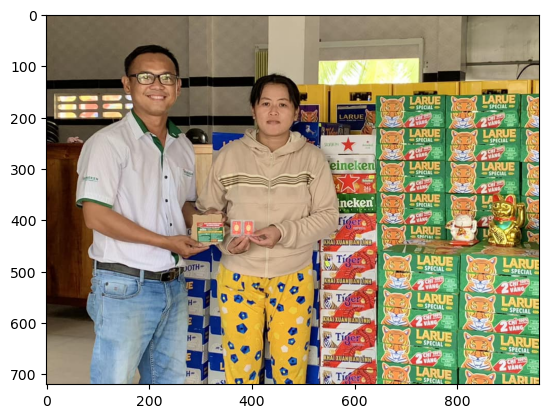

In [25]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
image = Image.open("../image/425853935_1565682190945954_1857218855865698163_n.jpg")
plt.imshow(np.array(image))
plt.show()

In [38]:

yolo_df = df[df['confidence'] > 0.7]
yolo_df_string = yolo_df.to_dict(orient="records")
# to dataframe
yolo_df = pd.DataFrame(yolo_df_string)
yolo_df.value_counts(["name", "brand_class"])

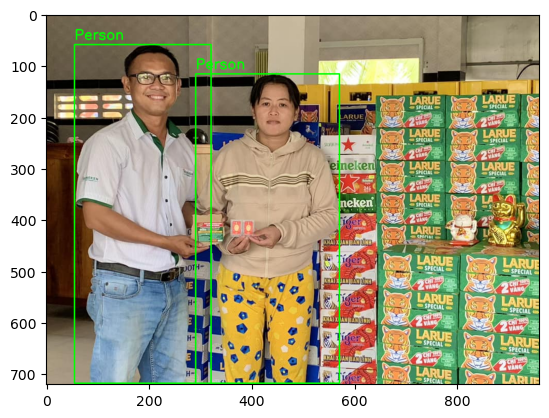

In [53]:
def draw_annotated(problem, yolo_df, image):
    persons = yolo_df[yolo_df["name"] == "person"]
    non_persons = yolo_df[yolo_df["name"] != "person"]
    
    if problem in ["problem1", "problem3", "problem4"]:
        # Vẽ khung chữ nhật cho các đối tượng 'person'
        for index, row in persons.iterrows():
            x, y, w, h = int(row["xmin"]), int(row["ymin"]), int(row["xmax"] - row["xmin"]), int(row["ymax"] - row["ymin"])
            image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            image = cv2.putText(image, "Person", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    
    if problem in ["problem2", "problem5"]:
        # Vẽ khung chữ nhật cho các đối tượng không phải 'person'
        for index, row in non_persons.iterrows():
            x, y, w, h = int(row["xmin"]), int(row["ymin"]), int(row["xmax"] - row["xmin"]), int(row["ymax"] - row["ymin"])
            image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            image = cv2.putText(image, row["name"], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    
    return image

# Đọc hình ảnh từ tệp
image_path = "../image/BZ1A0114.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = draw_annotated("problem4", yolo_df, image)
plt.imshow(image)

In [56]:
# value count , xem null nhu 0
temp.value_counts(["name", "brand_class"], dropna=False)

name    brand_class      
Larue   Larue beer carton    10
person  NaN                   2
Name: count, dtype: int64

In [64]:
y

{'info_od': "[{'xmin': 467.46, 'ymin': 1765.1, 'xmax': 625.6, 'ymax': 2128.22, 'confidence': 0.315, 'name': 'beer bottle', 'brand_class': None}, {'xmin': 4714.67, 'ymin': 342.24, 'xmax': 5324.67, 'ymax': 1543.27, 'confidence': 0.429, 'name': 'fridge', 'brand_class': None}, {'xmin': 2367.546630859375, 'ymin': 411.50909423828125, 'xmax': 3978.611083984375, 'ymax': 3516.8447265625, 'confidence': 0.9658346176147461, 'name': 'person', 'brand_class': None}, {'xmin': 4175.279296875, 'ymin': 1906.7349853515625, 'xmax': 5337.6240234375, 'ymax': 3534.12841796875, 'confidence': 0.9425750970840454, 'name': 'person', 'brand_class': None}, {'xmin': 1163.3629150390625, 'ymin': 600.8908081054688, 'xmax': 2620.955078125, 'ymax': 3513.607421875, 'confidence': 0.9394291043281555, 'name': 'person', 'brand_class': None}, {'xmin': 3619.22998046875, 'ymin': 794.585693359375, 'xmax': 4498.67822265625, 'ymax': 3505.605712890625, 'confidence': 0.8974016308784485, 'name': 'person', 'brand_class': None}, {'xmin':

In [ ]:
from PIL import Image
from io import BytesIO
import base64
def convert_image_to_base64(path):
    image = Image.open(path)
    buffered = BytesIO()
    image.save(buffered, format='JPEG')
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str

image_path = "./image/BZ1A0114.jpg"
url = 'http://localhost:8002/object_detection/'
myobj = {'base64_string': convert_image_to_base64(image_path)}
x = requests.post(url, json=myobj)
y = json.loads(x.text)
df = pd.DataFrame(y)
df = convert_OCR_result(df)
df.value_counts(["name", "brand_class"], dropna=False)

In [68]:
data_list = ast.literal_eval(y["info_od"])
y = json.loads(x.text)
df = pd.DataFrame(data_list)
df = convert_OCR_result(df)
df.value_counts(["name", "brand_class"], dropna=False)

AttributeError: 'NoneType' object has no attribute 'value_counts'

In [31]:
temp = ast.literal_eval(y["ic"])
scence_hastags, enhance_description, environment = temp
print(scence_hastags)
print(enhance_description)
print(environment)

['#beer', '#beerlover', '#beertime', '#beerfest', '#beerpong', '#beergarden', '#craftbeer', '#brewery', '#beergeek', '#beerporn']
{'problem2': 'The image shows a variety of beer brand logos and advertising:\n\n**Logos:**\n\n* **Heineken:**\n    * **Description:** A red star with white outline, the word "Heineken" written in white with a custom typeface on a green background.  \n    * **Items:** \n        * Partially visible beer boxes stacked behind the man. The boxes appear large, likely containing 24 cans or bottles.\n        * The man wears a white polo shirt featuring a smaller Heineken logo on the left breast (green star, white text). \n* **Tiger:** \n    * **Description:** A stylized tiger leaping through a golden ring. The word "Tiger" is written beneath the image in a bold, italicized typeface.\n    * **Items:**\n        * Several partially visible beer boxes stacked behind the man and woman. They appear large, like the Heineken boxes.  The text "KHAI XUÂN BÁN LĨNH" features pr

In [9]:
multi_url = os.environ.get("MULTI_URL")
myobj = {
    "img_path": uploaded_files,
    "options": ["problem1", "problem2", "problem3", "problem4", "problem5"]
}
x = requests.post(multi_url, json=myobj)
y = json.loads(x.text)
temp = y["context"]

In [2]:
from PIL import Image
from io import BytesIO
import base64
def pil_image_to_base64(image):
    buffered = BytesIO()
    image.save(buffered, format="PNG")
    img_byte = buffered.getvalue()
    img_base64 = base64.b64encode(img_byte).decode("utf-8")
    return img_base64

In [5]:
import os
from dotenv import load_dotenv
import requests
import json
from PIL import Image
load_dotenv()
url = os.environ.get("IC_URL")
print(url)
image = Image.open('image/1.jpg')
ic_obj = {
            "base64_string": pil_image_to_base64(image),
            "location": "event",
            "options": ["problem1", "problem2", "problem3", "problem4", "problem5"]
        }
x = requests.post(url, json=ic_obj)
print(x.text)
y = json.loads(x.text)
print(y)


http://localhost:8003/image_captioning/
Internal Server Error


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [16]:
y = {
  "info_od": "[{'xmin': 916.9, 'ymin': 781.56, 'xmax': 957.25, 'ymax': 820.19, 'confidence': 0.312, 'name': 'beer can', 'brand_class': None}, {'xmin': 697.27, 'ymin': 914.38, 'xmax': 749.6, 'ymax': 984.28, 'confidence': 0.309, 'name': 'beer can', 'brand_class': None}, {'xmin': 1444.08, 'ymin': 392.21, 'xmax': 1843.08, 'ymax': 728.94, 'confidence': 0.674, 'name': 'fridge', 'brand_class': None}, {'xmin': 1047.27, 'ymin': 1.21, 'xmax': 1851.59, 'ymax': 214.9, 'confidence': 0.409, 'name': 'billboard', 'brand_class': None}, {'xmin': 396.82, 'ymin': 1.79, 'xmax': 1041.93, 'ymax': 214.75, 'confidence': 0.332, 'name': 'poster', 'brand_class': None}, {'xmin': 1167.7767333984375, 'ymin': 581.06884765625, 'xmax': 1510.823974609375, 'ymax': 1506.401123046875, 'confidence': 0.9537092447280884, 'name': 'person', 'brand_class': None}, {'xmin': 779.5118408203125, 'ymin': 612.1028442382812, 'xmax': 1025.1533203125, 'ymax': 1097.896240234375, 'confidence': 0.5958744883537292, 'name': 'person', 'brand_class': None}, {'xmin': 1410.901611328125, 'ymin': 0.3971923887729645, 'xmax': 1849.799560546875, 'ymax': 278.50628662109375, 'confidence': 0.5730184316635132, 'name': 'person', 'brand_class': None}, {'xmin': 778.9537963867188, 'ymin': 612.0364990234375, 'xmax': 1025.5118408203125, 'ymax': 1225.3577880859375, 'confidence': 0.30477458238601685, 'name': 'person', 'brand_class': None}, {'xmin': 1195.0, 'ymin': 548.0, 'xmax': 1282.0, 'ymax': 569.0, 'confidence': 0.9356213212013245, 'name': 'Heineken', 'brand_class': 'Heineken beer carton'}, {'xmin': 1075.0, 'ymin': 779.0, 'xmax': 1139.0, 'ymax': 803.0, 'confidence': 0.9909536242485046, 'name': 'Bia Viet', 'brand_class': 'Bia Viet beer carton'}, {'xmin': 1070.0, 'ymin': 843.0, 'xmax': 1140.0, 'ymax': 857.0, 'confidence': 0.9536643624305725, 'name': 'Bia Viet', 'brand_class': 'Bia Viet beer carton'}, {'xmin': 1084.0, 'ymin': 901.0, 'xmax': 1148.0, 'ymax': 925.0, 'confidence': 0.9906111359596252, 'name': 'Bia Viet', 'brand_class': 'Bia Viet beer carton'}, {'xmin': 1083.0, 'ymin': 965.0, 'xmax': 1157.0, 'ymax': 981.0, 'confidence': 0.8149749040603638, 'name': 'Bia Viet', 'brand_class': 'Bia Viet beer carton'}, {'xmin': 1087.0, 'ymin': 1029.0, 'xmax': 1164.0, 'ymax': 1043.0, 'confidence': 0.9798834919929504, 'name': 'Bia Viet', 'brand_class': 'Bia Viet beer carton'}, {'xmin': 1100.0, 'ymin': 1090.0, 'xmax': 1174.0, 'ymax': 1103.0, 'confidence': 0.9926872253417969, 'name': 'Bia Viet', 'brand_class': 'Bia Viet beer carton'}, {'xmin': 1108.0, 'ymin': 1153.0, 'xmax': 1179.0, 'ymax': 1163.0, 'confidence': 0.9905818104743958, 'name': 'Bia Viet', 'brand_class': 'Bia Viet beer carton'}, {'xmin': 1100.0, 'ymin': 1216.0, 'xmax': 1174.0, 'ymax': 1230.0, 'confidence': 0.9306789636611938, 'name': 'Bia Viet', 'brand_class': 'Bia Viet beer carton'}, {'xmin': 1110.0, 'ymin': 1277.0, 'xmax': 1176.0, 'ymax': 1293.0, 'confidence': 0.9937419891357422, 'name': 'Bia Viet', 'brand_class': 'Bia Viet beer carton'}, {'xmin': 1105.0, 'ymin': 1339.0, 'xmax': 1189.0, 'ymax': 1353.0, 'confidence': 0.9234394431114197, 'name': 'Bia Viet', 'brand_class': 'Bia Viet beer carton'}]",
  "all_count_df": "      object  count\n0   Bia Viet     10\n1   Heineken      1\n2   beer can      2\n3  billboard      1\n4     fridge      1\n5     person      4\n6     poster      1",
  "heineken_brand_count_df": "        heineken_object  count\n0  Bia Viet beer carton     10\n1  Heineken beer carton      1",
  "competitor_brand_count_df": "Empty DataFrame\nColumns: [competitor_object, count]\nIndex: []"
}

In [17]:
import ast
import pandas as pd

In [18]:
y["info_od"] = ast.literal_eval(y["info_od"])
y = pd.DataFrame(y["info_od"])
y

,xmin,ymin,xmax,ymax,confidence,name,brand_class
0,916.900000,781.560000,957.250000,820.190000,0.312000,beer can,None
1,697.270000,914.380000,749.600000,984.280000,0.309000,beer can,None
2,1444.080000,392.210000,1843.080000,728.940000,0.674000,fridge,None
3,1047.270000,1.210000,1851.590000,214.900000,0.409000,billboard,None
4,396.820000,1.790000,1041.930000,214.750000,0.332000,poster,None
5,1167.776733,581.068848,1510.823975,1506.401123,0.953709,person,None
6,779.511841,612.102844,1025.153320,1097.896240,0.595874,person,None
7,1410.901611,0.397192,1849.799561,278.506287,0.573018,person,None
8,778.953796,612.036499,1025.511841,1225.357788,0.304775,person,None
9,1195.000000,548.000000,1282.000000,569.000000,0.935621,Heineken,Heineken beer carton
